<span style="font-family: Calibri, sans-serif; font-size: 16pt; color: navy;"><b>DATA608 - Analysis of Audio Files</b></span>

In this project, we will analyze audio sounds of dog barks and cat meows to create input features for exploratory data analysis (EDA) and eventually for our model input. To accomplish this, we will utilize the <b>Librosa</b> library, which is a Python package specifically designed for music and audio analysis. Librosa provides various built-in functions that allow us to extract information from audio files.

For more detailed information on the Librosa package and its functionalities, please refer to the official documentation available at <a href="https://librosa.org/doc/latest/index.html" style="color: #000080;">https://librosa.org/doc/latest/index.html</a>.

##### Please not that we may add additional packages/libraries as we require them

In [752]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
%matplotlib inline
import os as os
import warnings
warnings.filterwarnings("ignore", category=Warning)


###### checking librosa pakcage version

In [753]:
pip show librosa

Name: librosa
Version: 0.10.0.post2
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: /Users/zishanvisram/opt/anaconda3/lib/python3.9/site-packages
Requires: audioread, decorator, joblib, lazy-loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


###### Testing the package using 1 audio file from the train file

In [754]:
audio_data = '/Users/zishanvisram/Documents/DATA608/Group_Project/dog_barking_10.wav'
x, sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(55008,) 22050


The printed result provides us with the format of how the results are stored. The values `x.shape` and `sr` indicate the size of the array being stored and represent the sample rate of the audio file, respectively.

FYI: Sample rate in the Librosa package refers to the number of samples (audio data points) captured per second in an audio file. It represents the frequency at which the audio waveform is sampled to convert it into a digital format. The units of the sample rate is measured in Hertz (Hz) ,which in mathemtical form is the reciprocal of time (1/seconds) per sample or per waveform.

Reference: [Librosa Documentation](https://librosa.org/doc/latest/index.html)



###### Importing the necessary libraries to convert audio file for listening purposes

In [755]:
from IPython.display import Audio,Markdown  # Enables audio file display and playback and download
import ipywidgets as widgets  # Supports interactive widget creation such as buttons and sliders
from IPython.display import display  # Displays the created widgets

In [756]:
audio = Audio(audio_data,rate=sr)
display(Markdown('##### Labelling file name to easily distinguish between different audio files'))
display(audio)

##### Labelling file name to easily distinguish between different audio files

###### Importing the necessary libraries to visually display audio data

In [757]:
import librosa.display  
#built in package of Librosa which offers the simple and convenient methods to visualize audio data

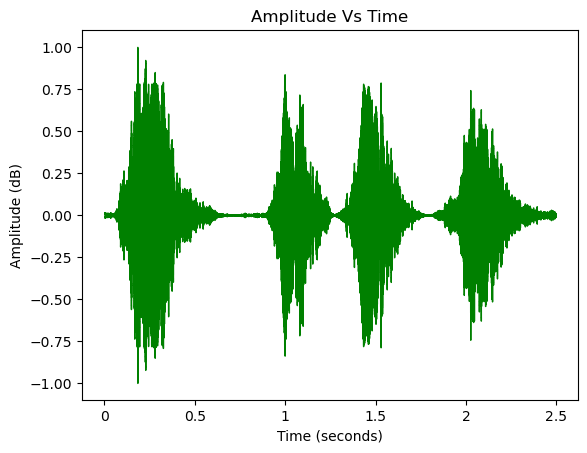

In [758]:
librosa.display.waveshow(x, sr=sr,color='green') # still using the test sample audio above to show how the Librosa package will be utlized
plt.title('Amplitude Vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (dB)')
plt.show()

##### Insights from sample audio file


We can observe that both the audio file and the plot of the amplitude versus time display similar data but it different formats. We can clearly hear four dogs barks, with the first one being the loudest, while the remaining three seem to have the same loudness. The aduo file has a duration of 2.5 seconds and also exhibits four barks within that timeframe. However, without further analysis, one might not realize that the second bark occured 0.5 seocnds later, the period between barks is 0.5 seconds, or the exact number of barks in the audio file. One would likely only recognize the general sound type and detech the animal.

Therefore, this analysis aims to delve deeper into each audio file and analyze key metrics that can distinguish one audio file from another. Even within the saem sound category, we will explore how important features and metrics enable differentiate between similar audio files.

---

##### fast Fourier transform (FFT)

Librose's package also includes a built-in function for performing a fast Fourier transform (FFT).

FFT is a computer algorithm that computes the discrete Fourier transfotm much faster than other alogirthmns,, is explained.  The savings in computer time can be huge; for example, an N=210-point transform can be computed with the FFT 100 times faster than with the use of a direct approach.

<b> Reference: Brigham EO, Morrow RE. The fast Fourier transform. IEEE spectrum. 1967 Dec;4(12):63-70.


Fourier Transform is a powerful tool for analyzing the components of a stationary signal (a stationary signal is a signal where there is no change in the properties of signal). For example, the Fourier transform is a powerful tool for processing signals that are composed of some combination of sine and cosine signals (sinusoids) 


The main difference is that wavelets are well localized in both time and frequency domain whereas the standard Fourier transform is only localized in frequency domain. The Short-time Fourier transform (STFT) is also time and frequency localized but there are issues with the frequency time resolution and wavelets often give a better signal representation using Multiresolution analysis.

<b> Reference: Sifuzzaman M, Islam MR, Ali MZ. Application of wavelet transform and its advantages compared to Fourier transform.

---
    
    


##### Conversion of audio singal from the time domain to the freqency domain using Librosa's built in FFT function

In [759]:
X=librosa.stft(x) # converts the audio file signal 'x' into 'X' using FFT
Xdb=librosa.amplitude_to_db(abs(X)) # This code then converts the X signal into dB units using Librosa's built in function


In [760]:
Xdb

array([[ -5.444281  ,  -7.4792047 ,   0.5310616 , ...,   6.7085238 ,
          2.650063  ,   7.980757  ],
       [ -2.0739274 ,  -2.066852  ,  -0.4252941 , ...,   9.585709  ,
          9.133681  ,   6.3891764 ],
       [  0.37908104,  -7.4236736 ,  -3.4580545 , ...,   6.7191153 ,
          5.0021176 ,   0.51610684],
       ...,
       [-31.646523  , -31.646523  , -31.646523  , ..., -31.646523  ,
        -31.646523  , -31.646523  ],
       [-31.646523  , -31.646523  , -31.646523  , ..., -31.646523  ,
        -31.646523  , -31.646523  ],
       [-31.646523  , -31.646523  , -31.646523  , ..., -31.646523  ,
        -31.646523  , -31.646523  ]], dtype=float32)

##### Ploting the FFT audio as a spectrogram

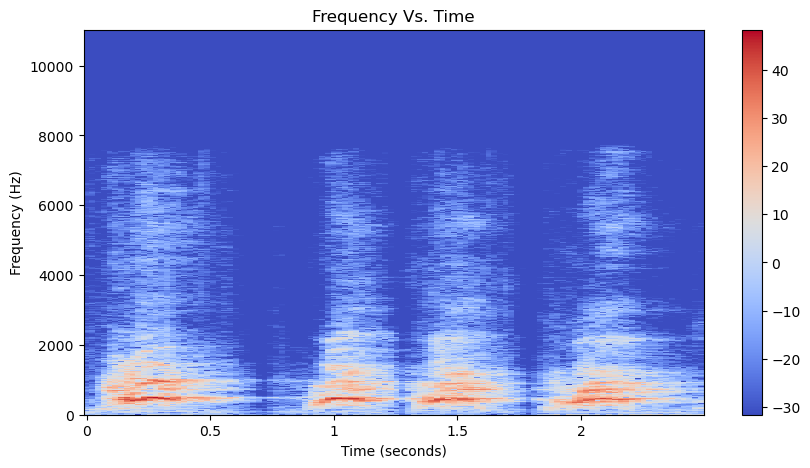

##### Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

In [805]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')  # Librosa's built-in function to convert FFT signal into spectrogram
plt.title('Frequency Vs. Time') 
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.colorbar() # This built in function in matplotlib helps of visual represent the mapping between colors and values in a plot
plt.show()

display(Markdown('##### Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html'))


In [762]:
display(Markdown('Using Librosa\'s built-in package to extract the mel spectrogram'))

melspec2=librosa.feature.melspectrogram(y=x,sr=sr,n_mels=10)
melspec2

Using Librosa's built-in package to extract the mel spectrogram

array([[1.8427758e-02, 3.4903441e-02, 7.5098380e-02, ..., 4.4308994e-02,
        9.6577503e-02, 1.3016500e-01],
       [1.0261086e-03, 2.6191205e-03, 1.9815877e-02, ..., 4.2904686e-02,
        4.3120421e-02, 3.1784475e-02],
       [4.9174001e-04, 1.1736073e-03, 2.2462409e-02, ..., 2.4572004e-02,
        2.2907123e-02, 1.0214619e-02],
       ...,
       [6.9912305e-05, 1.0869900e-04, 7.0349197e-05, ..., 1.2163731e-05,
        2.2753782e-05, 1.8696268e-05],
       [6.1373976e-05, 1.0049962e-04, 5.6745812e-05, ..., 8.7203125e-06,
        1.5902668e-05, 1.3372102e-05],
       [1.0995248e-05, 1.8137836e-05, 1.0799906e-05, ..., 1.5582999e-06,
        2.6131202e-06, 2.1960263e-06]], dtype=float32)

In [806]:
meldf=pd.DataFrame(melspec2)
meldf.head()


0         1         2         3         4          5          6    \
0  0.018428  0.034903  0.075098  0.581405  2.017071  10.070269  52.961411   
1  0.001026  0.002619  0.019816  1.389966  7.944491  16.001936  56.052803   
2  0.000492  0.001174  0.022462  1.148818  5.732608   7.129301   5.658583   
3  0.000307  0.000614  0.002918  0.046693  0.231827   0.450598   1.004882   
4  0.000333  0.000380  0.000415  0.003044  0.022913   0.092815   0.196604   

          7           8           9    ...       98        99        100  \
0  147.379272  239.651611  250.486877  ...  1.120108  0.792407  0.390911   
1  133.206223  158.905563  170.555176  ...  2.114199  1.307847  0.770762   
2    5.488112    8.875995   16.262981  ...  0.975480  0.471632  0.447435   
3    2.167209    3.793201    2.465461  ...  0.068981  0.052889  0.022307   
4    0.243046    0.384739    0.532458  ...  0.002729  0.001897  0.001748   

        101       102       103       104       105       106       107  
0  0.444928  0.225708  0.139425  0.090678  0.044309  0.096578  0.130165  
1  0.643510  0.342286  0.216879  0.110583  0.042905  0.043120  0.031784  
2  0.217136  0.116676  0.096758  0.041224  0.024572  0.022907  0.010215  
3  0.011590  0.012053  0.012528  0.006742  0.003894  0.002145  0.000908  
4  0.000931  0.000587  0.000491  0.000252  0.000197  0.000208  0.000193  

[5 rows x 108 columns]

---

### Feature Extraction from audio signal that Librosa package offers

- Mel Frequency Cepstrium ( MFC)

MFCs are derived from the short-term power spectrum of a sound, using a linear cosine transform of the log power spectrum on a nonlinear Mel frequency scale. These coefficients, known as MFCCs, are combined to create an MFC representation.

Reference : Raguraman P, Mohan R, Vijayan M. Librosa based assessment tool for music information retrieval systems. In2019 IEEE Conference on Multimedia Information Processing and Retrieval (MIPR) 2019 Mar 28 (pp. 109-114). IEEE.


In [764]:
display(Markdown('Using Librosa\'s built-in package to extract the MFCC'))

MFCC_1=librosa.feature.mfcc(S=librosa.power_to_db(melspec),sr=sr)
print(MFCC_1)
display(Markdown('---'))
display(Markdown('The shape of the MFCC coefficents of the entire audio file'))

print(MFCC_1.shape)

Using Librosa's built-in package to extract the MFCC

ValueError: could not broadcast input array from shape (128,171) into shape (128,)

The results of the MFCC function is an array that contains the extracted MFCCs of the full audio signal. We will use the result of the array to extract statistical measurement such as the mean,variance, and percentiles as inputs for each audio file. One can also use the array of the full audio signal and creat heatmaps

---

##### Importing the necessary libraries for MFCCs heatmap

In [765]:
import seaborn as sns
import numpy as np

---

##### Heatmap of MFCCS

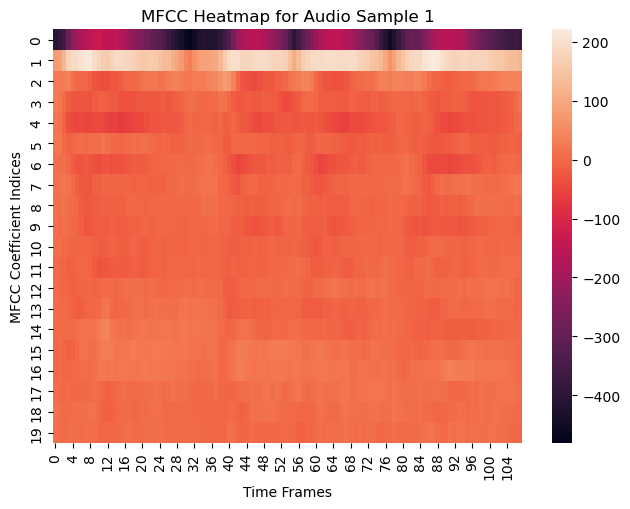

In [766]:
sns.heatmap(MFCC_1)
plt.tight_layout()
plt.title("MFCC Heatmap for Audio Sample 1")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficient Indices")
plt.show()

##### Statistical measurements of the MFCC array above

In [767]:
mfccs1_mean=np.mean(MFCC_1,axis=1)
mfccs1_variance=np.var(MFCC_1,axis=1)


mfccs1_percentile_25=np.percentile(MFCC_1,25,axis=1)
mfccs1_perentile_75=np.percentile(MFCC_1,75,axis=1)

In [768]:
data_mfccs1 = {
    'Mean': mfccs1_mean,
    'Variance': mfccs1_variance,
    'Percentile_75': mfccs1_perentile_75,
    'Percentile_25': mfccs1_percentile_25
}

df = pd.DataFrame(data_mfccs1)
df = df.reset_index().rename(columns={'index': 'MFCCS Coefficient'})
display(Markdown('This is the MFCC coefficients for 1 audio file'))

display(df)

This is the MFCC coefficients for 1 audio file

MFCCS Coefficient        Mean     Variance  Percentile_75  Percentile_25
0                   0 -274.913330  9304.995117    -182.038376    -360.309334
1                   1  159.805969  1662.649902     187.898285     139.378979
2                   2    8.626136   728.073364      30.027402     -12.618342
3                   3  -15.307397   168.552261      -6.544584     -24.305936
4                   4  -29.131088   294.019745     -17.366797     -44.686604
5                   5   -8.252141    94.035576      -1.693794     -16.041139
6                   6  -17.703133   294.464966      -3.144350     -30.709266
7                   7   -3.106334   121.044014       4.480590      -9.797624
8                   8   -5.707186    84.396065       1.023028     -13.008496
9                   9  -13.075440   105.553032      -4.494585     -21.347119
10                 10   -7.531946    41.976852      -3.396694     -12.022630
11                 11   -6.793842    65.722351      -0.970561     -11.588795
12                 12    1.435679    47.155319       5.583301      -1.963362
13                 13   -2.422376    89.793915       4.307358     -10.145653
14                 14    2.035347   145.090103      12.135218      -7.890203
15                 15   11.548138    89.499153      19.153927       5.100136
16                 16   14.335386    70.865303      20.351248       9.003384
17                 17    6.104373    34.745728       9.738446       1.896606
18                 18    3.674776    34.601715       7.707145       0.057295
19                 19    3.244447    26.920265       7.051913      -0.265935

---

- Pitch

Pitch is a quality of sounds that enables their arrangement on a scale based on frequency, allowing us to perceive them as "higher" or "lower" in musical terms. Clear and stable frequency is required to accurately determine pitch, distinguishing it from noise. In classical music, the key of a composition is formed by a collection of pitches, serving as its foundation. Loudness refers to the subjective perception of sound pressure.


Reference: Raguraman P, Mohan R, Vijayan M. Librosa based assessment tool for music information retrieval systems. In2019 IEEE Conference on Multimedia Information Processing and Retrieval (MIPR) 2019 Mar 28 (pp. 109-114). IEEE.





- Melspectogram

The mel spectrogram represents the audio's frequency content over time, mapping frequencies to a scale that matches how we perceive sound. It provides a useful representation for analyzing and processing audio signals, such as extracting features or training machine learning models.

Reference:  McFee B, Raffel C, Liang D, Ellis DP, McVicar M, Battenberg E, Nieto O. librosa: Audio and music signal analysis in python. InProceedings of the 14th python in science conference 2015 Jul 6 (Vol. 8, pp. 18-25).


In [769]:
melspec1=librosa.feature.melspectrogram(y=x,sr=sr)
print(melspec1)
display(Markdown('---'))

display(Markdown('Size of the melspectogram of 1 audio file'))
print(melspec1.shape)

[[1.47891238e-01 8.61141607e-02 5.43882847e-02 ... 3.10696095e-01
  2.45737478e-01 1.12705864e-01]
 [2.33353093e-01 2.32249737e-01 6.85513914e-02 ... 3.38235348e-02
  4.24920917e-02 1.24315899e-02]
 [9.44140255e-02 8.83316994e-02 9.13877115e-02 ... 3.19374986e-02
  2.10035760e-02 6.49423990e-03]
 ...
 [9.02147619e-08 2.24636754e-08 1.48676898e-15 ... 3.42970072e-16
  1.51740165e-09 3.61544501e-08]
 [8.69526531e-08 2.16548663e-08 6.71753825e-16 ... 5.68594371e-16
  1.41628131e-09 3.37500268e-08]
 [8.49955981e-08 2.11695426e-08 1.55375573e-15 ... 2.45092477e-16
  1.35597267e-09 3.23165139e-08]]


---

Size of the melspectogram of 1 audio file

(128, 108)


##### Heatmap of Melspectogram

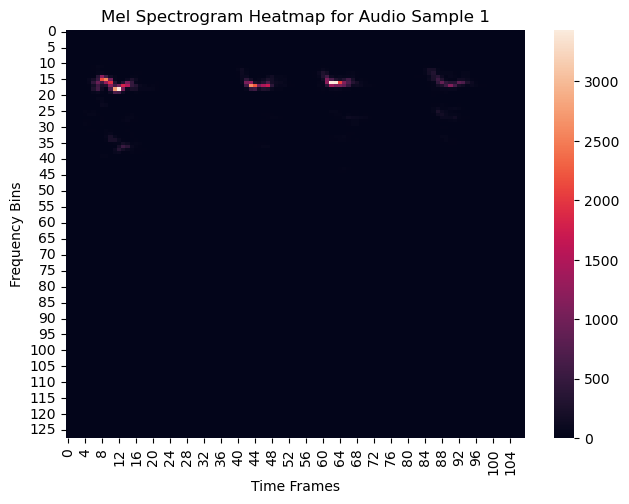

In [770]:
sns.heatmap(melspec1)
plt.tight_layout()
plt.title("Mel Spectrogram Heatmap for Audio Sample 1")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")
plt.show()

##### Statistical measurements of the Melspectogram array above


In [771]:
melspec1_mean=np.mean(melspec1,axis=1)
melspec1_variance=np.var(melspec1,axis=1)


melspec1_percentile_25=np.percentile(melspec1,25,axis=1)
melspec1_perentile_75=np.percentile(melspec1,75,axis=1)

In [772]:
data_melspec1 = {
    'Mean': melspec1_mean,
    'Variance': melspec1_variance,
    'Percentile_75': melspec1_perentile_75,
    'Percentile_25': melspec1_percentile_25
}

df = pd.DataFrame(data_melspec1)
df = df.reset_index().rename(columns={'index': 'Melspectogram frequency bins'})
display(Markdown('This is the Melspectogram frequency bins for 1 audio file'))

display(df)

This is the Melspectogram frequency bins for 1 audio file

Melspectogram frequency bins          Mean      Variance  Percentile_75  \
0                               0  8.014989e-02  7.649615e-03   1.171288e-01   
1                               1  5.808299e-02  2.963965e-03   7.506438e-02   
2                               2  7.042219e-02  3.380745e-03   9.139422e-02   
3                               3  8.167780e-02  4.669628e-03   1.101060e-01   
4                               4  1.204589e-01  2.782083e-02   1.305552e-01   
..                            ...           ...           ...            ...   
123                           123  1.606962e-09  1.176836e-16   9.833224e-14   
124                           124  1.482548e-09  1.013054e-16   6.938722e-14   
125                           125  1.392322e-09  9.021670e-17   3.448785e-13   
126                           126  1.331837e-09  8.314072e-17   1.019562e-12   
127                           127  1.294869e-09  7.905106e-17   1.488284e-13   

     Percentile_25  
0     2.257863e-02  
1     2.027764e-02  
2     2.988805e-02  
3     3.426578e-02  
4     2.602821e-02  
..             ...  
123   6.258152e-16  
124   6.352500e-16  
125   1.671336e-15  
126   5.029586e-15  
127   1.577549e-15  

[128 rows x 5 columns]

##### Chromograph

A chromagram is a representation that shows how different musical pitch classes (like C, C#, D, etc.) are distributed and vary over time. It helps analyze the harmonic content and tonality of music.

Reference: Reference:  McFee B, Raffel C, Liang D, Ellis DP, McVicar M, Battenberg E, Nieto O. librosa: Audio and music signal analysis in python. InProceedings of the 14th python in science conference 2015 Jul 6 (Vol. 8, pp. 18-25).

In [773]:
chroma1=librosa.feature.chroma_cqt(y=x,sr=sr)
print(chroma1)
display(Markdown('---'))
display(Markdown('The size of the chromograph array of 1 audio file'))
print(chroma1.shape)

[[0.45070645 0.5196303  0.57461214 ... 0.45852554 0.4000388  0.38244867]
 [0.43000564 0.4768273  0.51317424 ... 0.52927846 0.48463526 0.42681786]
 [0.9378022  0.91690546 0.8071379  ... 0.4734552  0.3997036  0.41572234]
 ...
 [0.4600239  0.51913315 0.5299994  ... 0.91538095 0.7758385  0.63311195]
 [0.5950861  0.62876326 0.7426196  ... 0.67430717 0.47074124 0.38589782]
 [0.30758587 0.48924017 0.69962835 ... 0.50020796 0.4886406  0.42357   ]]


---

The size of the chromograph array of 1 audio file

(12, 108)


##### Statistical measurements of the Chromograph array above


In [774]:
chroma1_mean=np.mean(chroma1,axis=1)
chroma1_variance=np.var(chroma1,axis=1)


chroma1_percentile_25=np.percentile(chroma1,25,axis=1)
chroma1_perentile_75=np.percentile(chroma1,75,axis=1)

In [775]:
data_chroma1 = {
    'Mean': chroma1_mean,
    'Variance': chroma1_variance,
    'Percentile_75': chroma1_perentile_75,
    'Percentile_25': chroma1_percentile_25
}

df = pd.DataFrame(data_chroma1)
df = df.reset_index().rename(columns={'index': 'Chroma'})
display(Markdown('This is the Chroma representation for 1 audio file'))

display(df)

This is the Chroma representation for 1 audio file

Chroma      Mean  Variance  Percentile_75  Percentile_25
0        0  0.303537  0.023179       0.385655       0.197998
1        1  0.284488  0.021413       0.373068       0.168089
2        2  0.354499  0.060187       0.483918       0.154384
3        3  0.337210  0.044885       0.462196       0.174485
4        4  0.387969  0.062016       0.540981       0.185563
5        5  0.542343  0.076037       0.776388       0.305496
6        6  0.557959  0.065115       0.777027       0.372362
7        7  0.527919  0.051936       0.638002       0.375107
8        8  0.614428  0.046502       0.760212       0.488891
9        9  0.738757  0.059221       1.000000       0.542103
10      10  0.725567  0.065696       1.000000       0.542519
11      11  0.458934  0.067935       0.645279       0.244686

---

- Tonnetz


Tonnetz is a representation that shows the harmonic relationships between musical pitches. It visualizes these relationships in a two-dimensional space. Tonnetz is useful for tasks like music analysis, chord recognition, and music information retrieval.

In [776]:
tonnetz_1=librosa.feature.tonnetz(y=x,sr=sr)
print(tonnetz_1)

display(Markdown('---'))

display(Markdown('Size of the Tonnetz of 1 audio file'))
print(tonnetz_1.shape)

[[ 3.89885001e-02  4.91293049e-02  3.24722792e-02  4.39800024e-02
  -3.94409758e-03 -4.18021465e-02  2.33253608e-02  3.06322667e-02
  -1.94431964e-02 -4.13023035e-02  6.85053174e-02  1.87948873e-01
   7.79063597e-02 -1.33493662e-01 -4.82761473e-02 -5.17421191e-02
  -1.32250898e-01 -9.64414604e-02 -1.24581752e-01 -3.56915142e-02
  -2.13147886e-02  1.22157854e-02 -8.86415494e-02 -1.47432796e-01
  -1.03321587e-01 -1.23317113e-01 -3.63665842e-02  1.54874306e-02
  -3.80590799e-02 -2.62902820e-02 -3.17825511e-02 -2.31467084e-02
   1.02706869e-03  2.29910218e-02  1.25085829e-02  7.85096086e-03
  -1.45163835e-02  1.68270858e-02  8.70799998e-02  1.07582884e-01
   6.33371066e-02  5.05299592e-02  2.91119491e-02 -8.24865813e-02
  -2.47246277e-01 -2.20368807e-01 -1.90949090e-01 -1.69209423e-01
  -7.00353720e-02  2.58836312e-02  5.73721051e-02 -2.91992560e-02
  -8.69897113e-02 -5.17104742e-02  2.65102734e-02 -1.89290954e-02
  -8.72226968e-02 -1.10598592e-01 -3.26058508e-02  2.63193515e-02
  -3.35241

---

Size of the Tonnetz of 1 audio file

(6, 108)


##### Statistical measurements of the Tonnezt array above


In [777]:
Tonnetz1_mean=np.mean(tonnetz_1,axis=1)
Tonnetz1_variance=np.var(tonnetz_1,axis=1)


Tonnetz1_percentile_25=np.percentile(tonnetz_1,25,axis=1)
Tonnetz1_perentile_75=np.percentile(tonnetz_1,75,axis=1)

In [778]:
data_tonnetz1 = {
    'Mean': Tonnetz1_mean,
    'Variance': Tonnetz1_variance,
    'Percentile_75': Tonnetz1_perentile_75,
    'Percentile_25': Tonnetz1_percentile_25
}

df = pd.DataFrame(data_tonnetz1)
df = df.reset_index().rename(columns={'index': 'Tonnetz'})
display(Markdown('This is the Tonnetz representation for 1 audio file'))

display(df)

This is the Tonnetz representation for 1 audio file

Tonnetz      Mean  Variance  Percentile_75  Percentile_25
0        0 -0.007005  0.007738       0.044908      -0.052130
1        1  0.012086  0.002888       0.038622      -0.016622
2        2 -0.048398  0.009991       0.000750      -0.103323
3        3 -0.064786  0.007796       0.001621      -0.111431
4        4  0.000464  0.001555       0.018835      -0.026015
5        5 -0.000468  0.001946       0.022647      -0.024255

---

- Tempo

The `librosa.beat.beat_track` function takes the audio signal (x) and the sample rate (sr) as input and estimates the tempo of the audio signal. It returns the estimated tempo value and the frame-level beat information.


Reference: 


In [807]:
tempo,frames=librosa.beat.beat_track(y=x,sr=sr)
print(tempo)

117.45383522727273


In [808]:
frames

array([  7,  28,  49,  70,  93, 117, 139, 161, 186])

- Beat times

The `librosa.frames_to_time` function converts the frame indices to corresponding time values using the sample rate, resulting in an array (beat_times) that represents the beat times in seconds.

In [780]:
beat_times=librosa.frames_to_time(frames,sr=sr)
print(beat_times)

[0.13931973]


---
---
---
---


### Test Cat audio
#### We can perform the same analysis using a test cat file

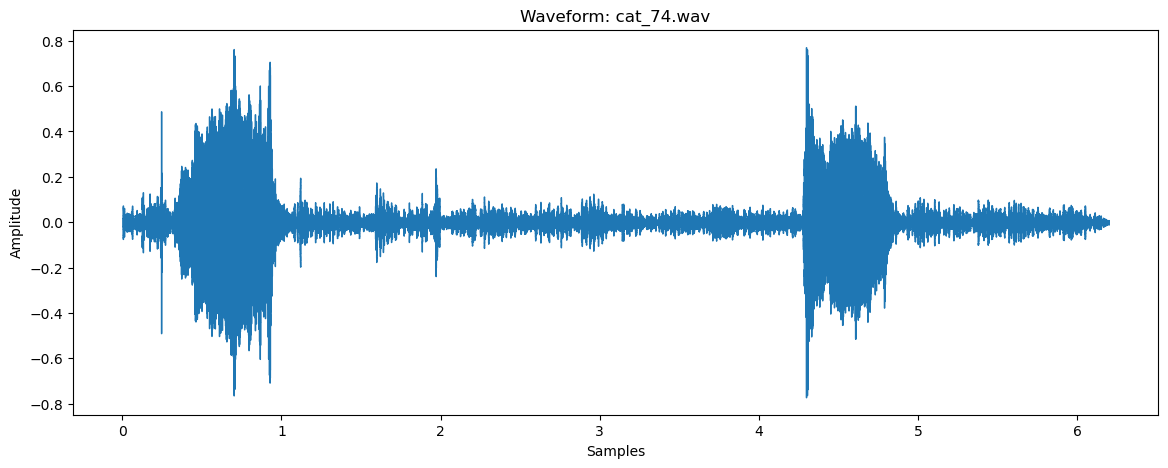

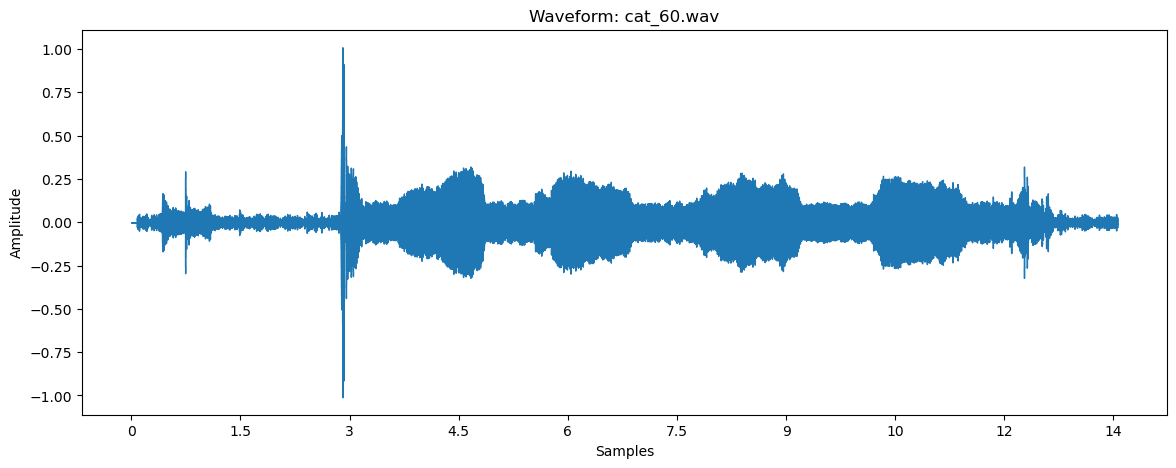

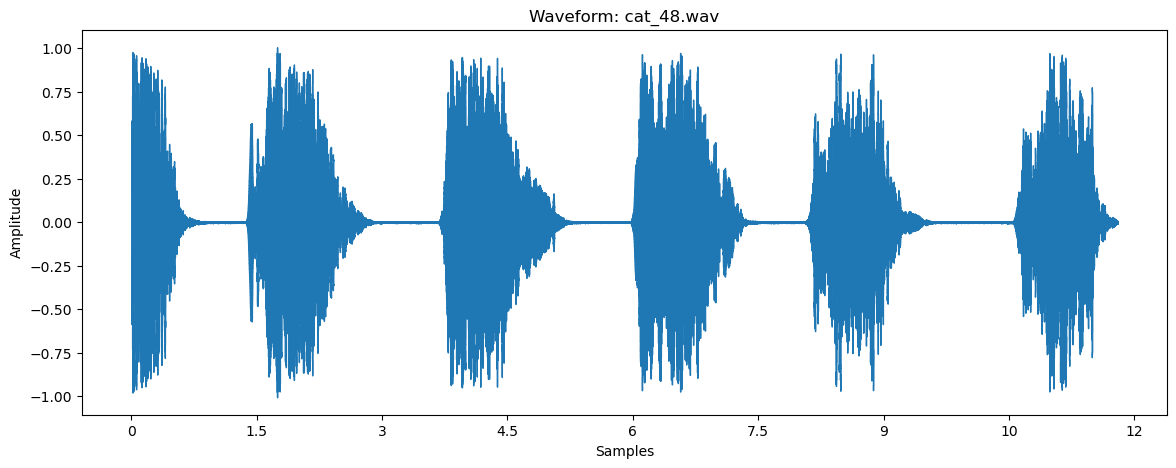

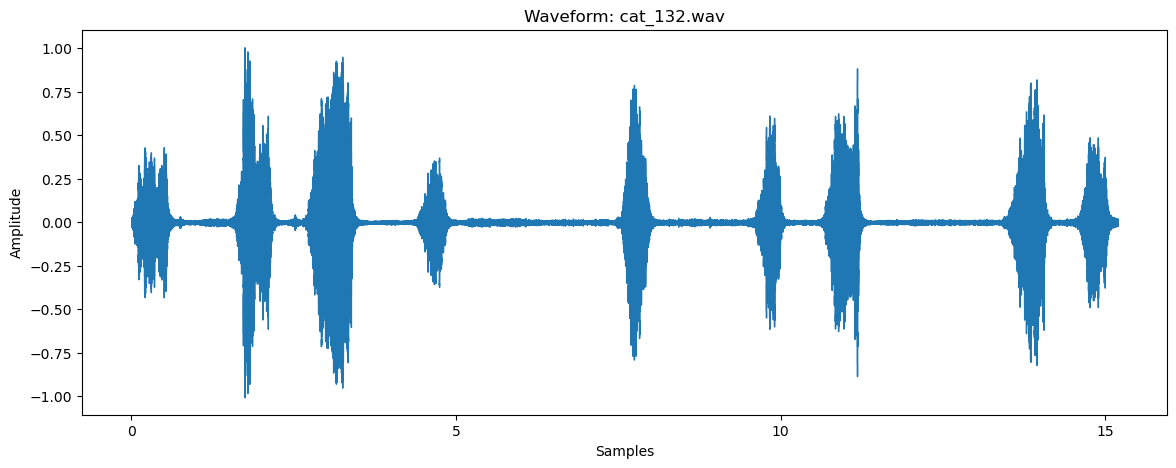

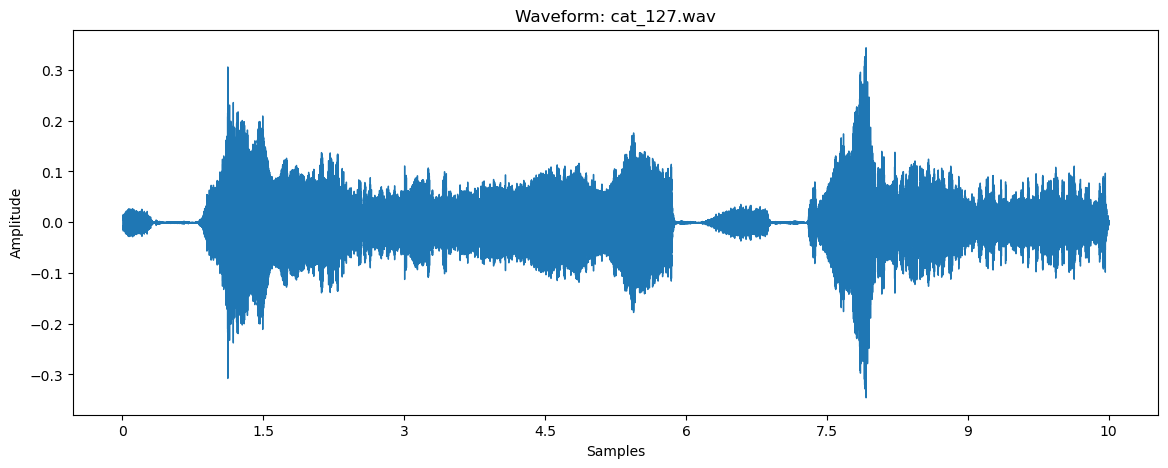

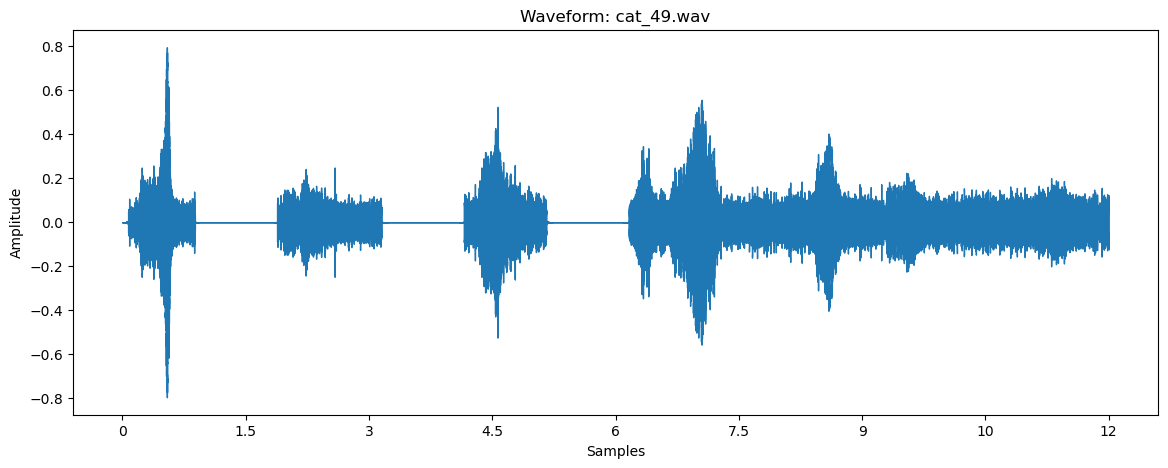

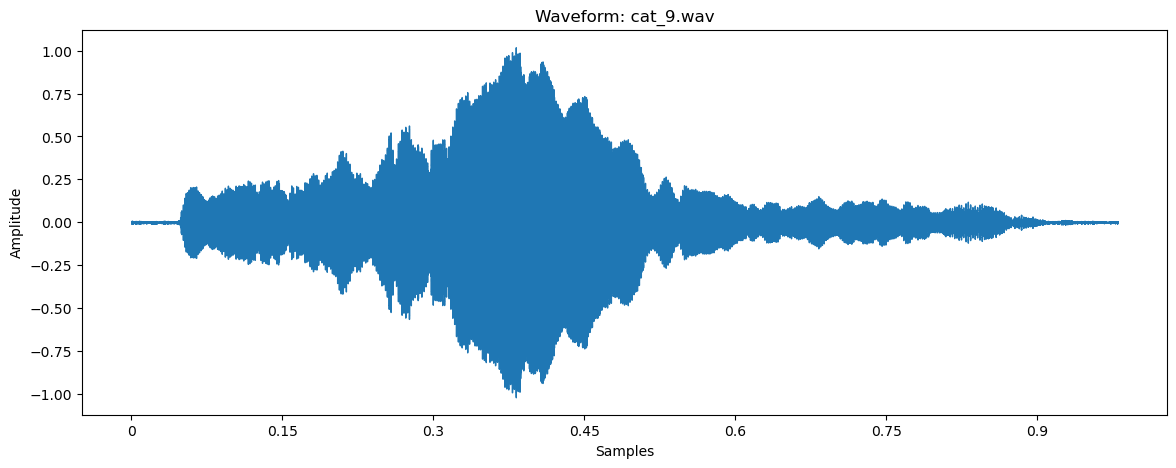

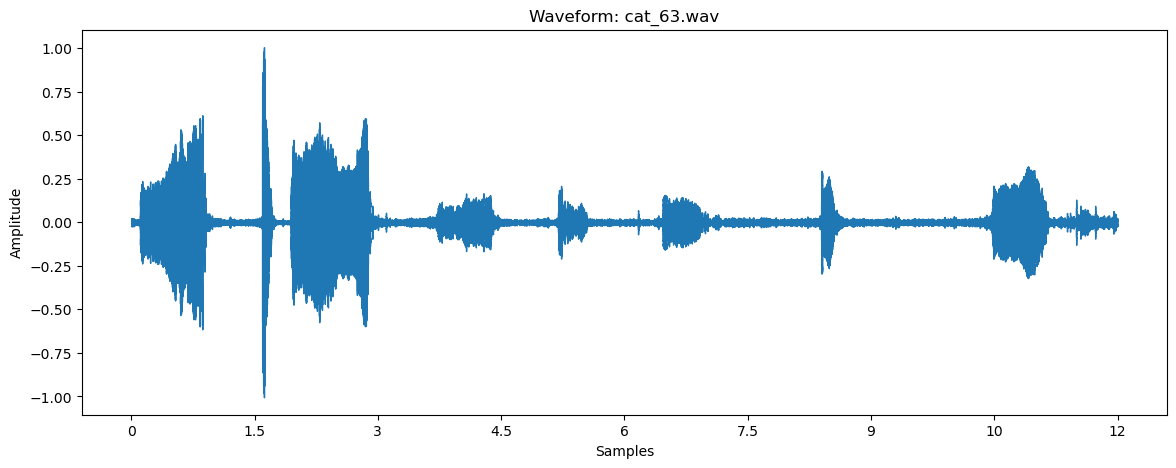

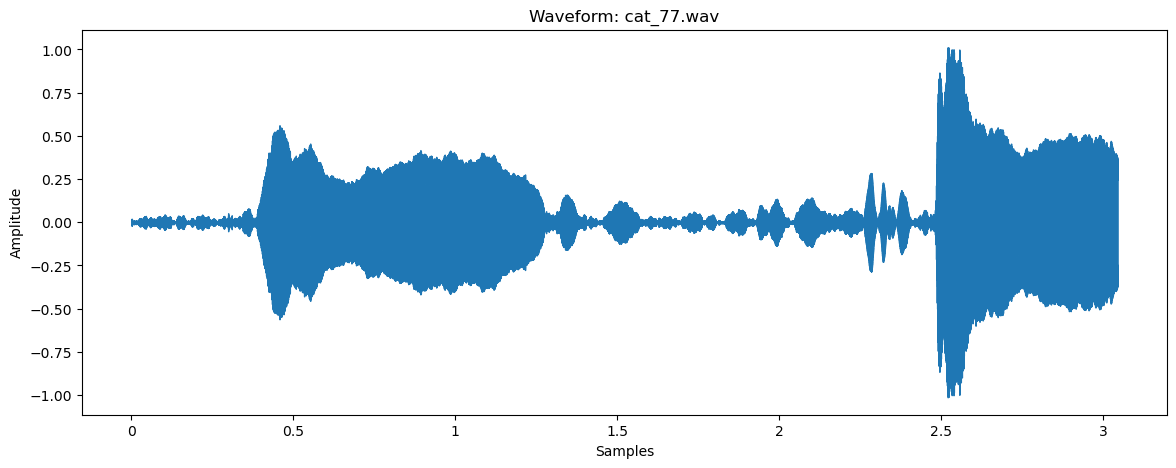

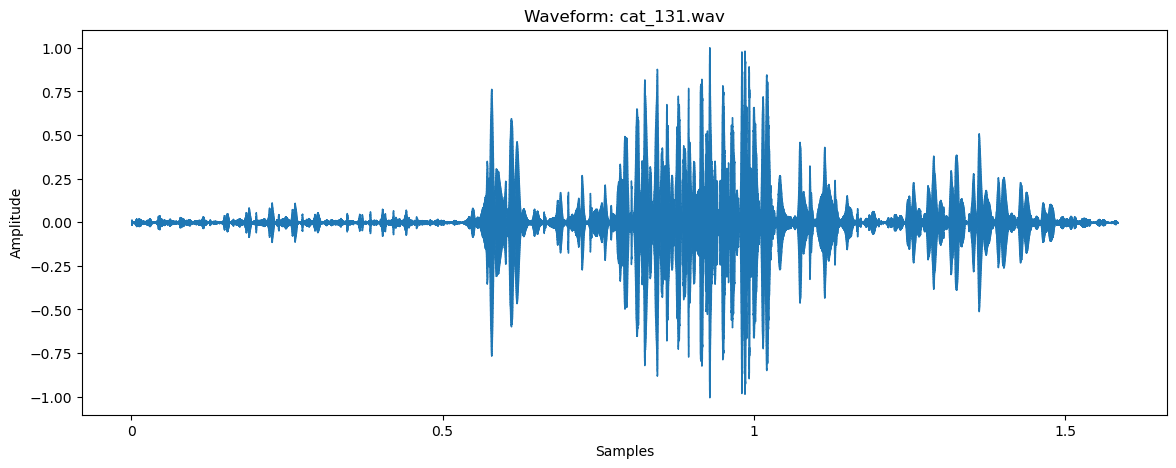

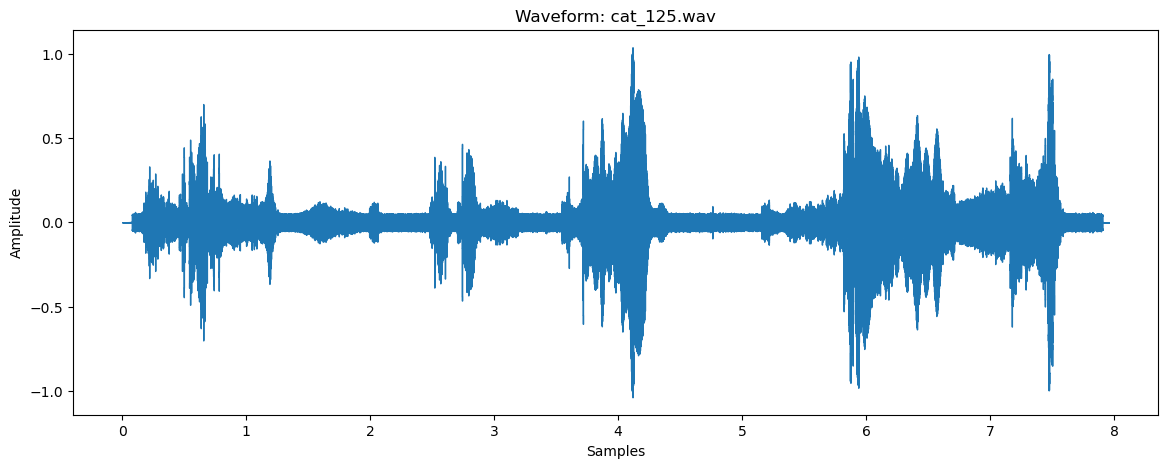

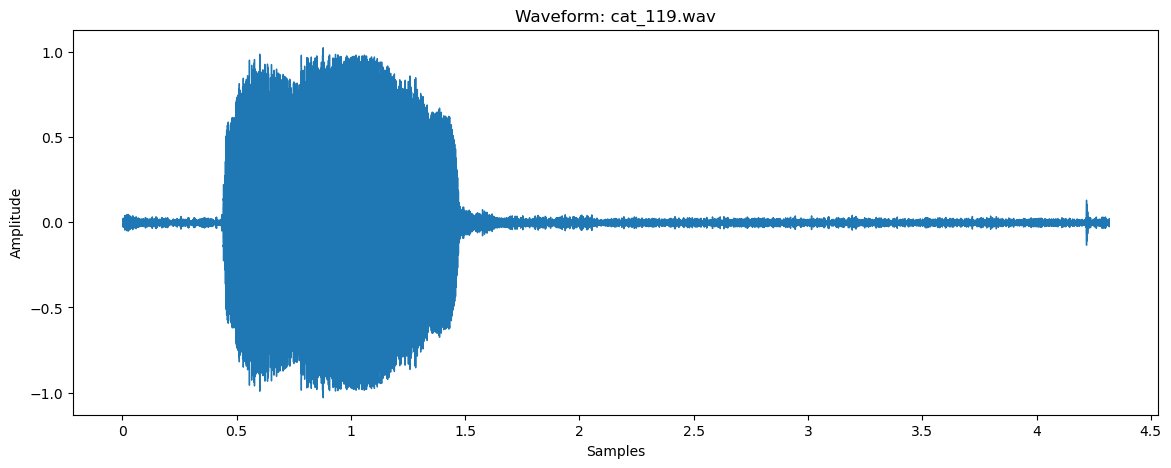

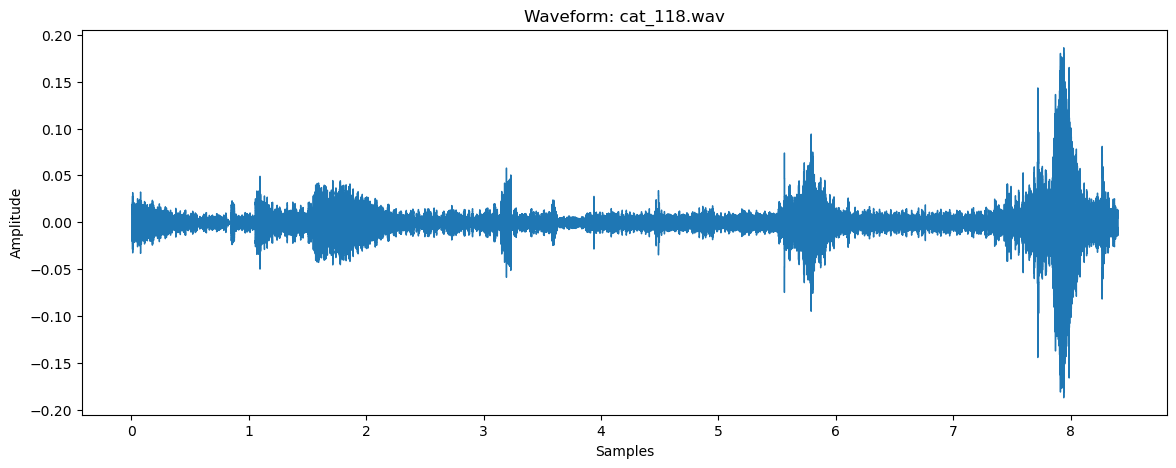

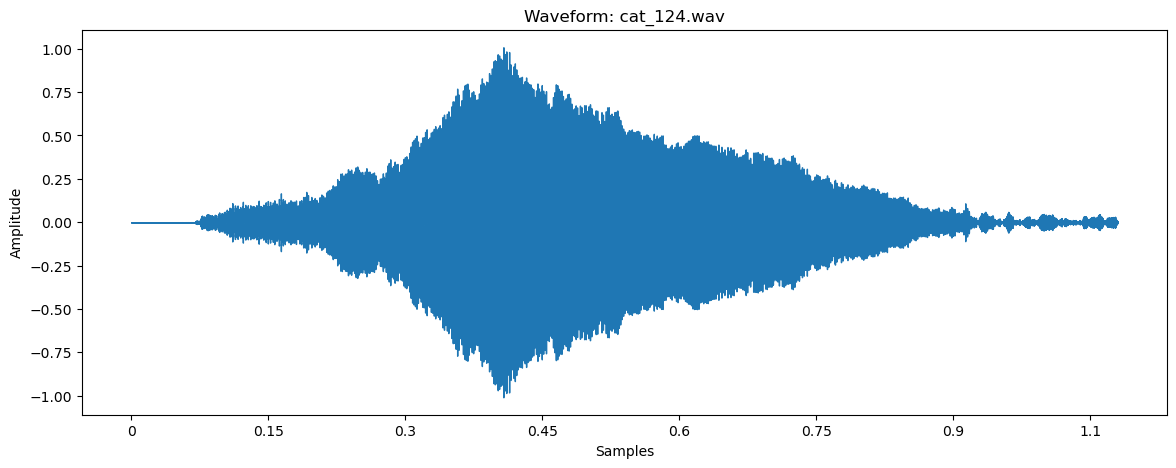

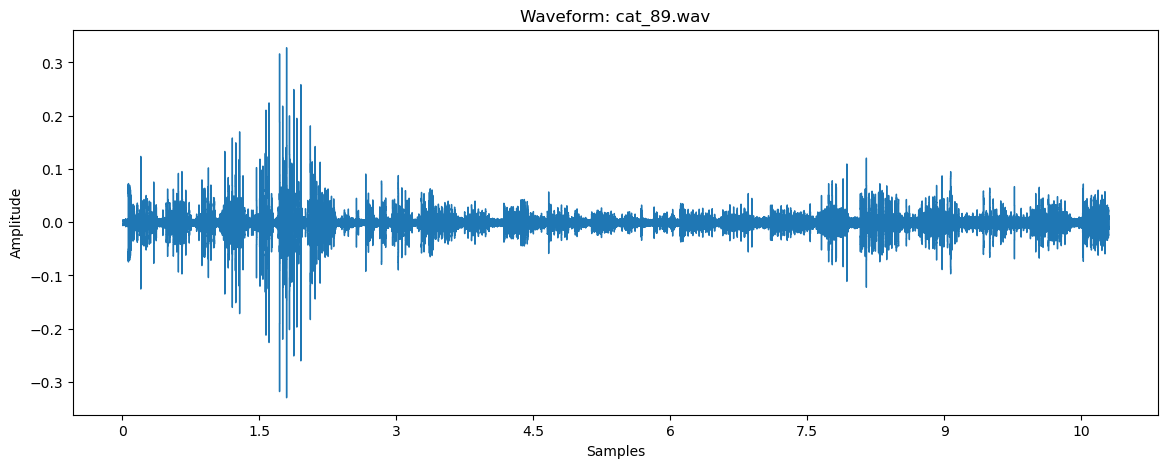

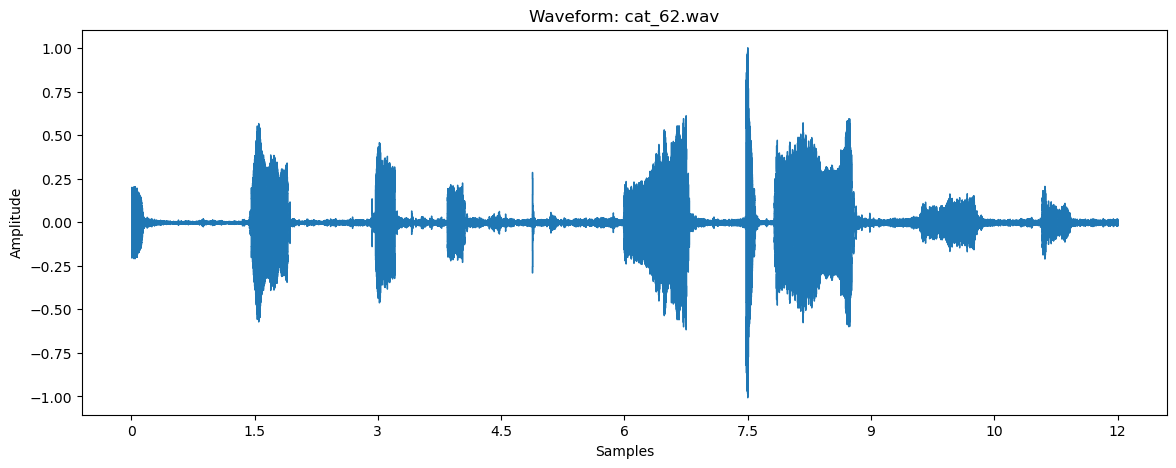

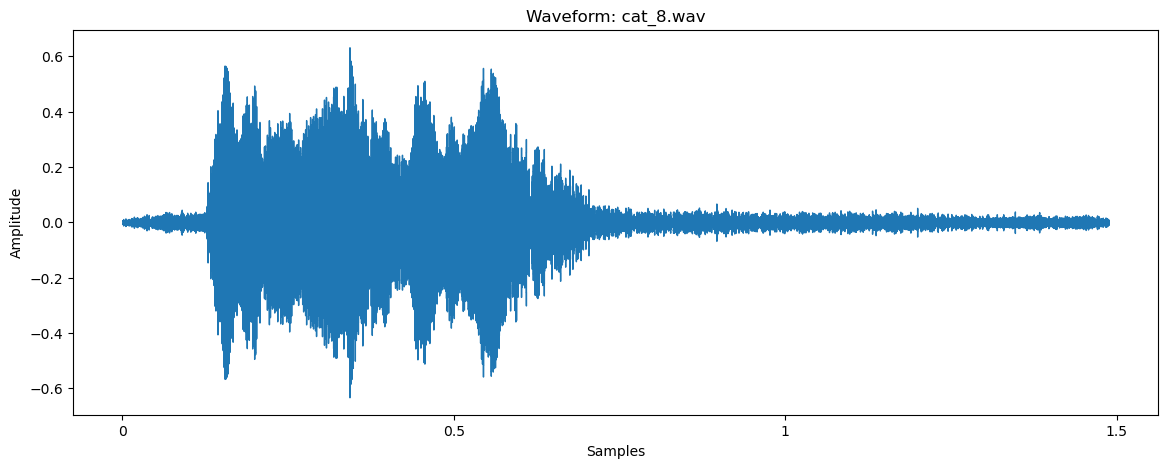

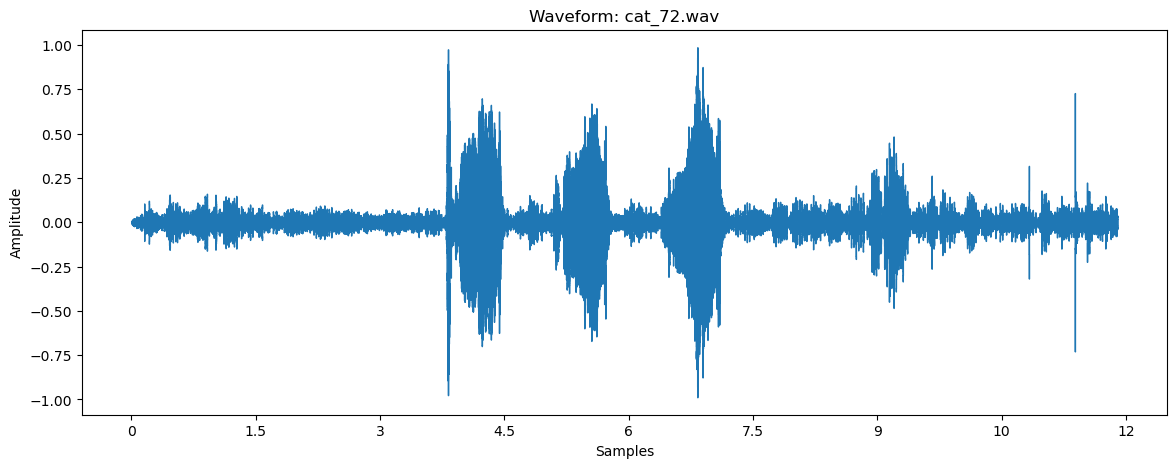

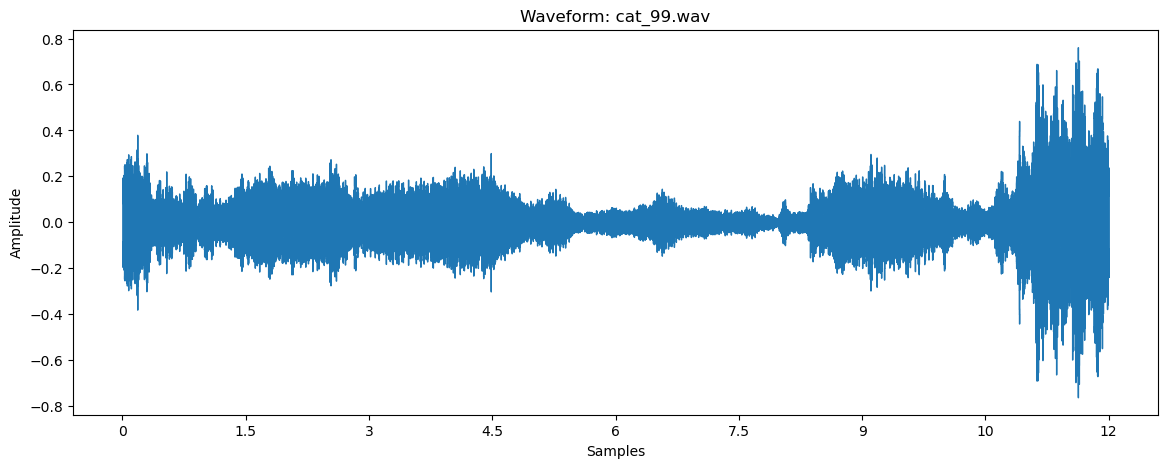

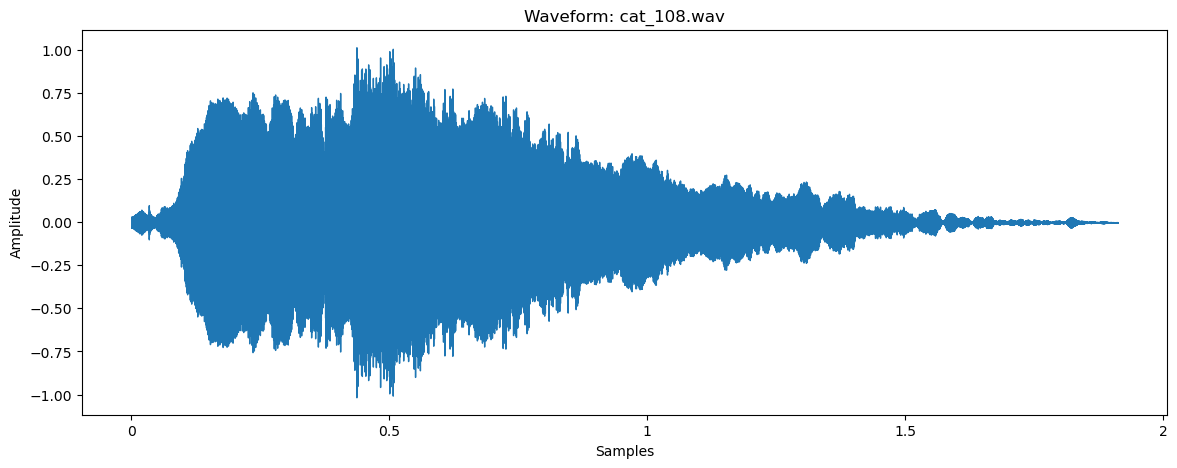

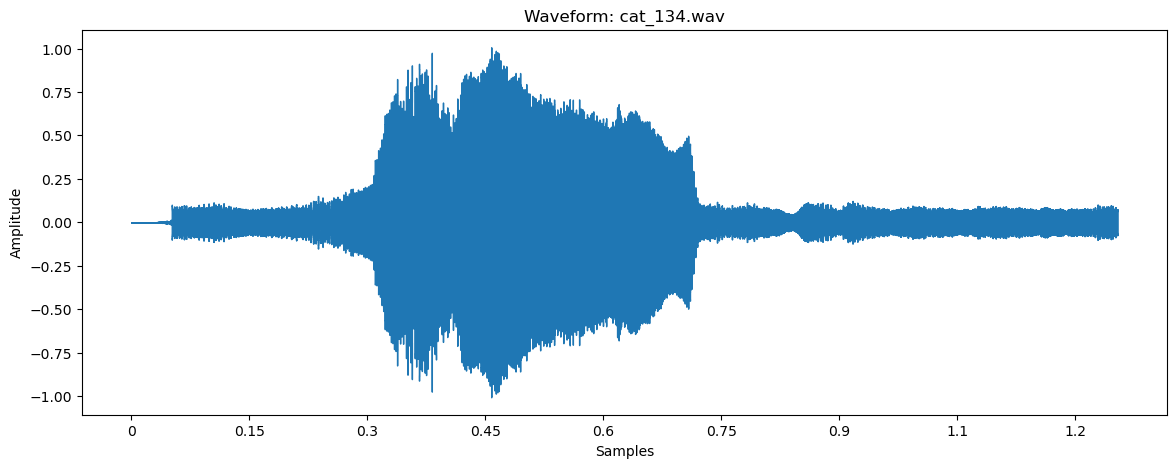

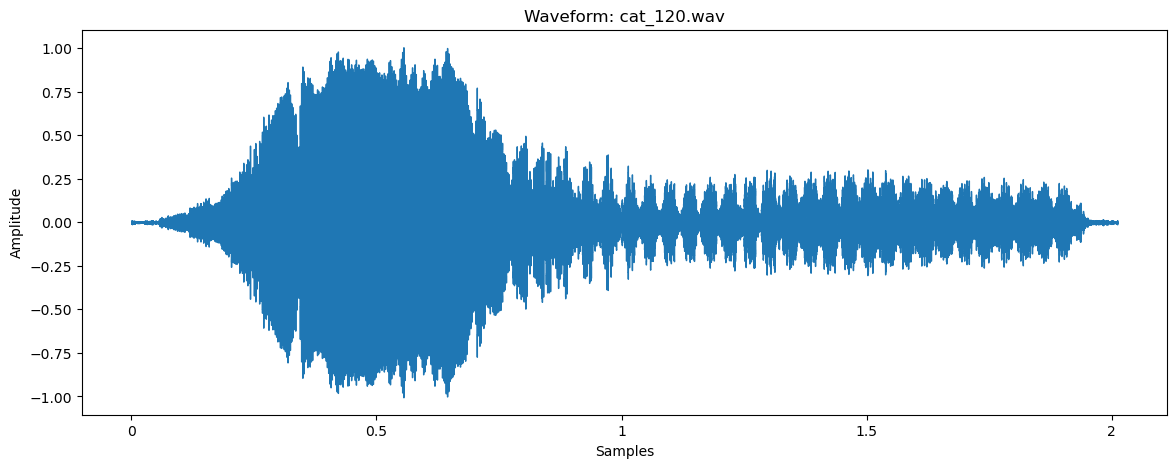

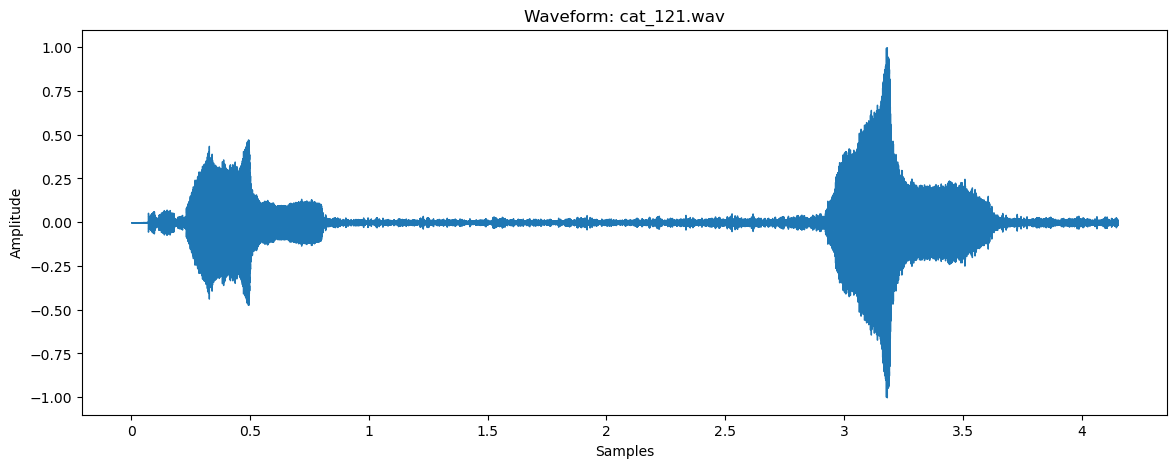

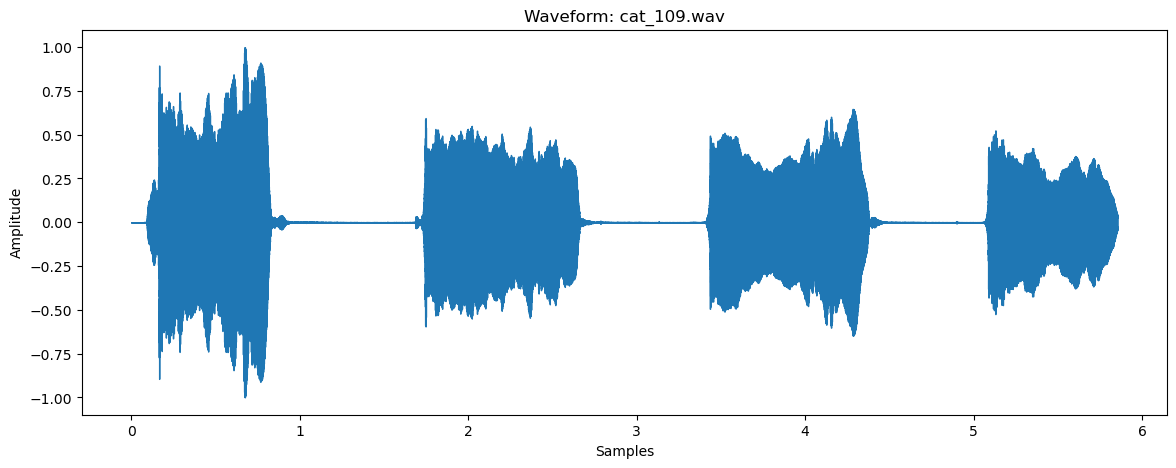

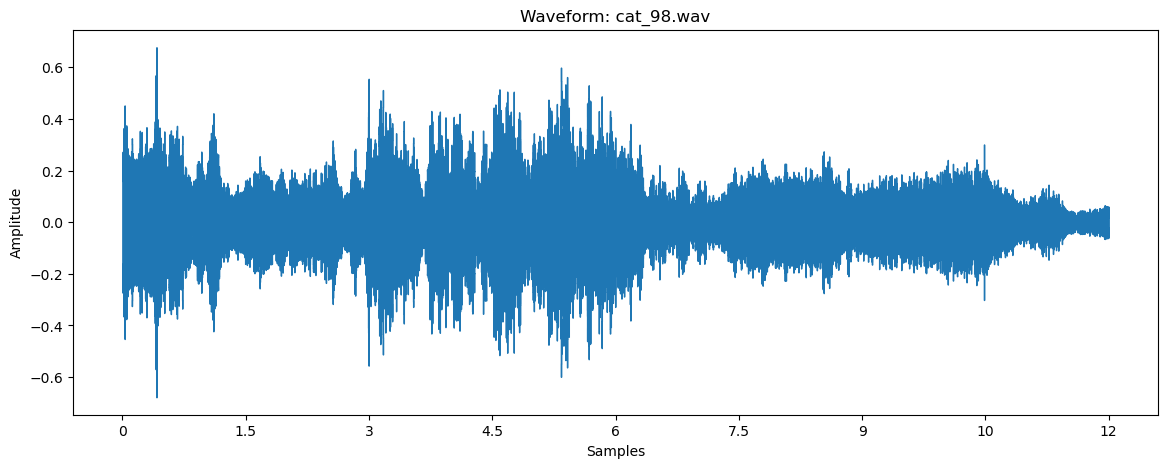

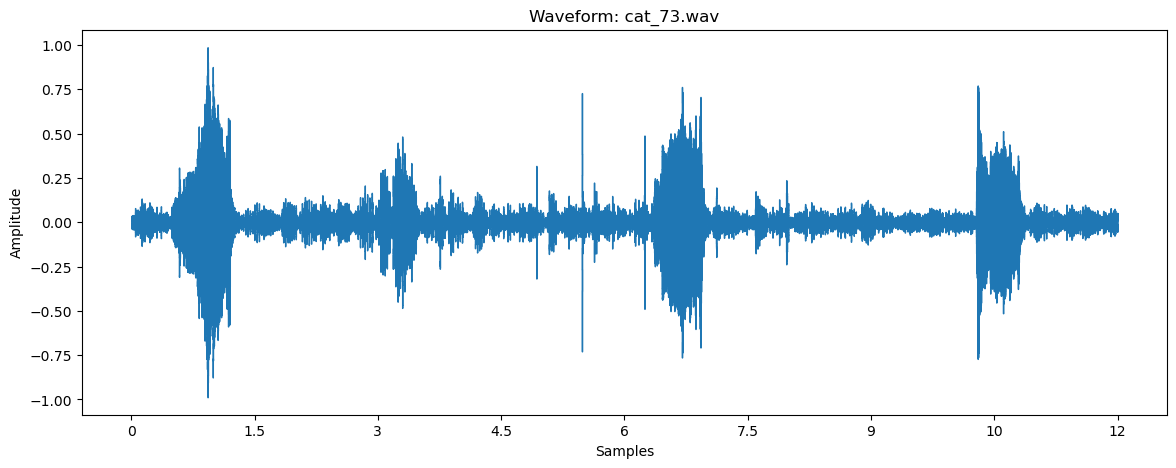

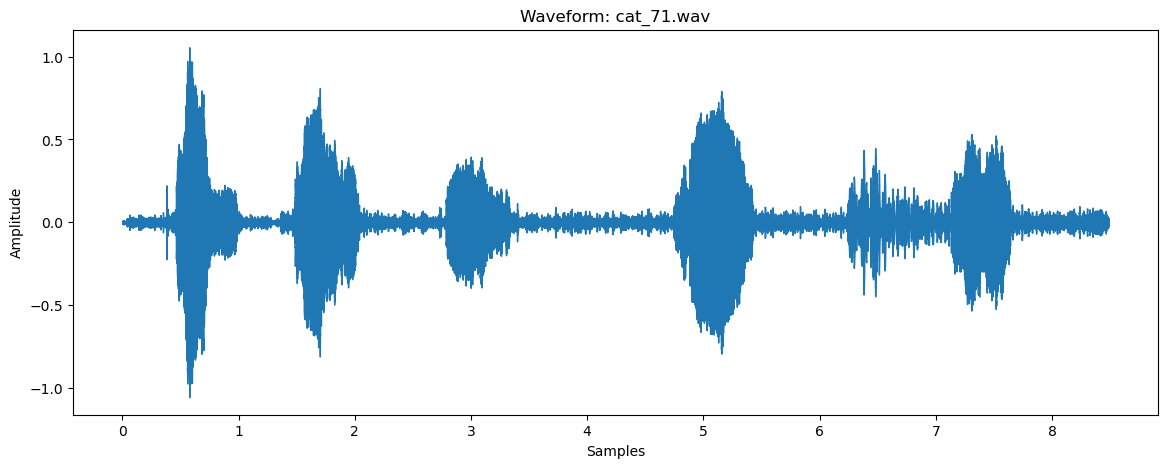

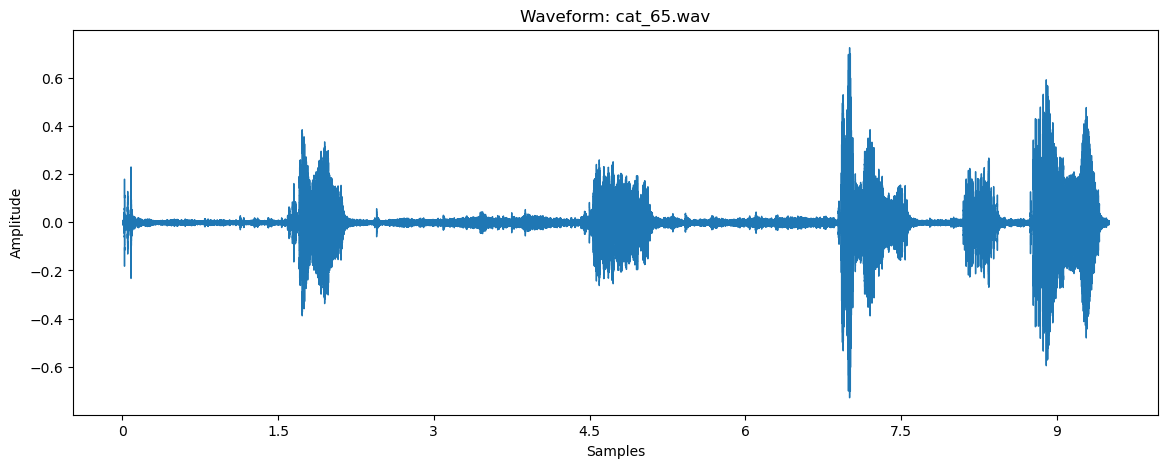

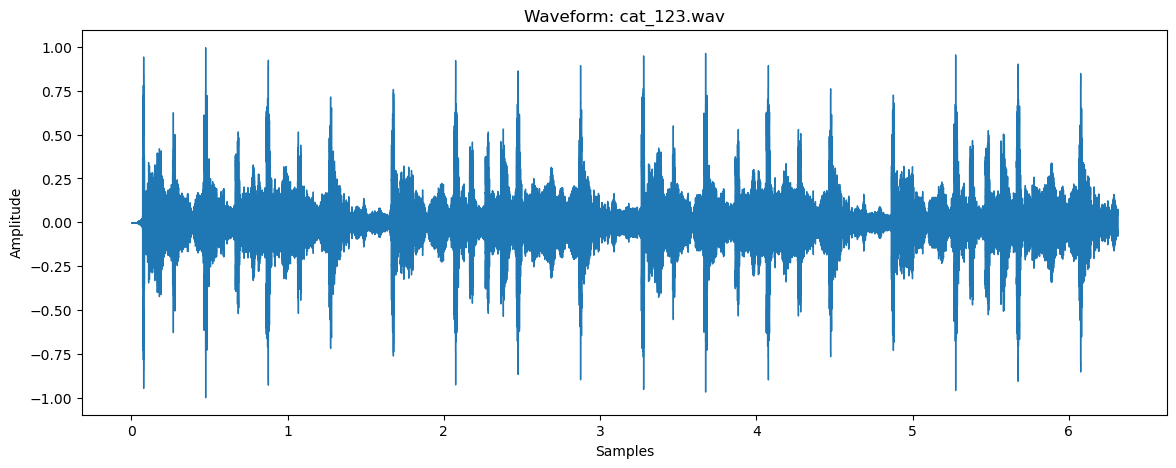

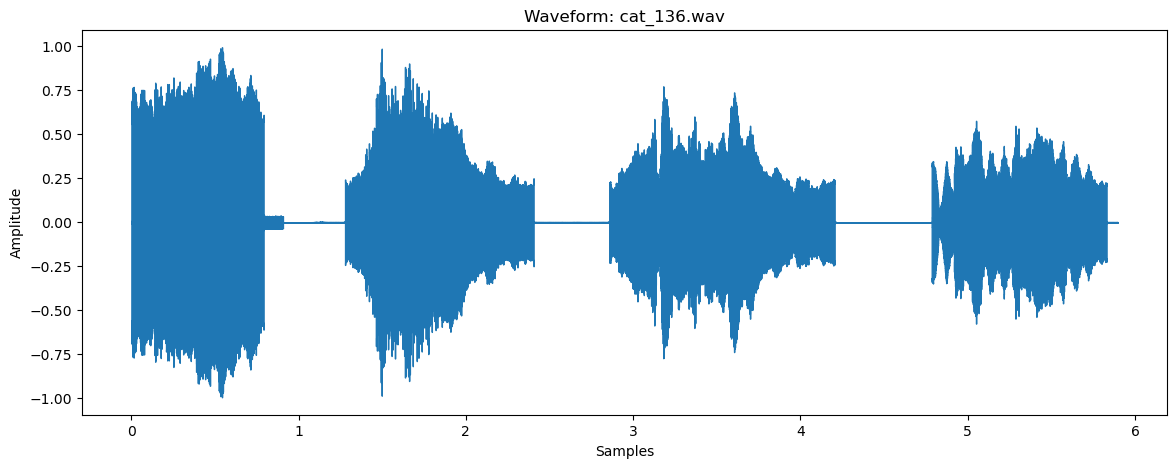

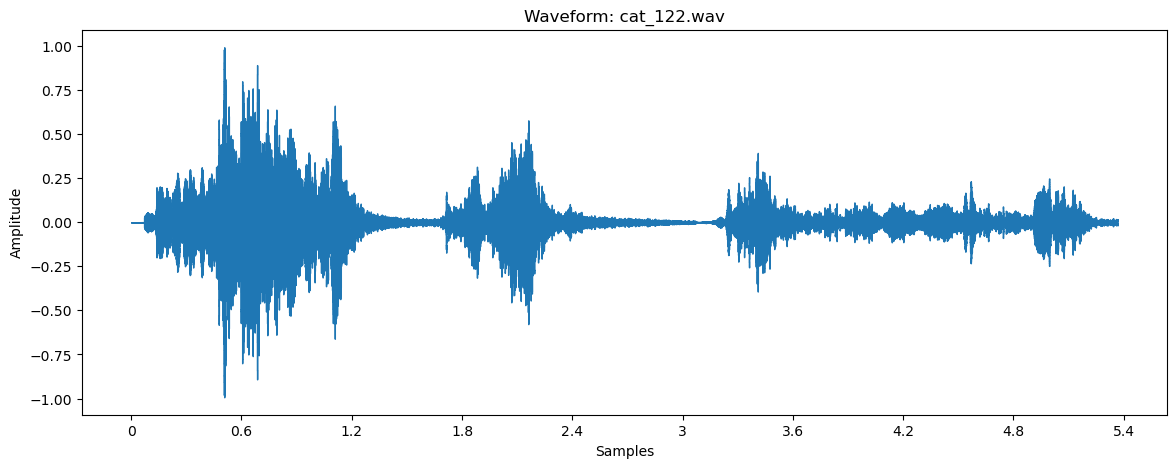

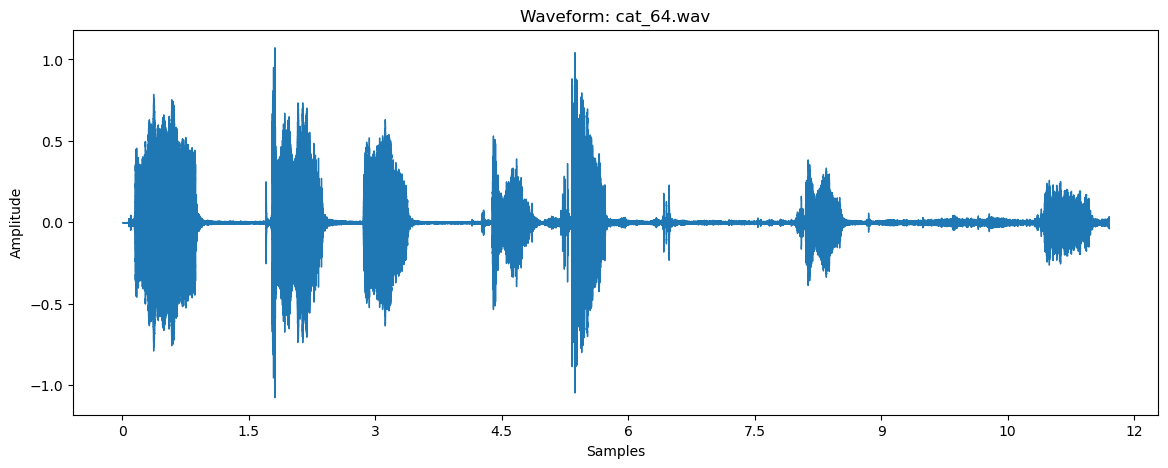

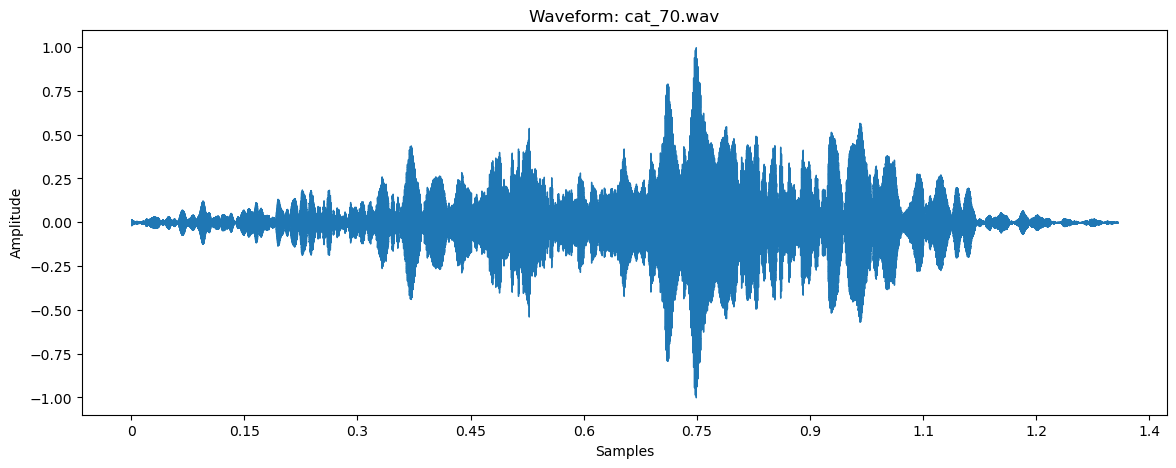

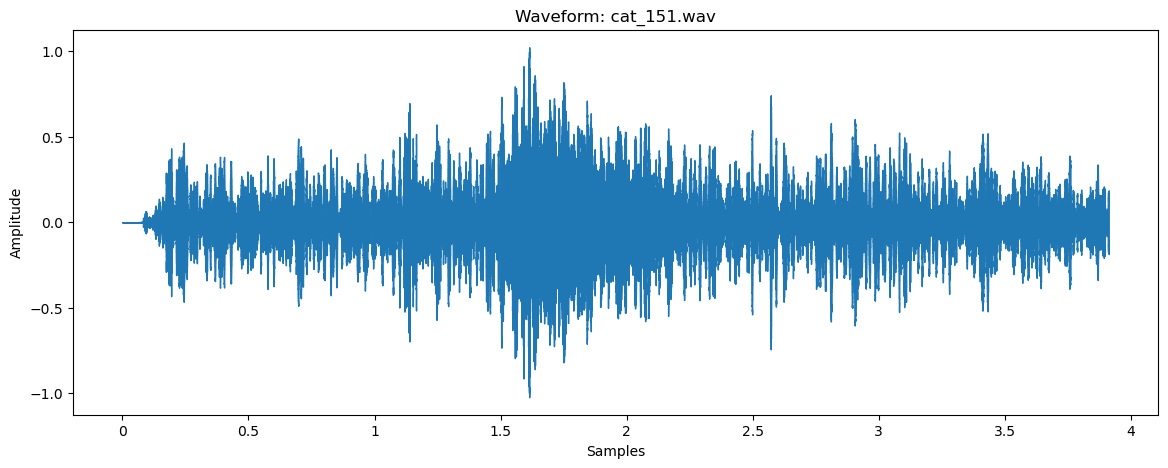

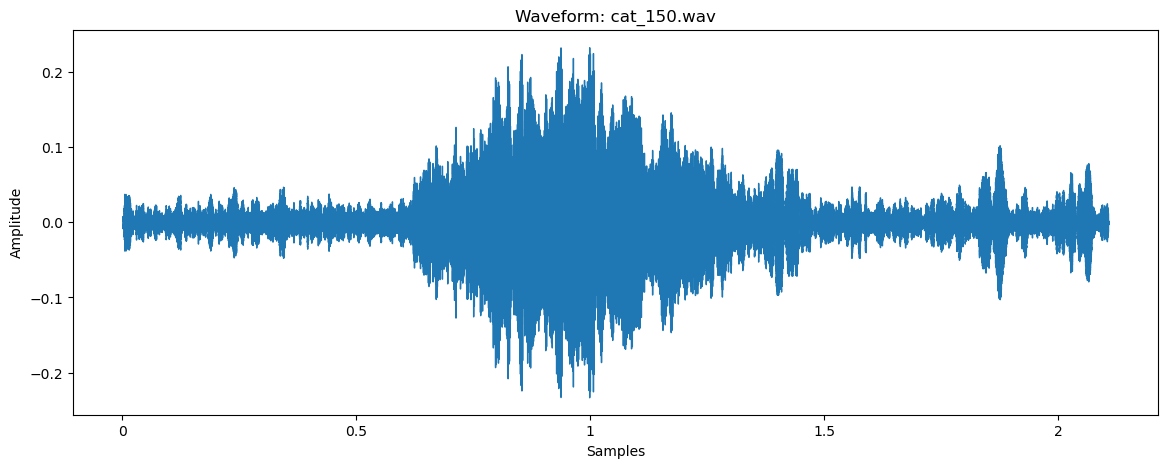

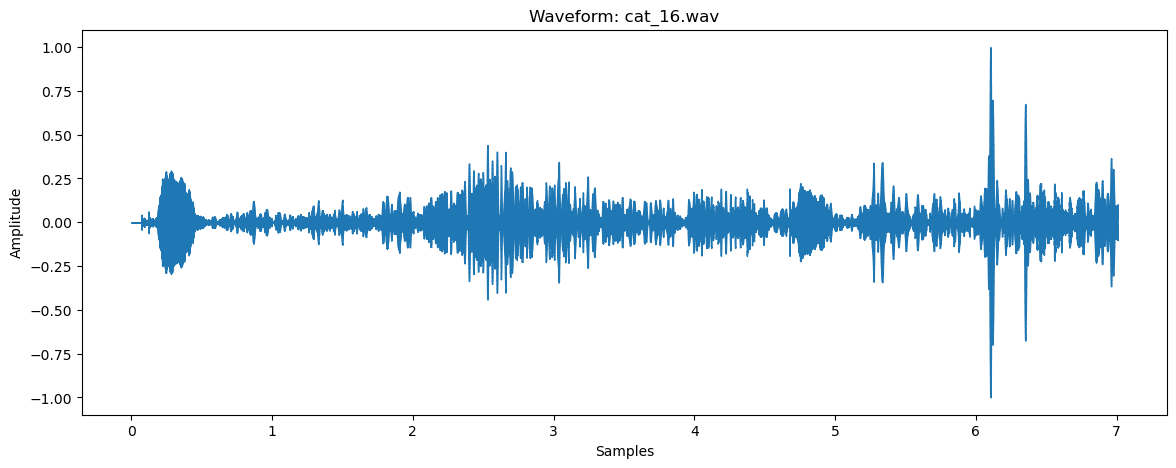

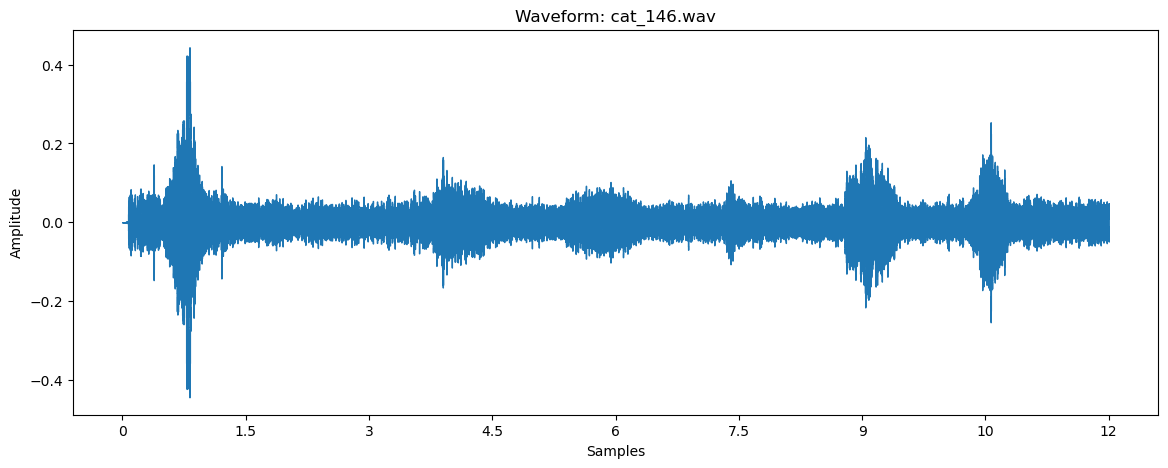

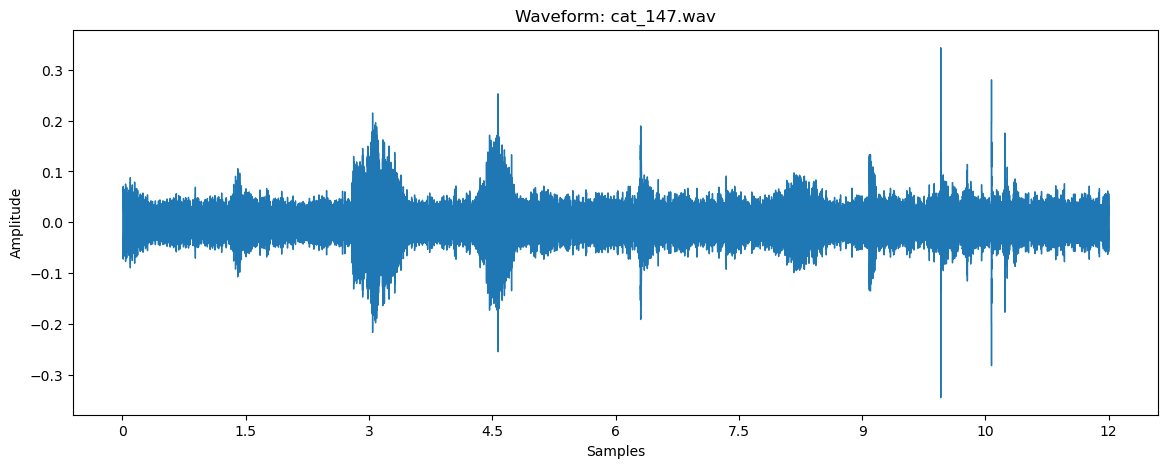

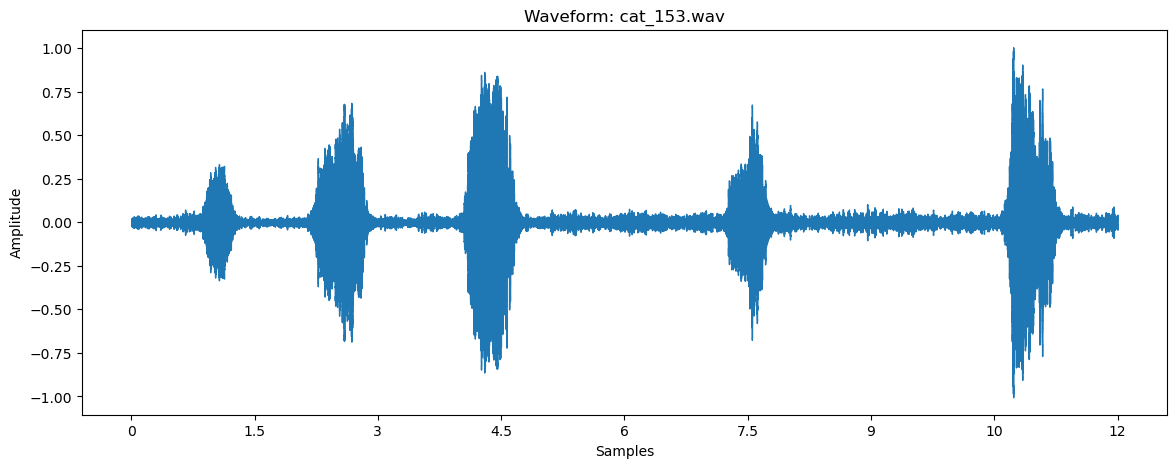

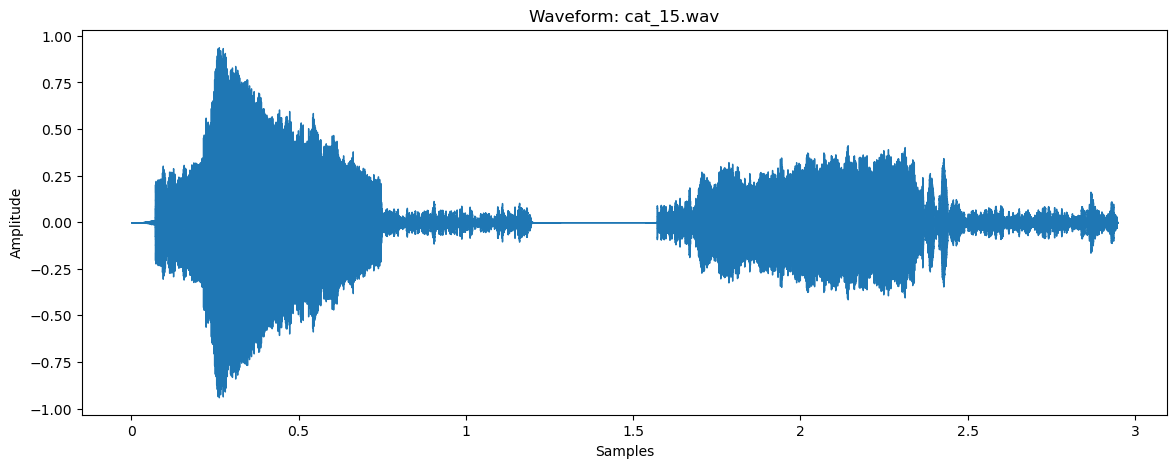

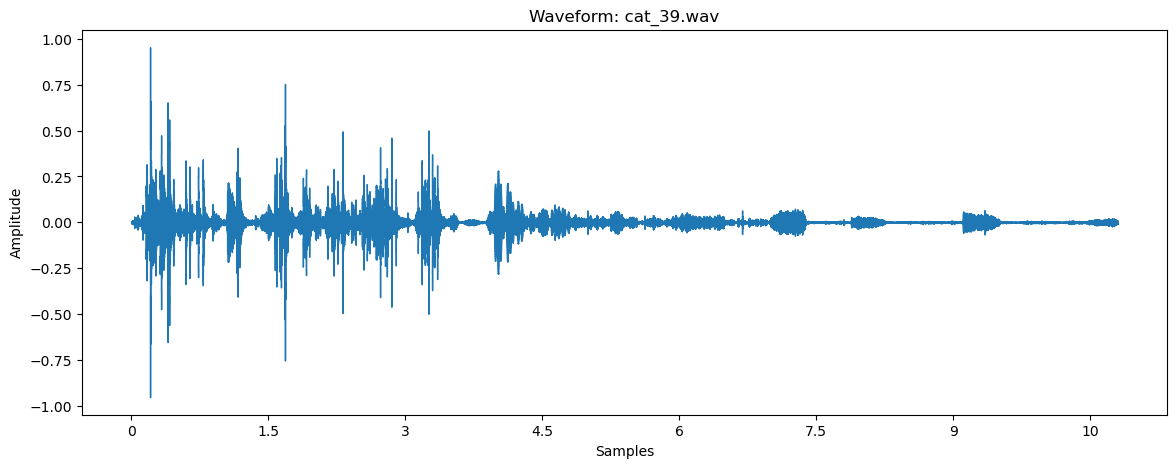

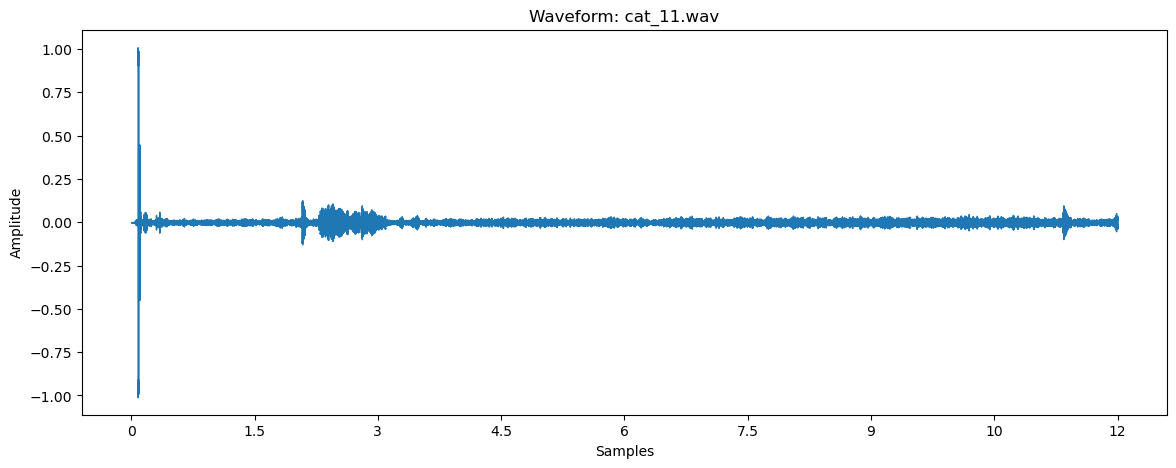

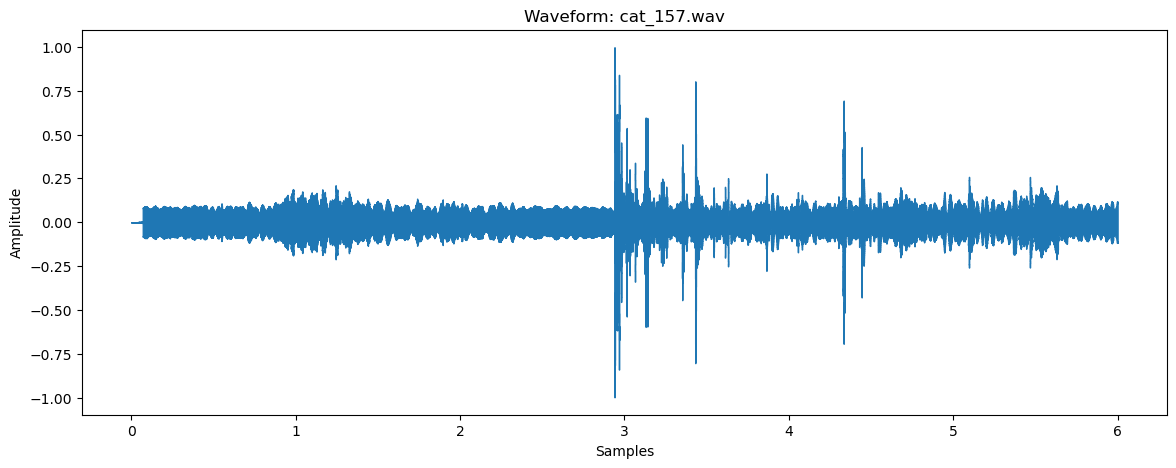

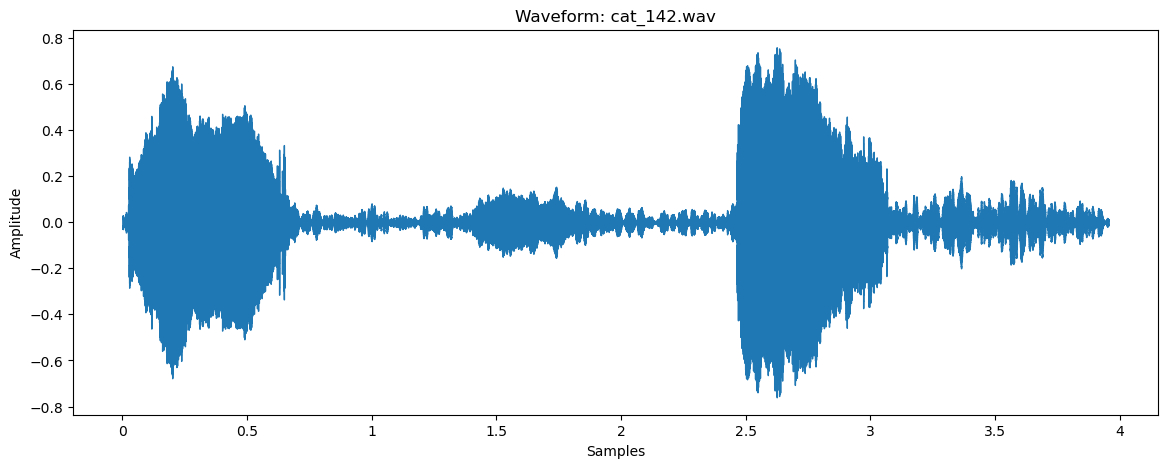

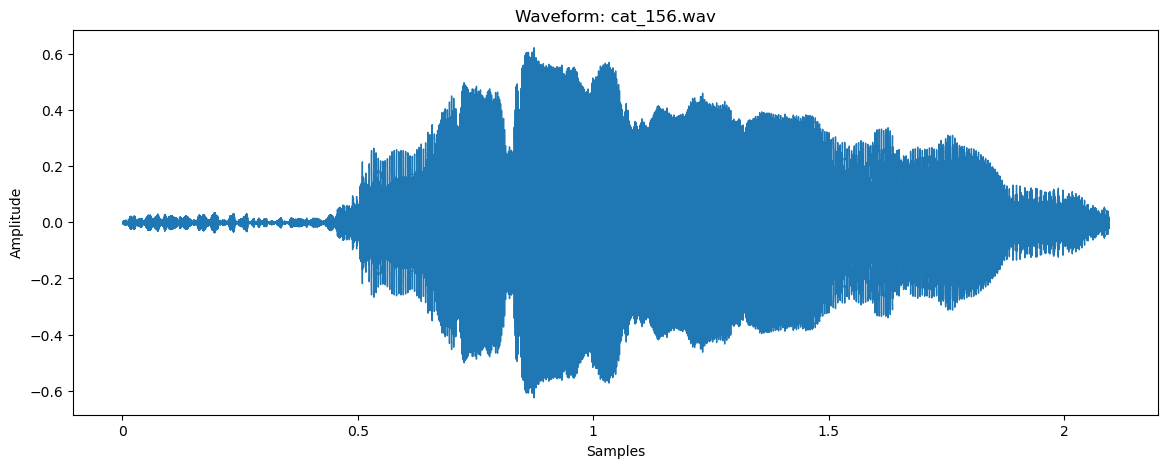

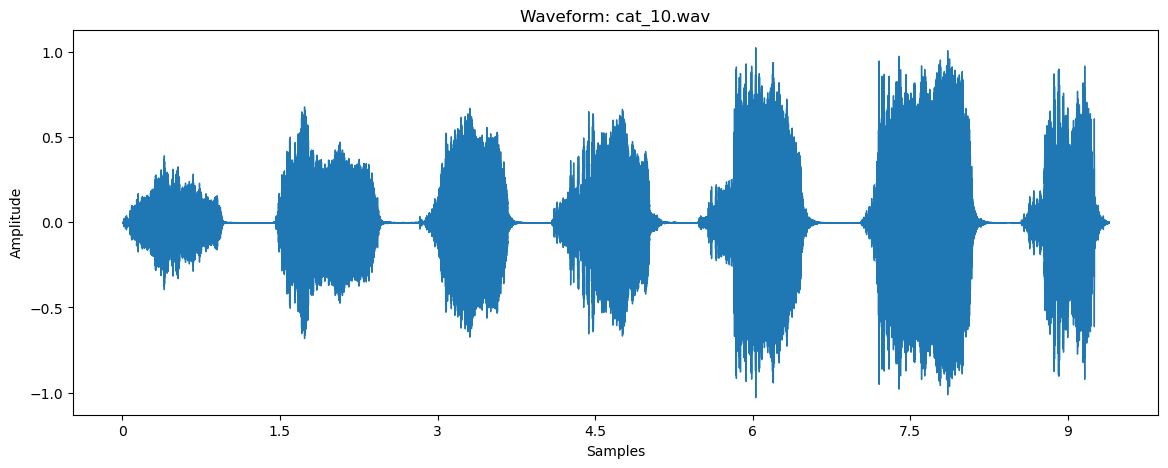

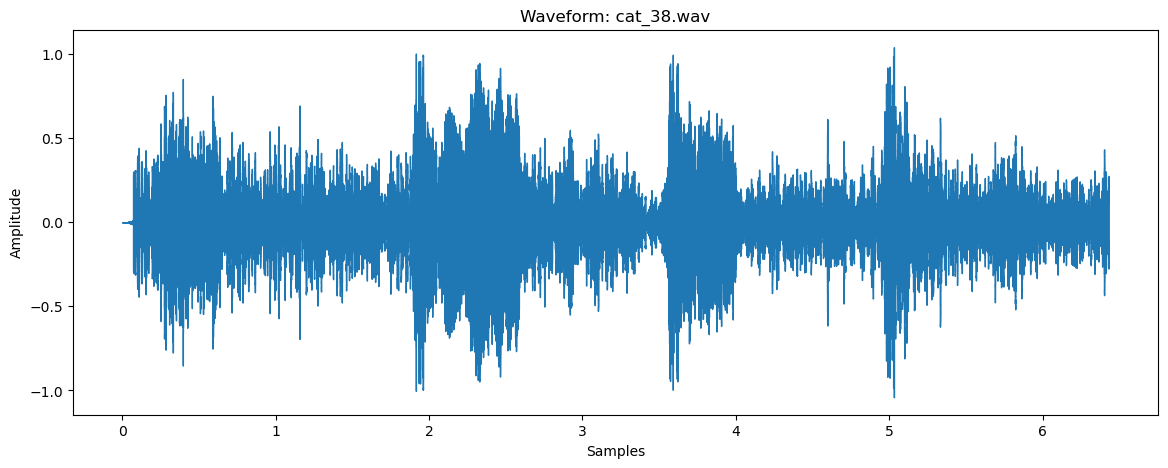

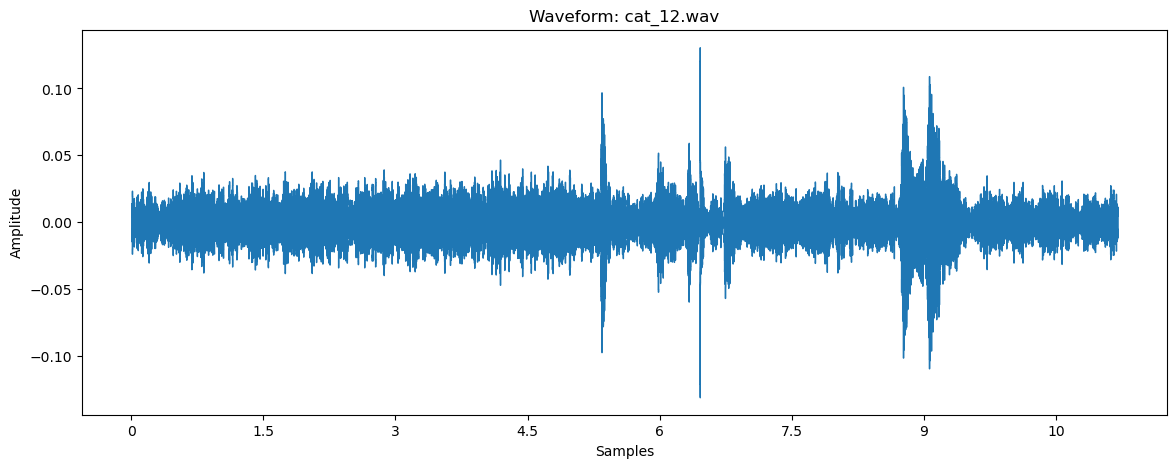

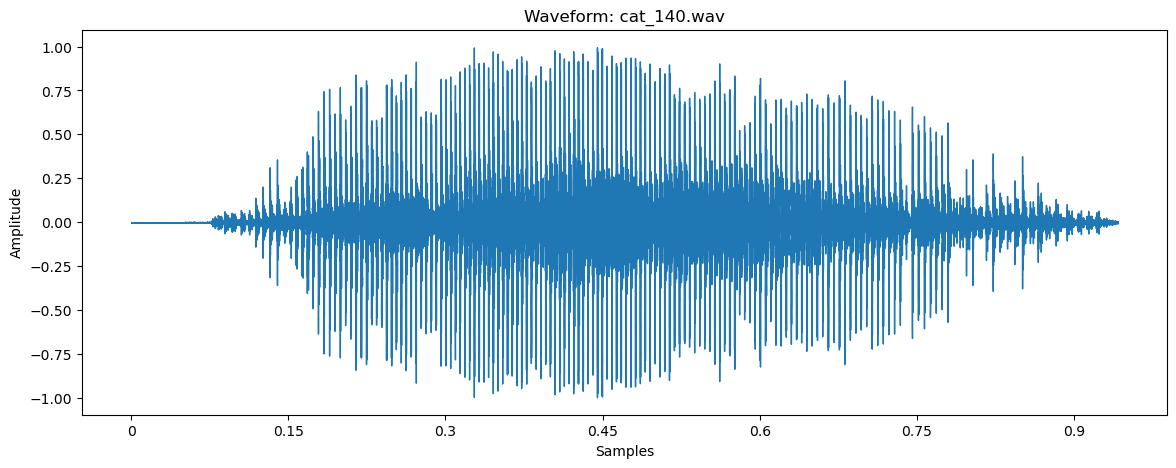

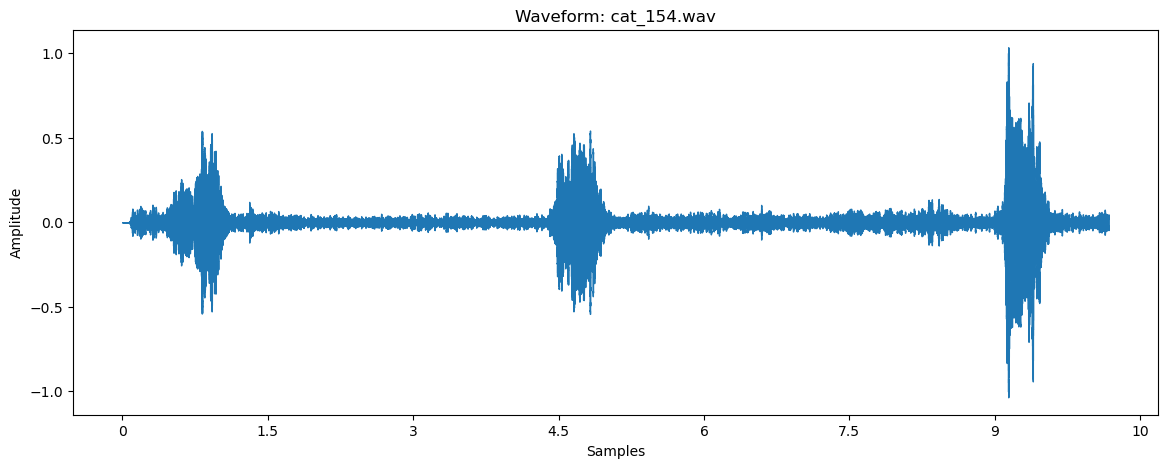

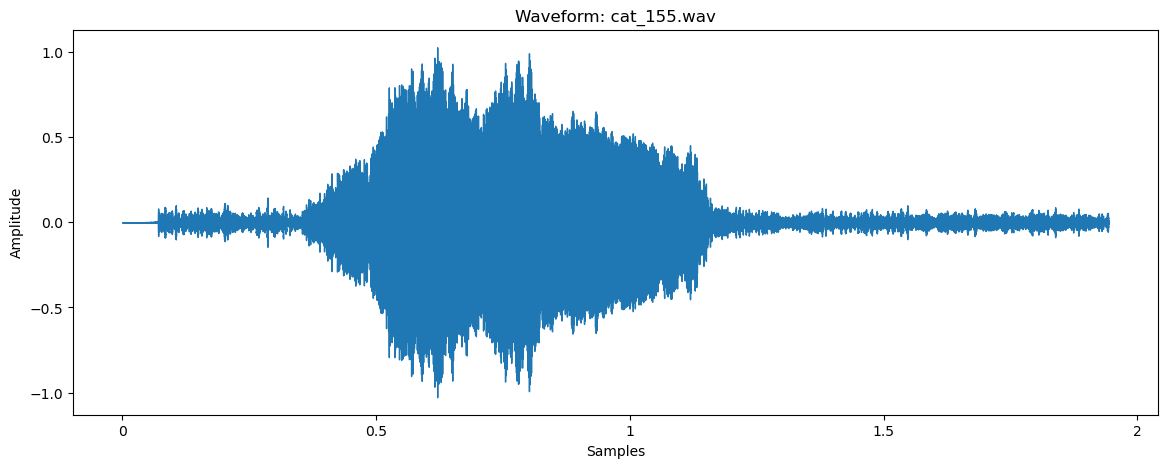

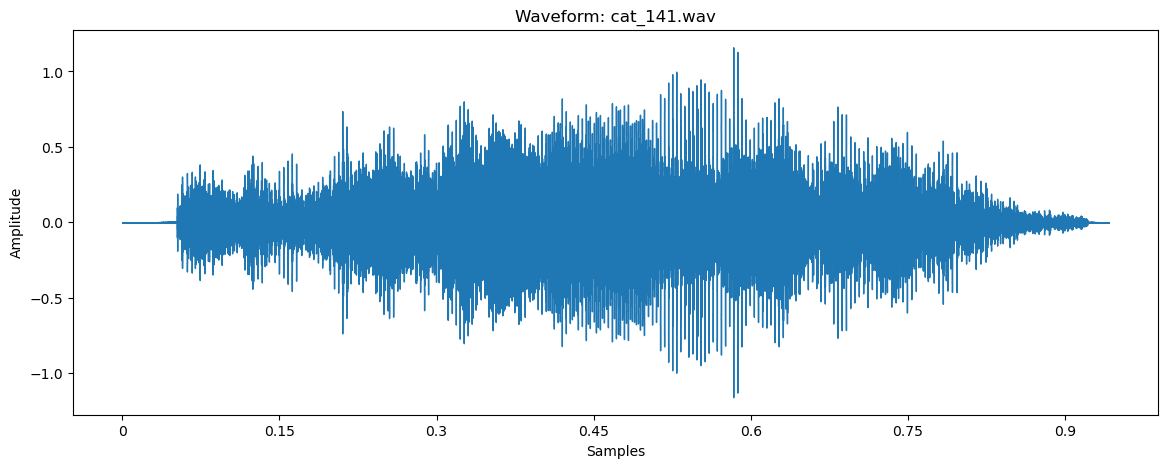

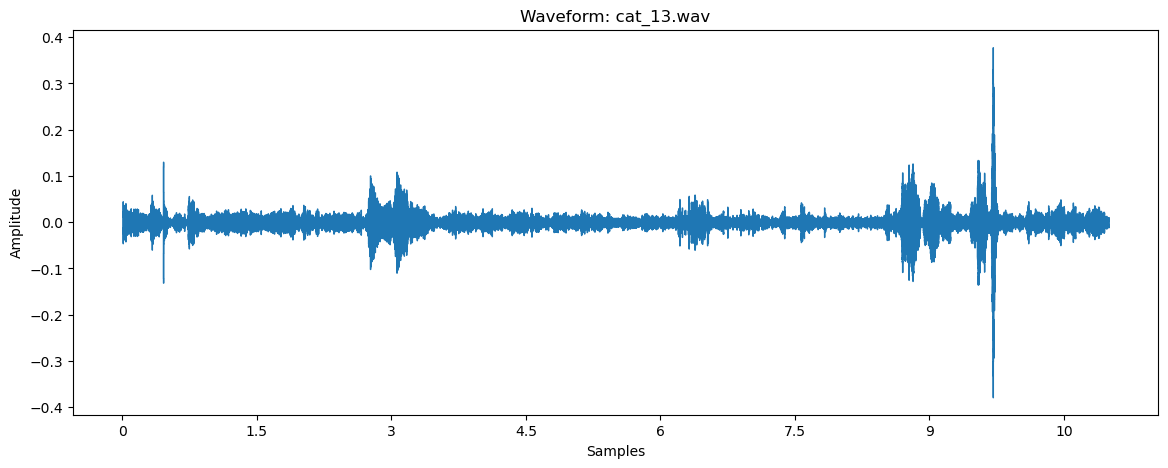

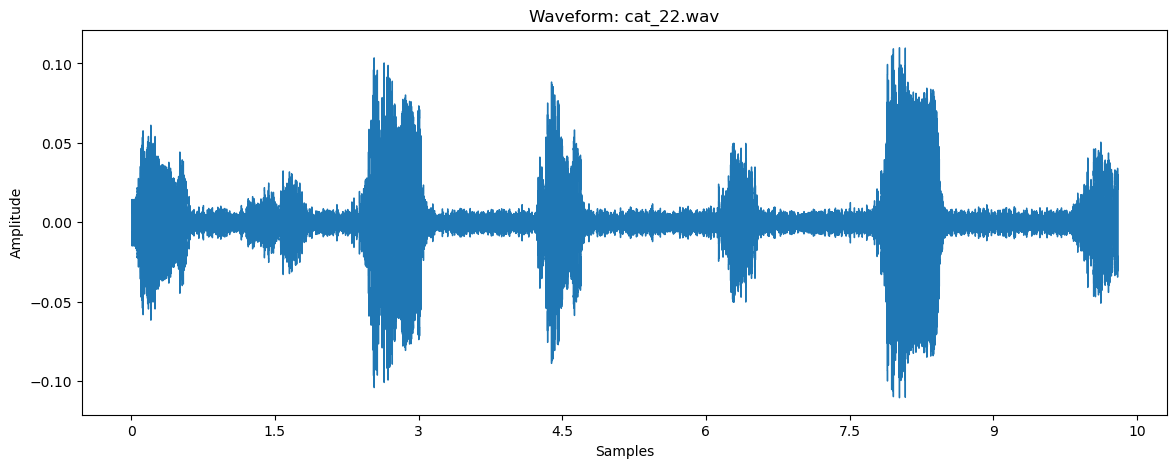

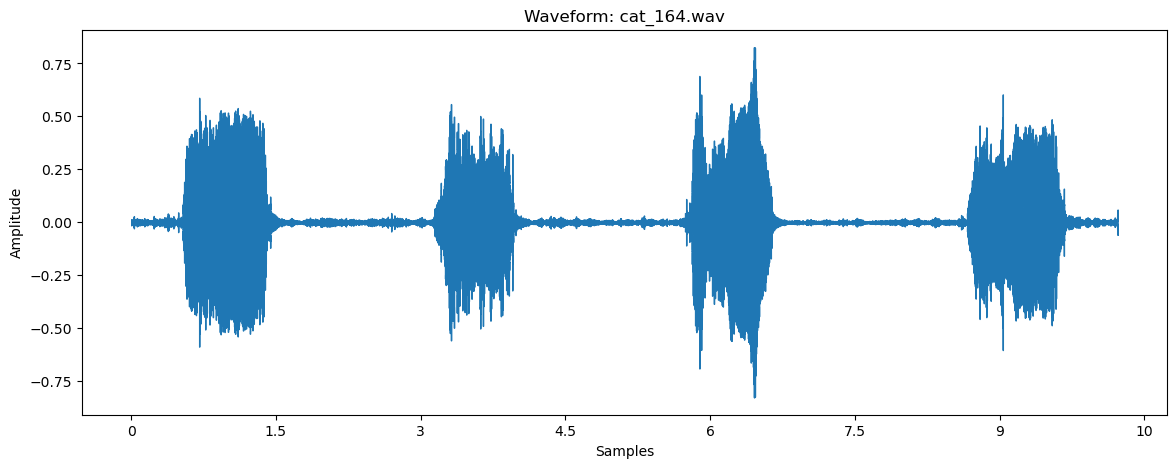

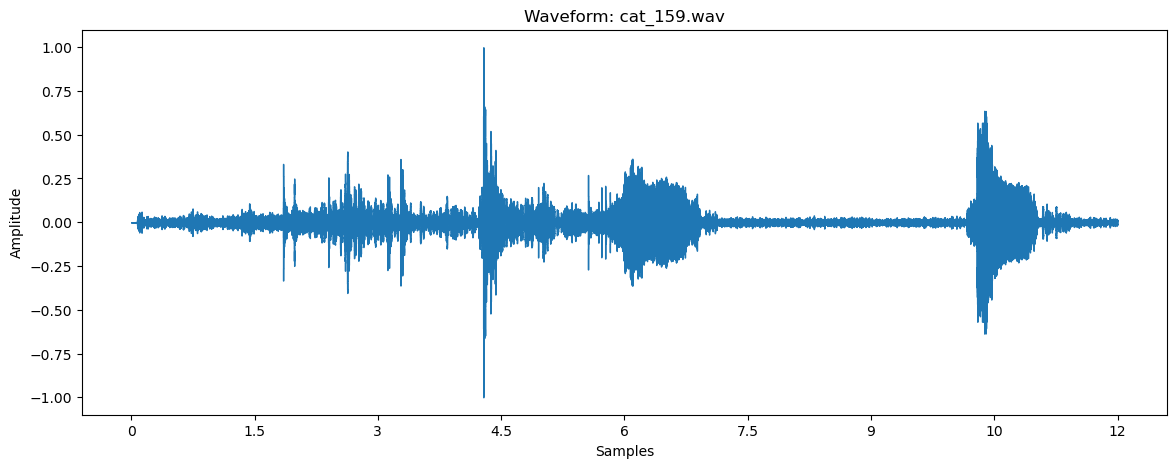

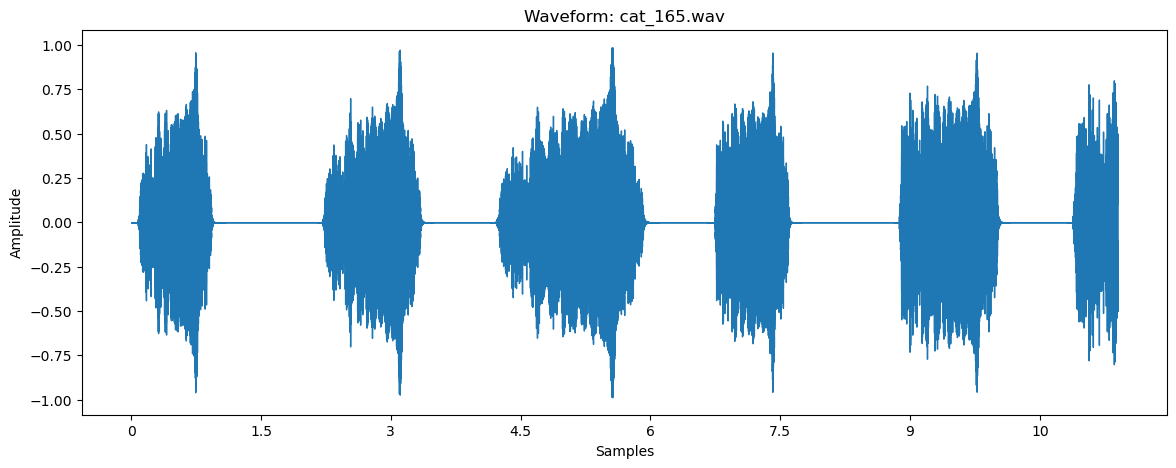

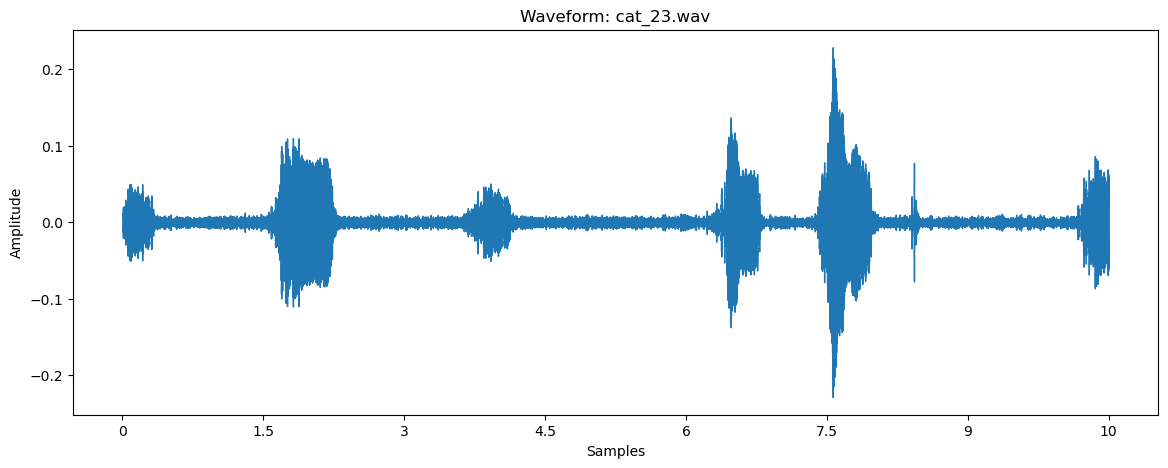

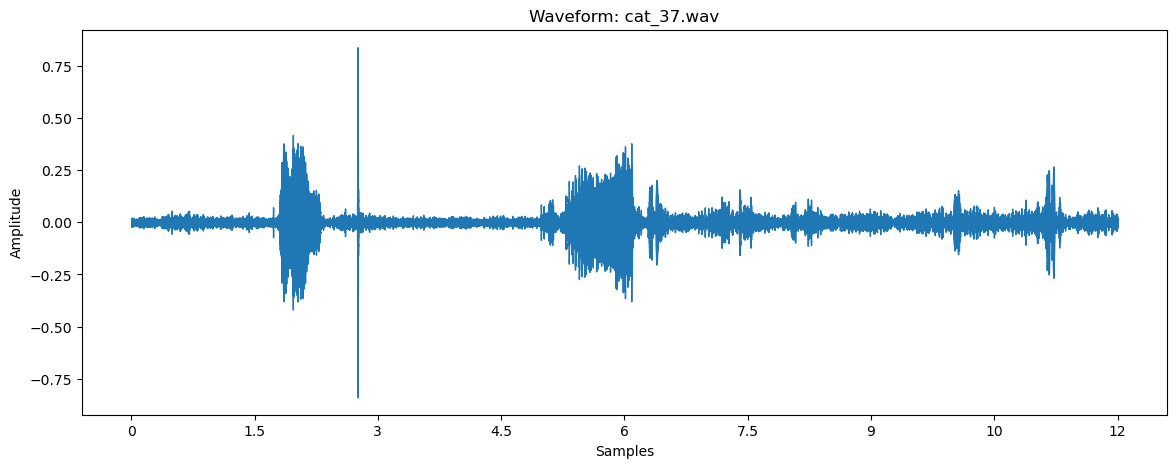

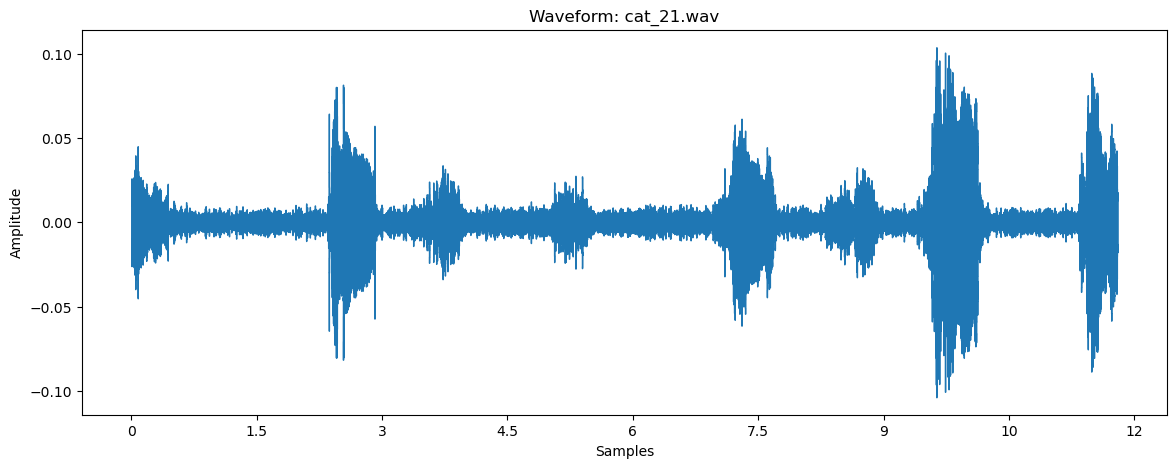

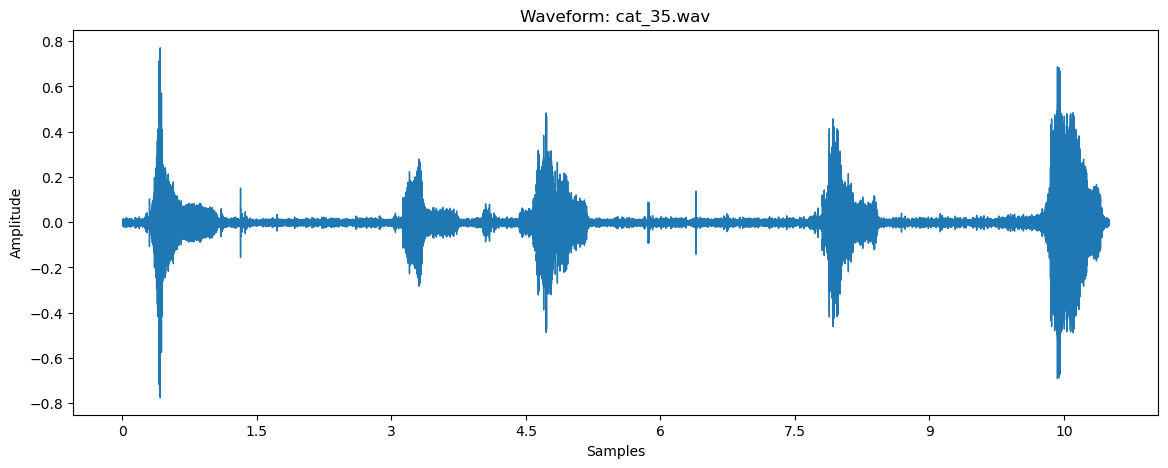

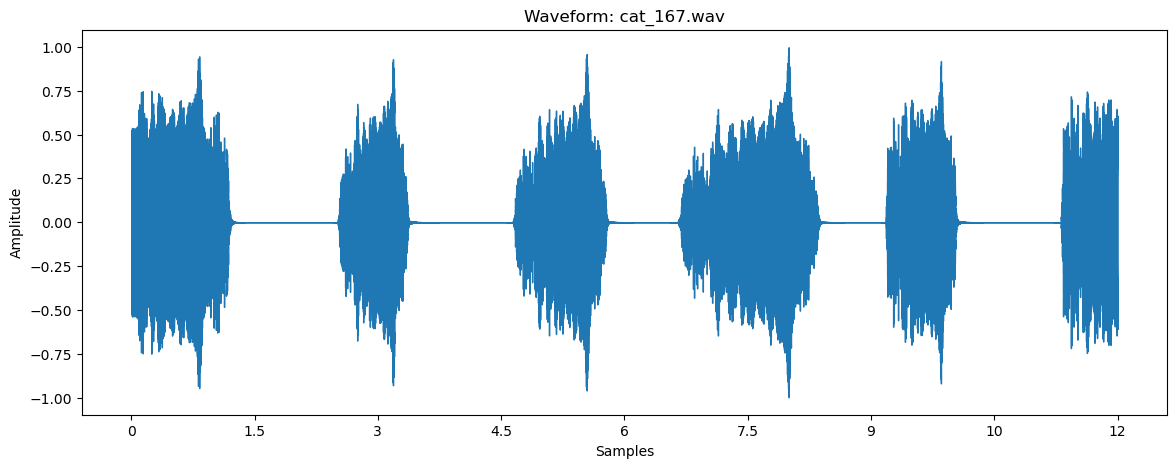

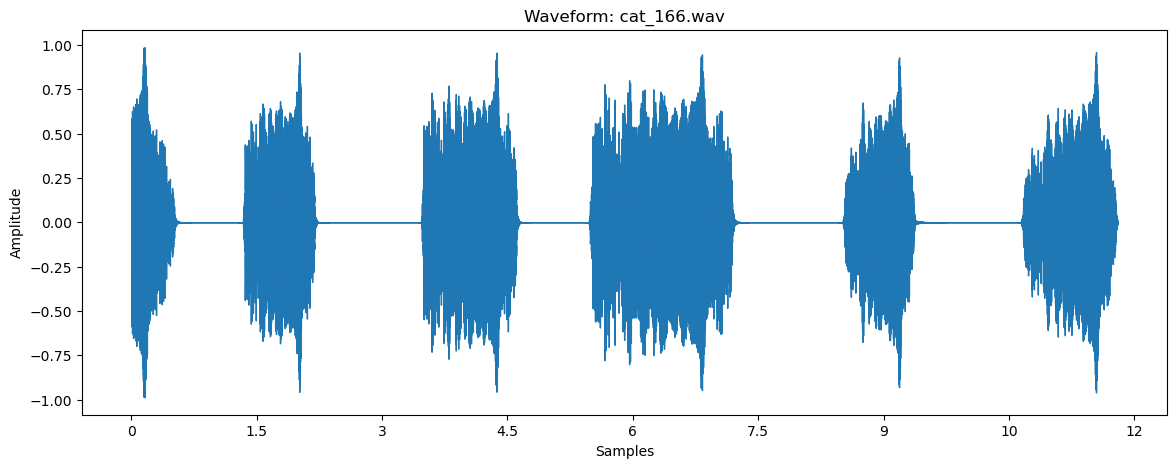

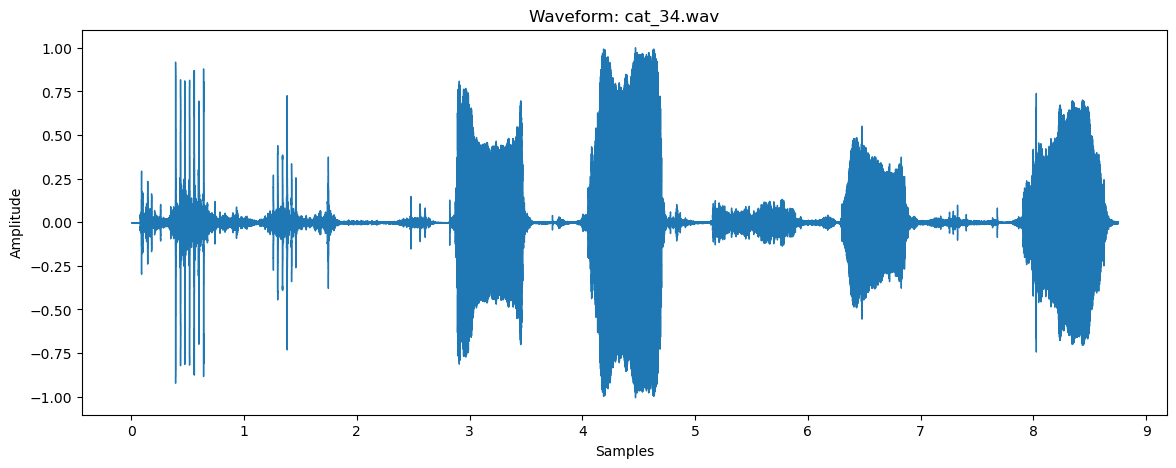

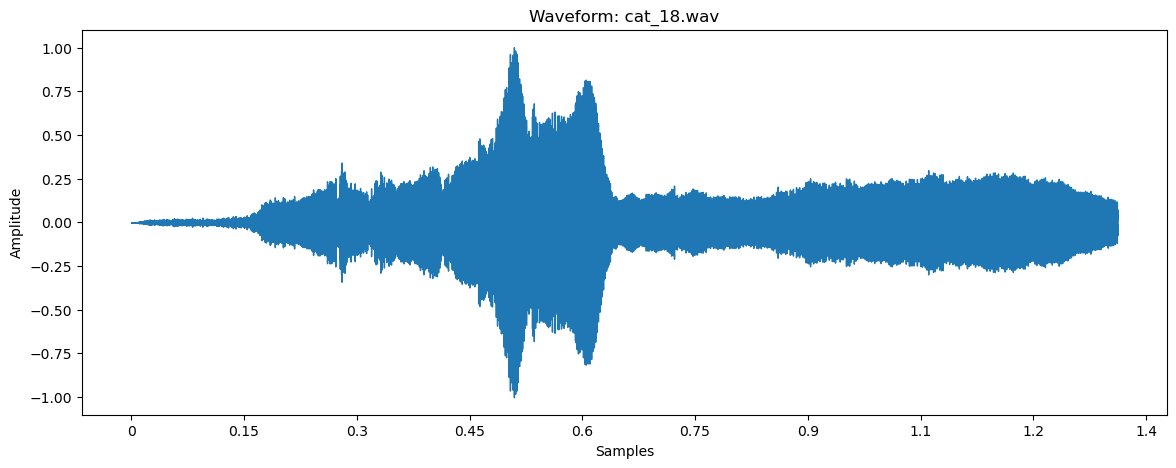

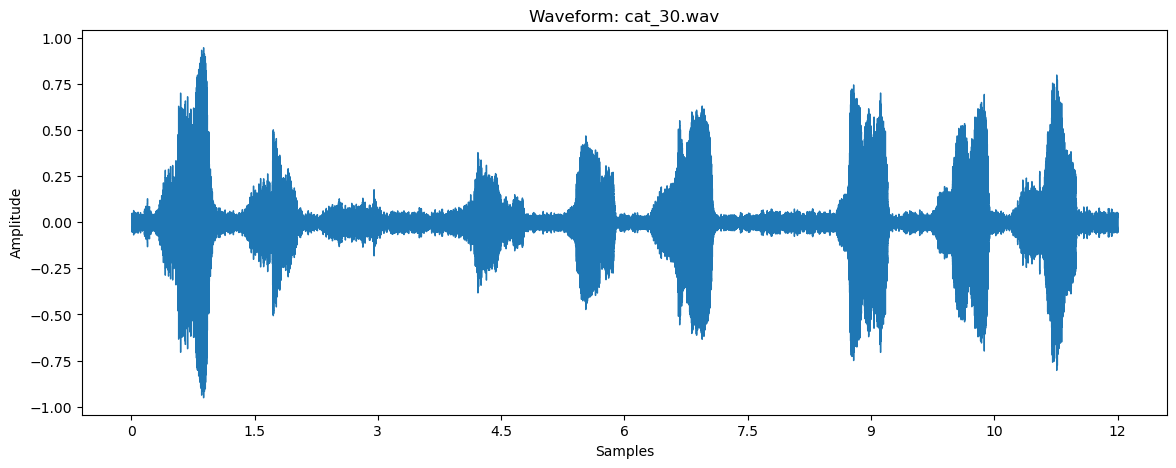

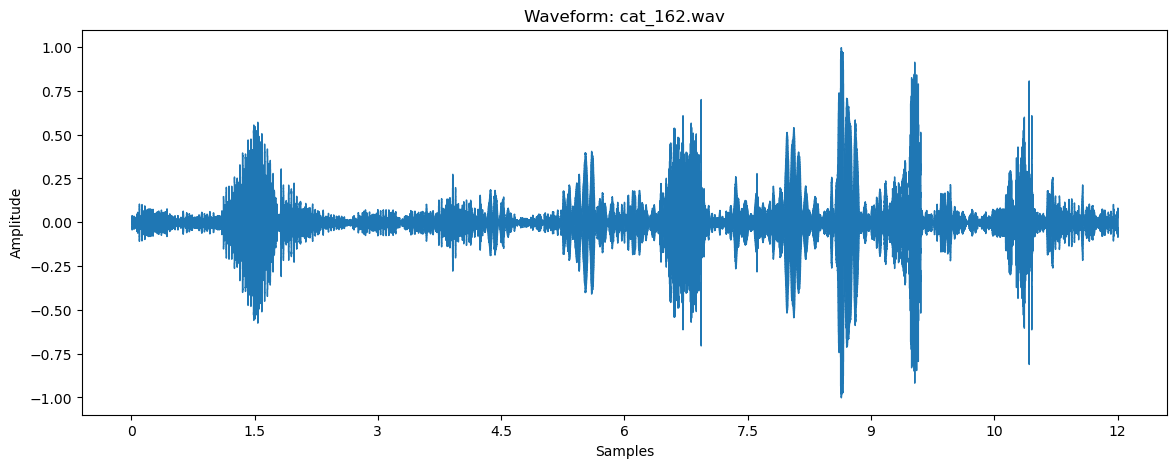

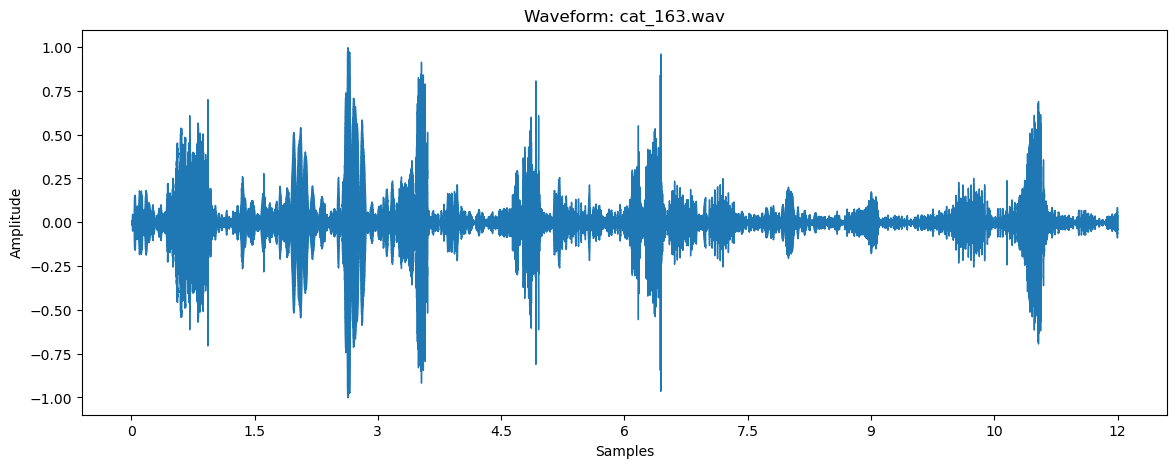

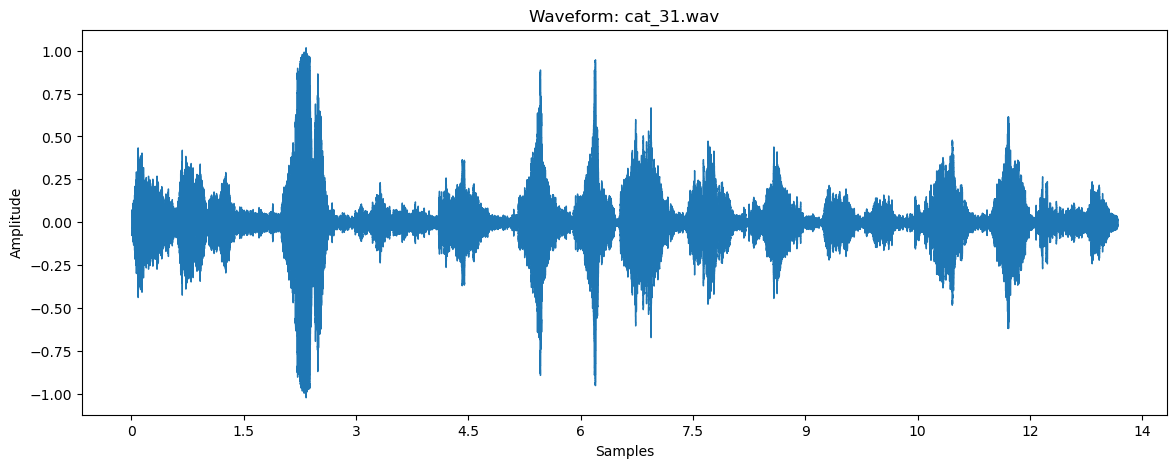

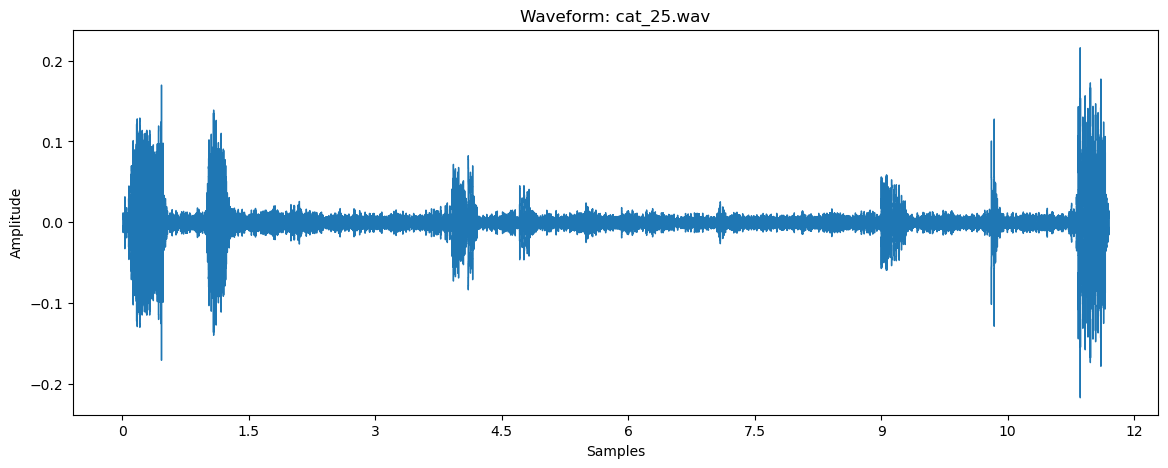

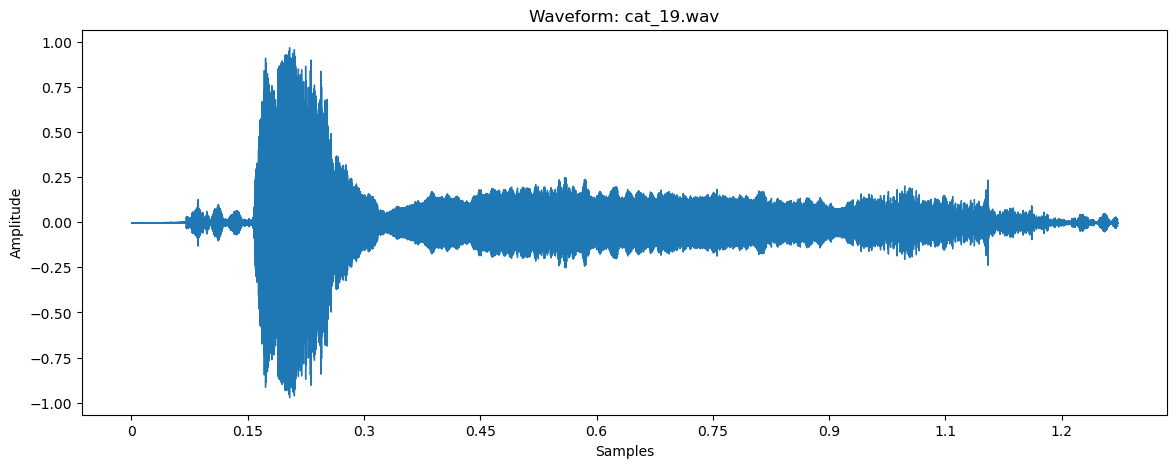

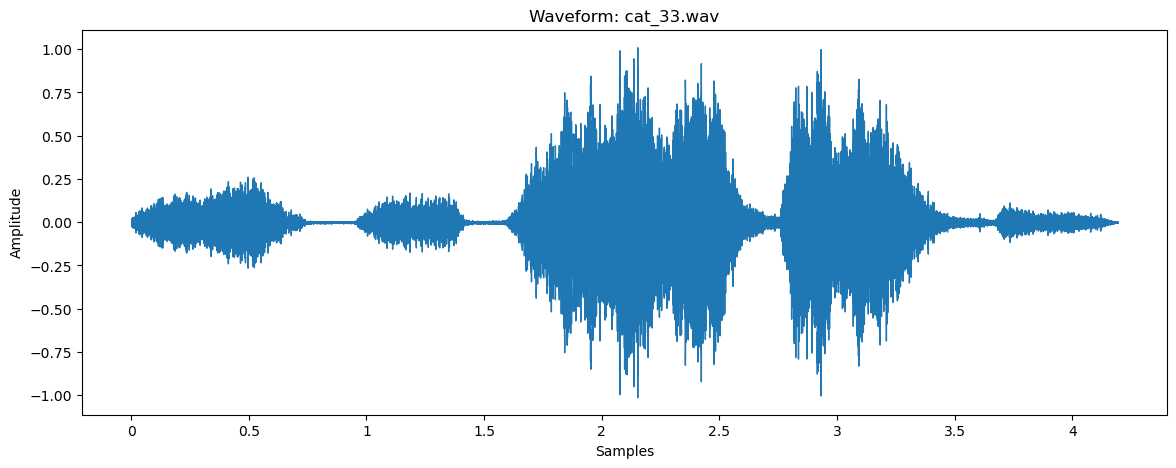

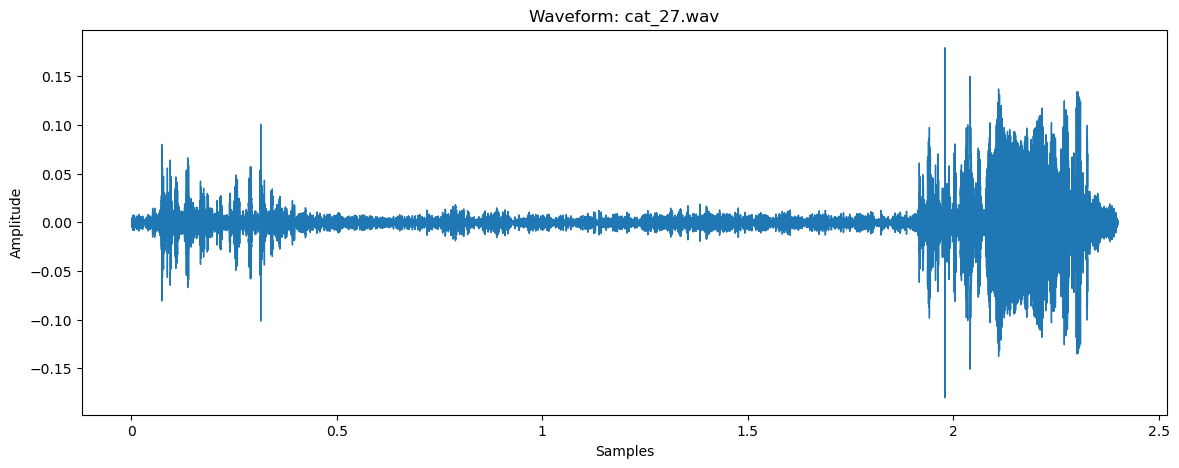

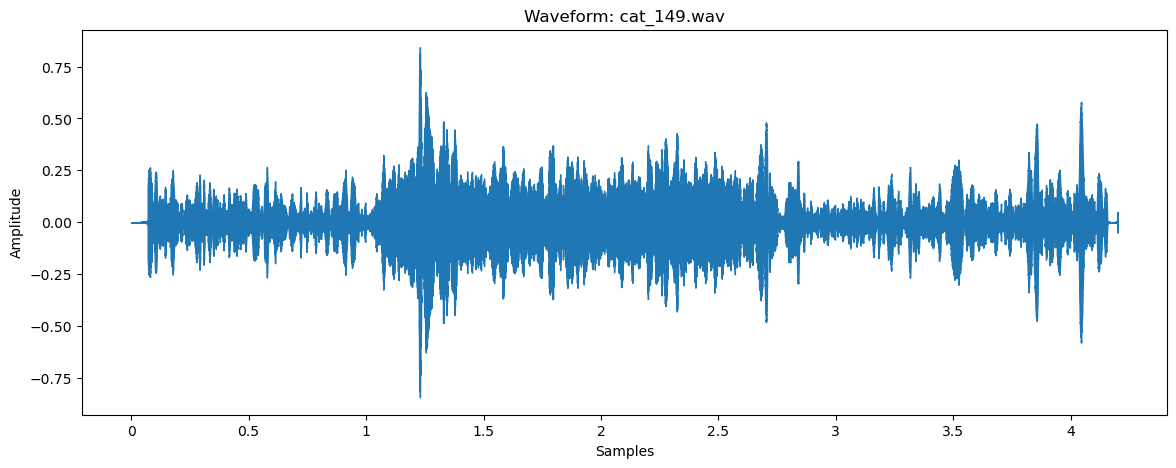

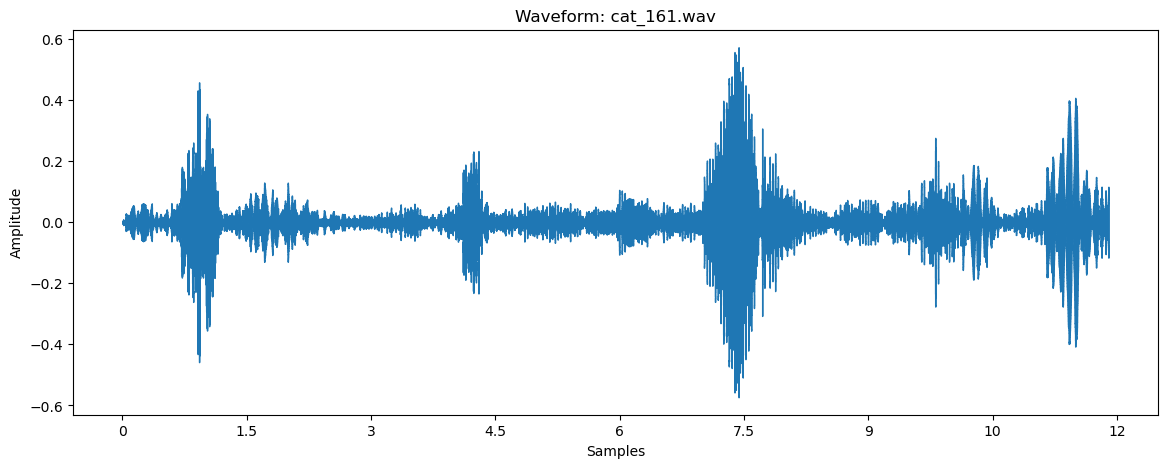

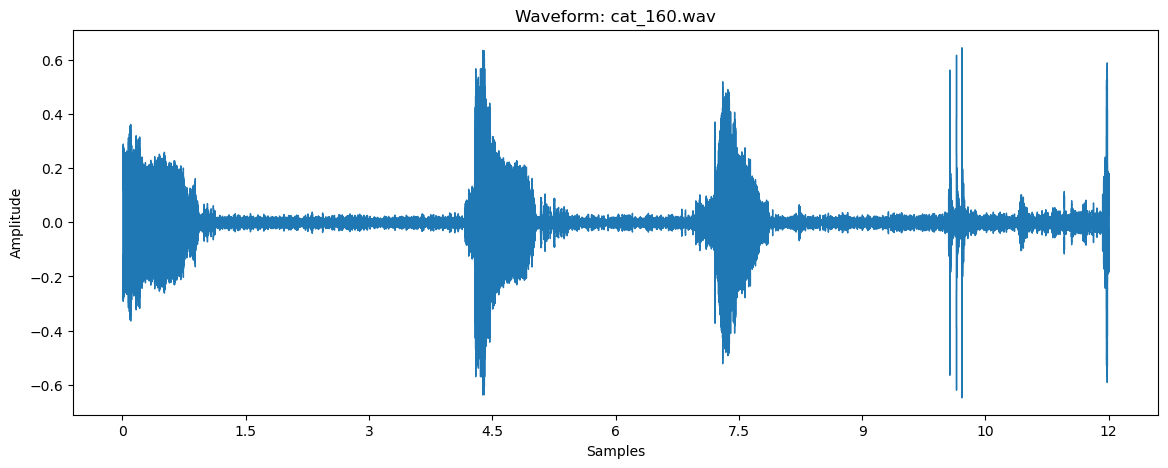

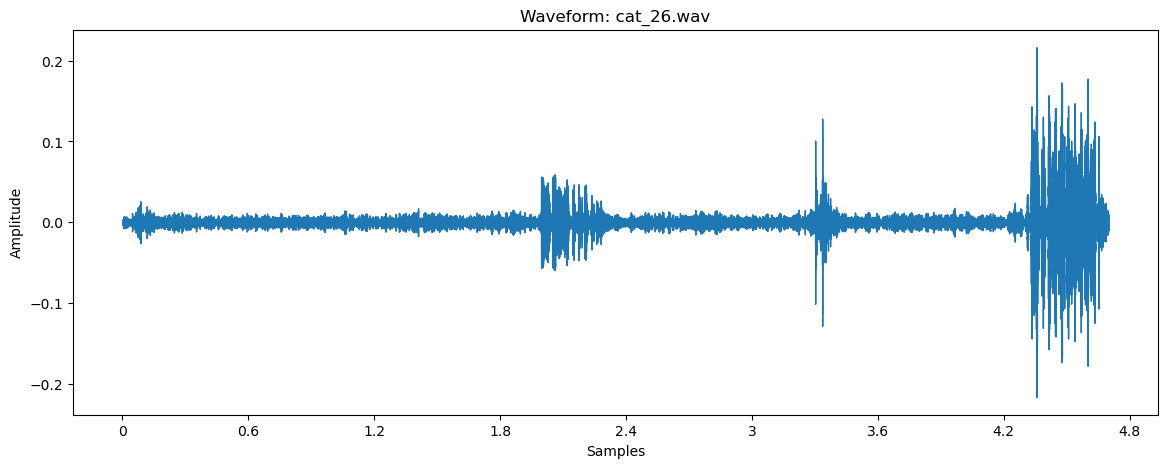

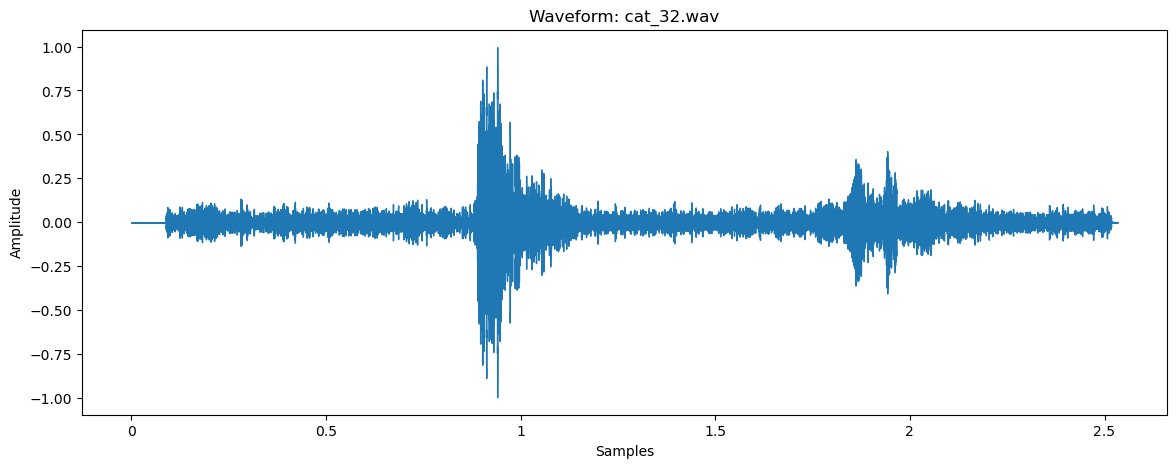

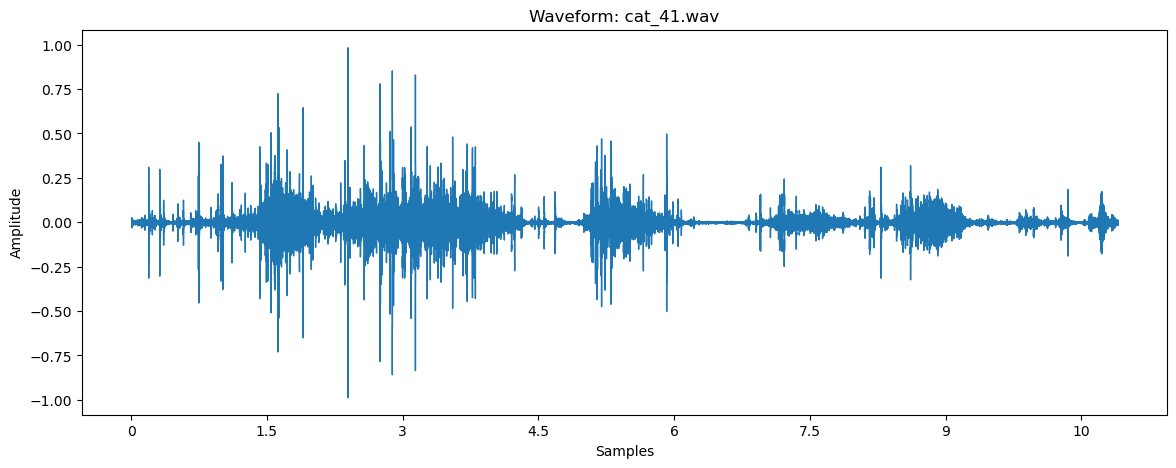

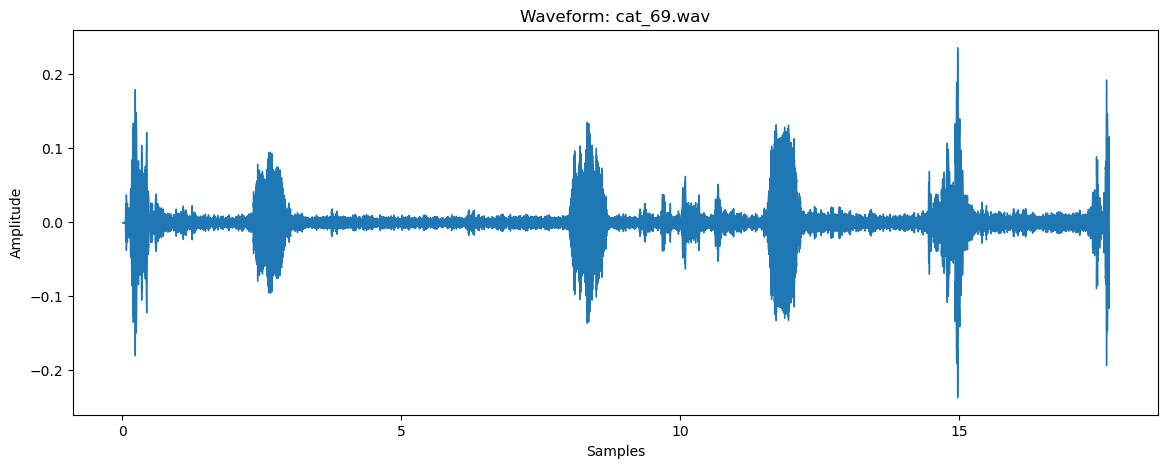

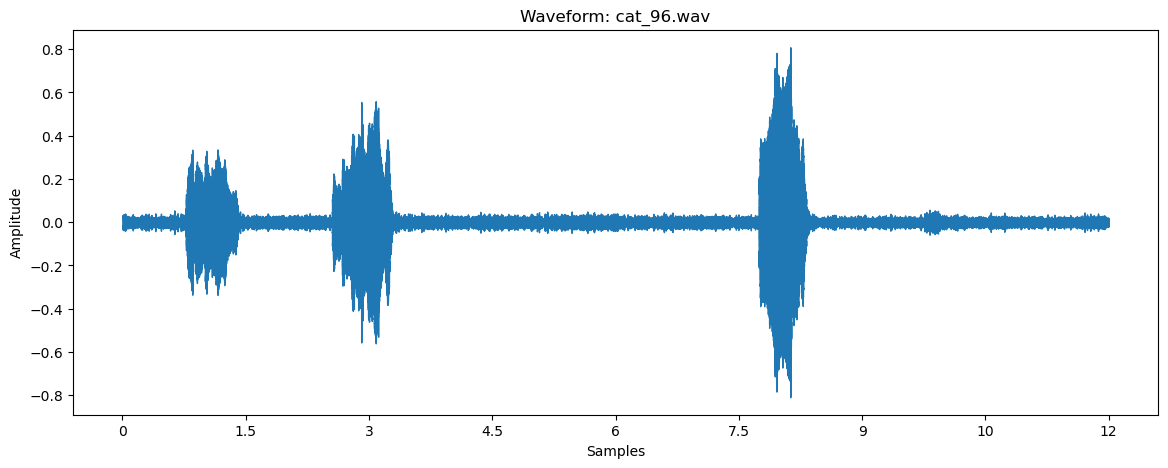

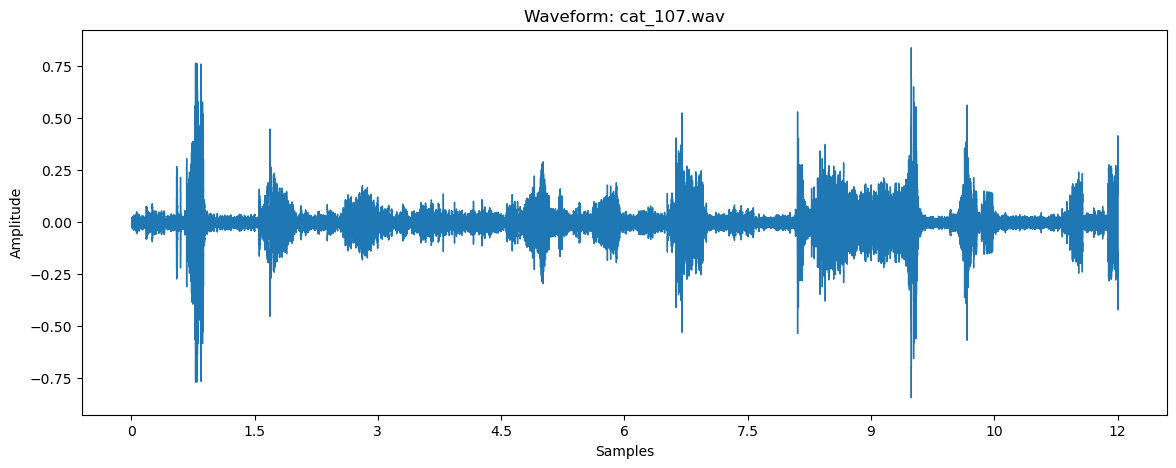

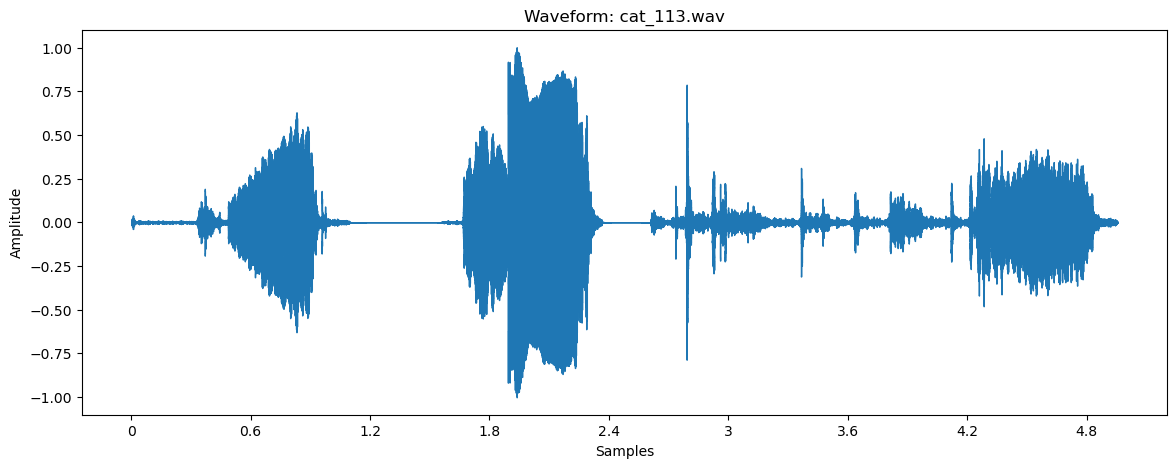

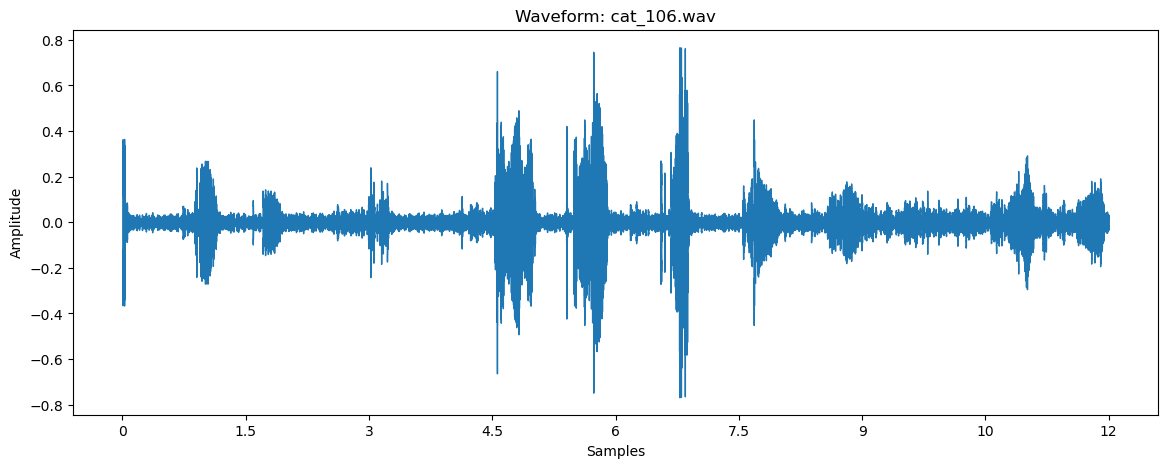

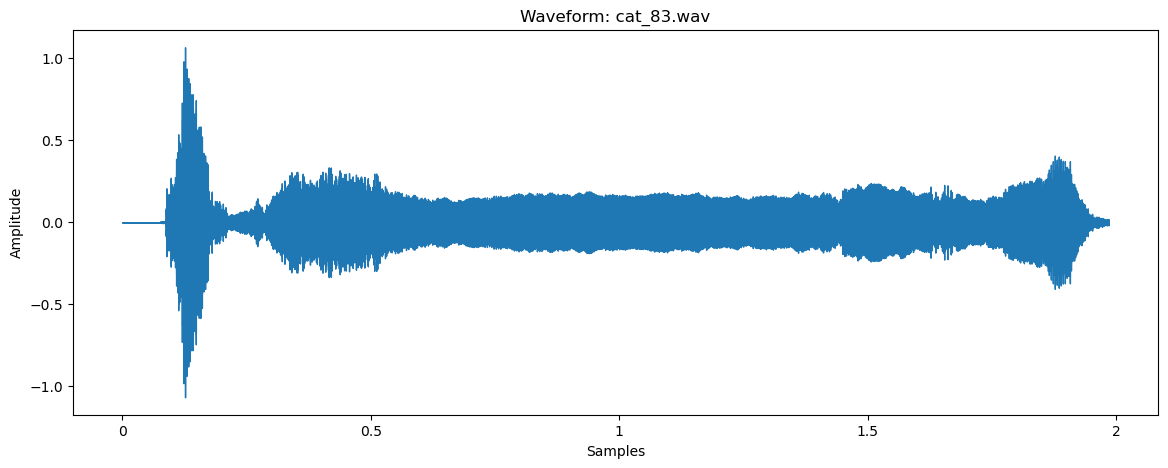

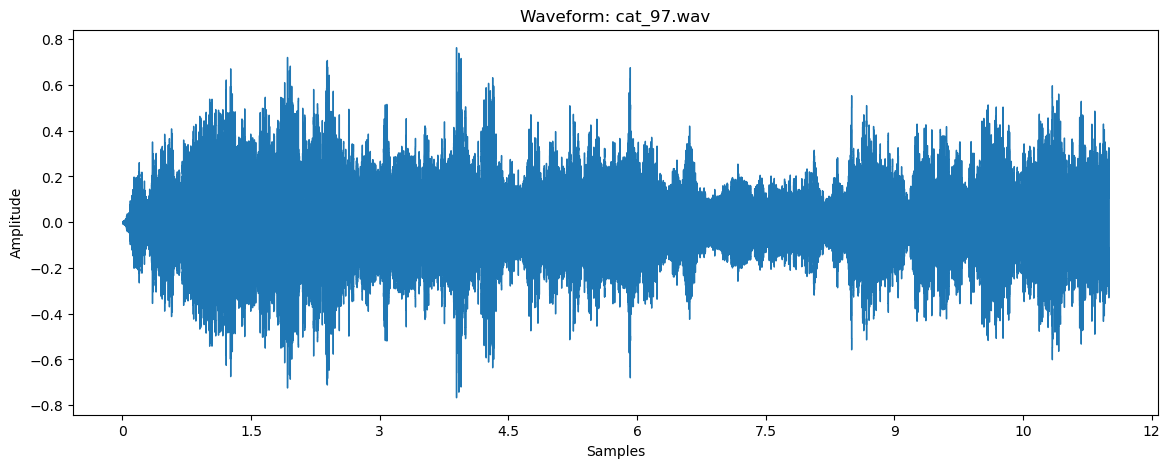

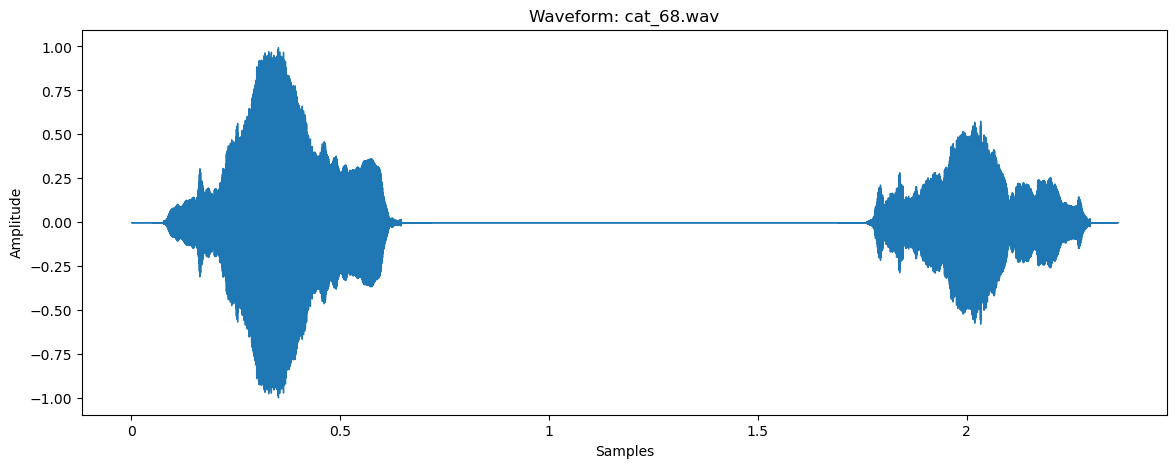

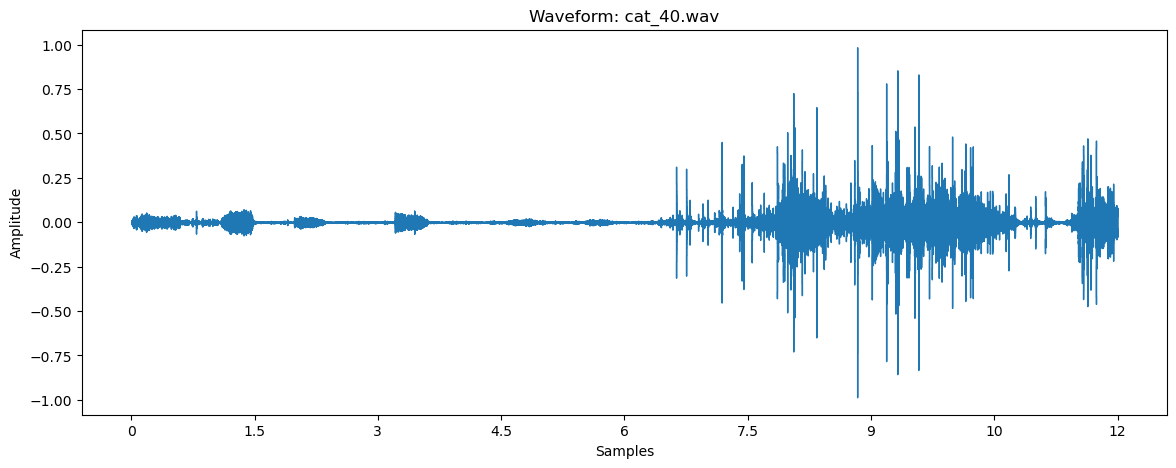

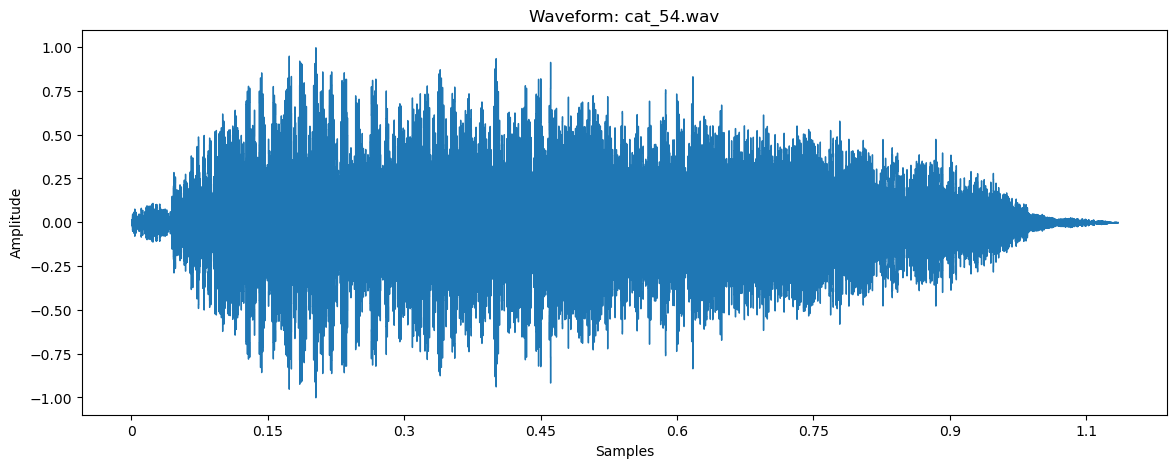

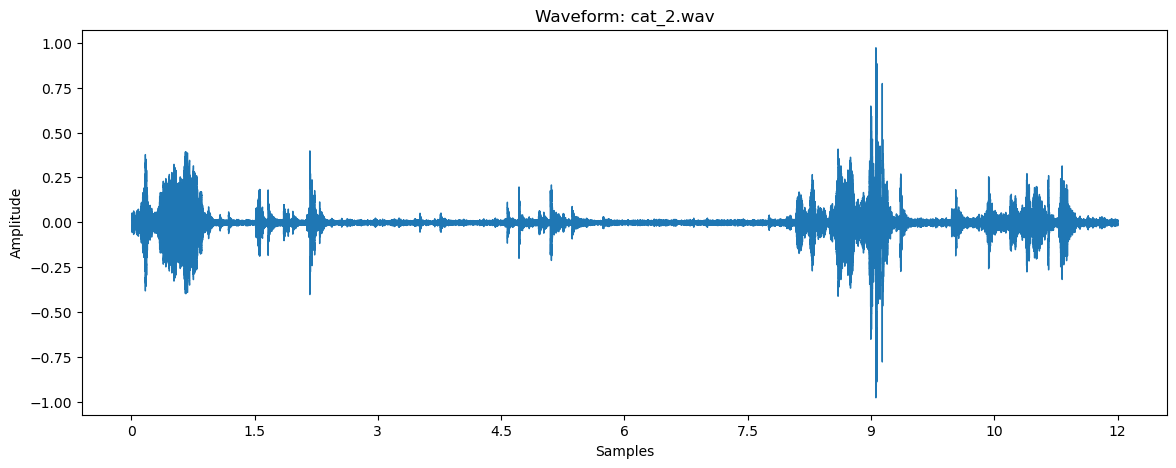

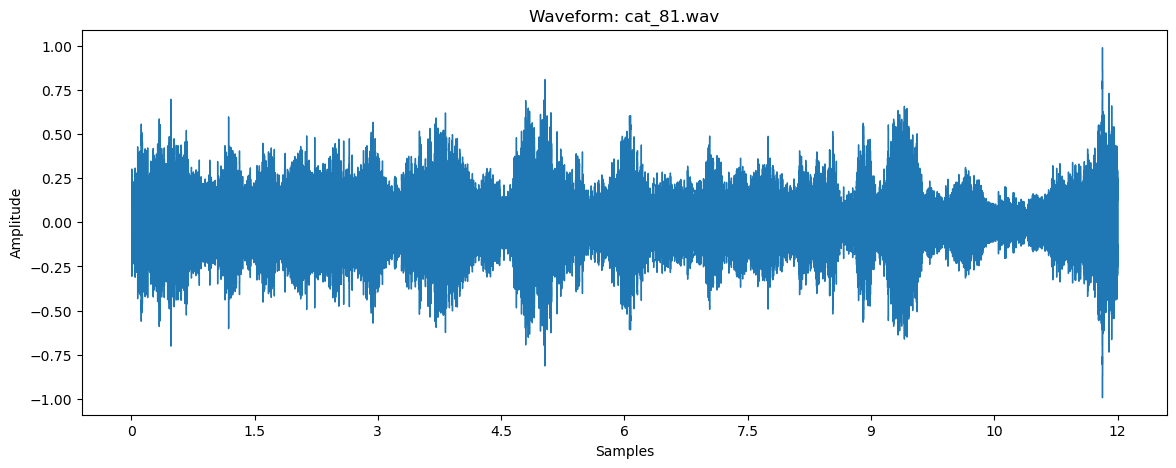

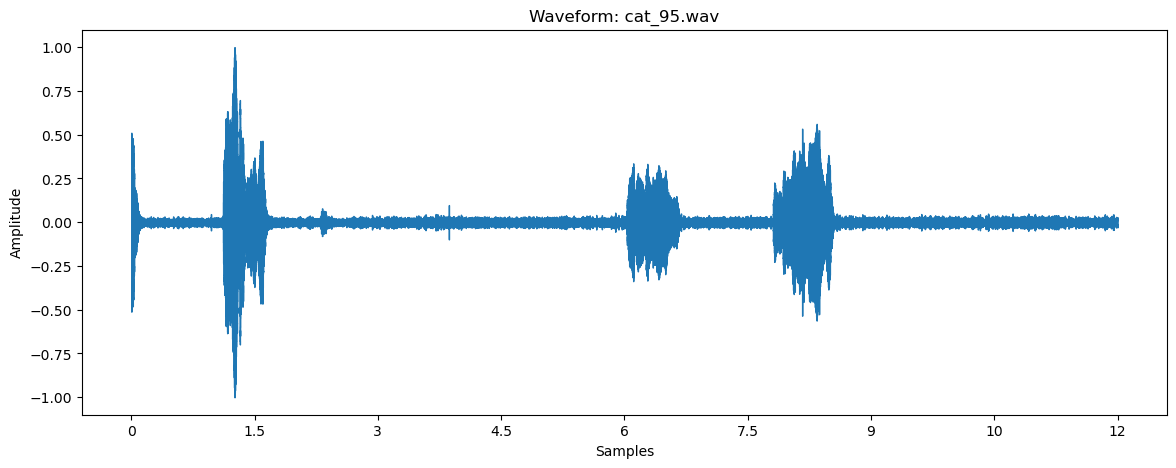

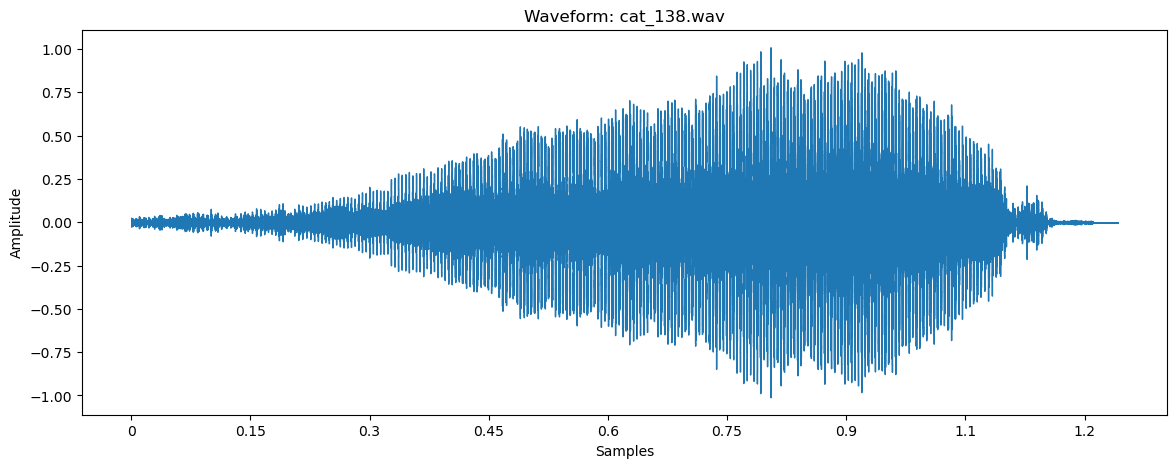

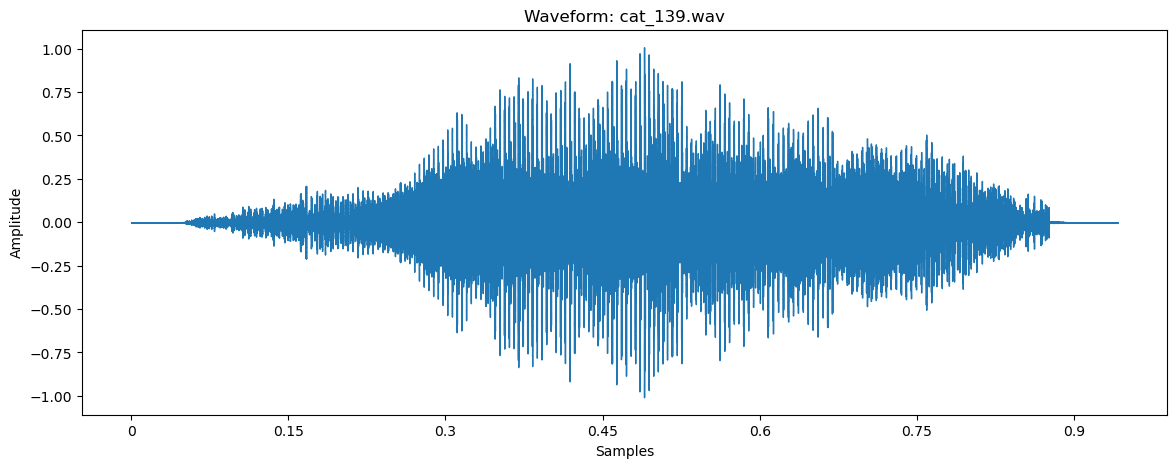

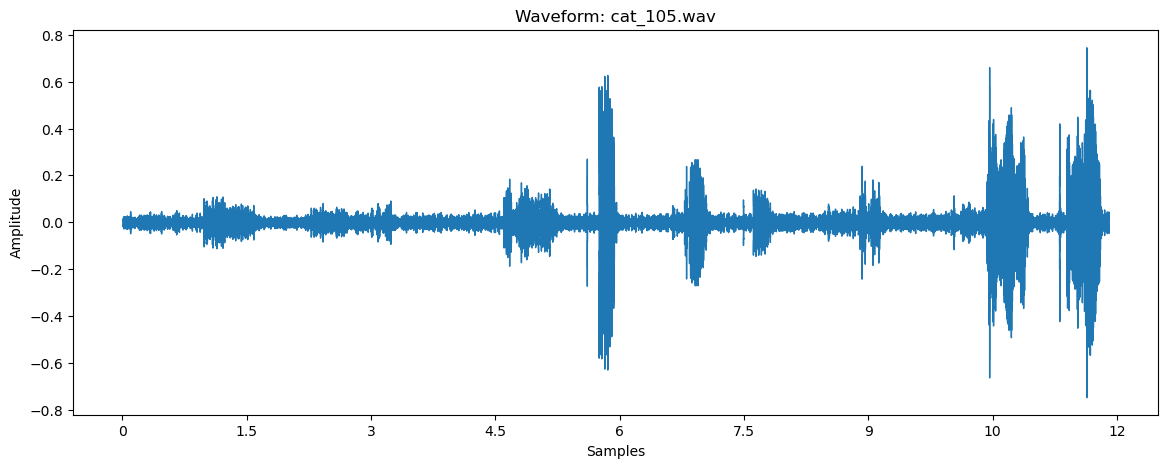

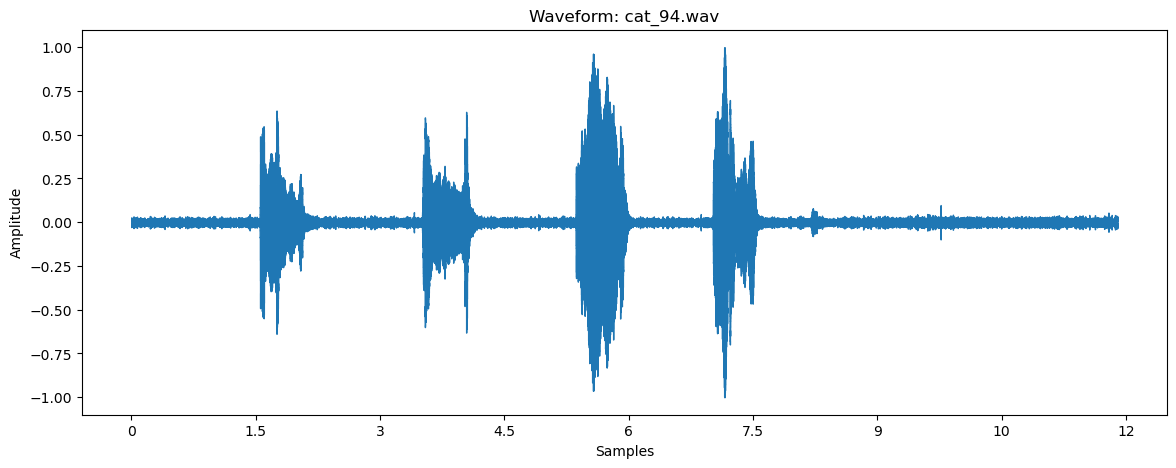

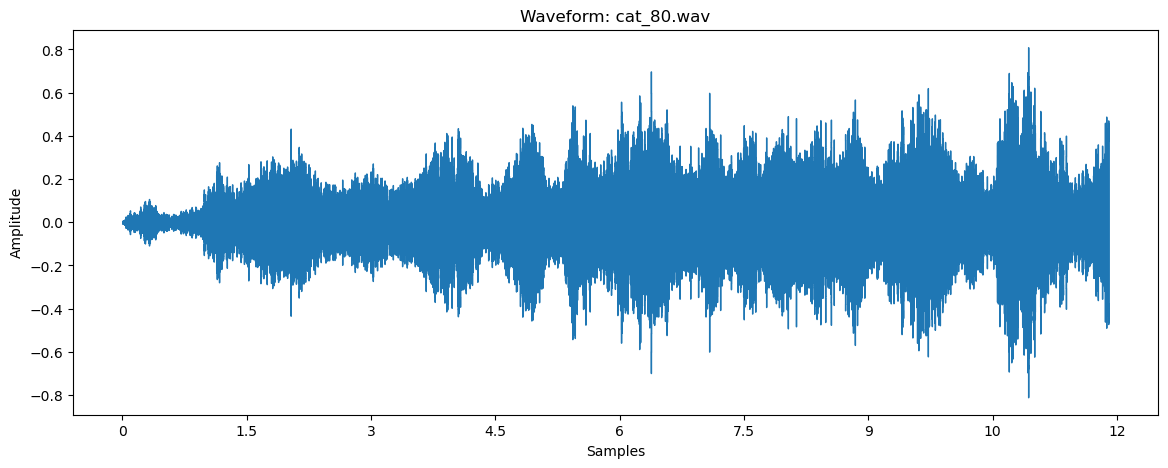

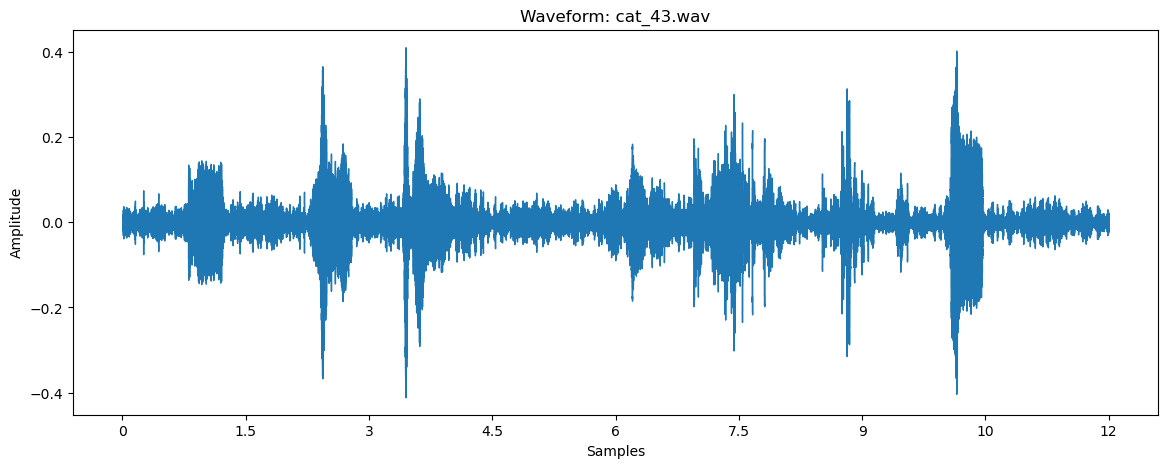

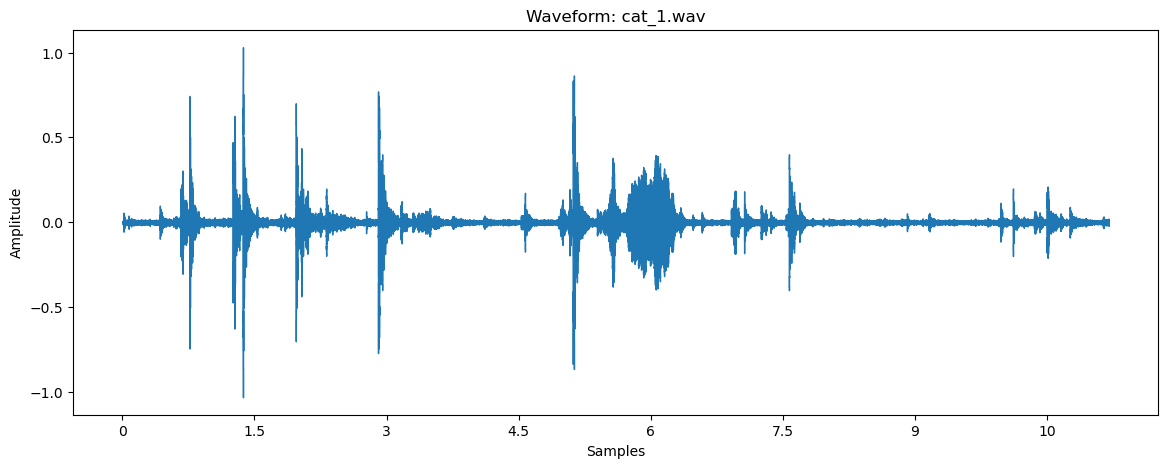

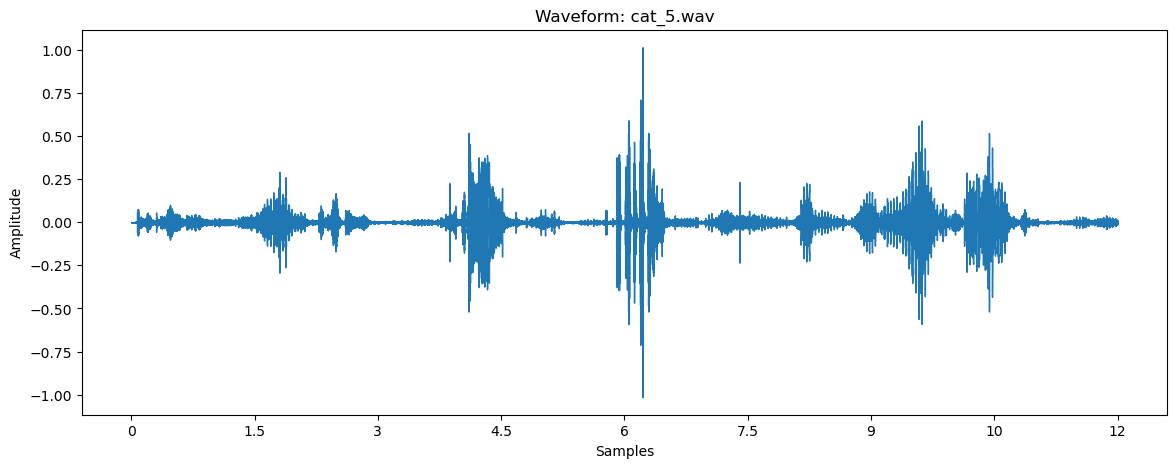

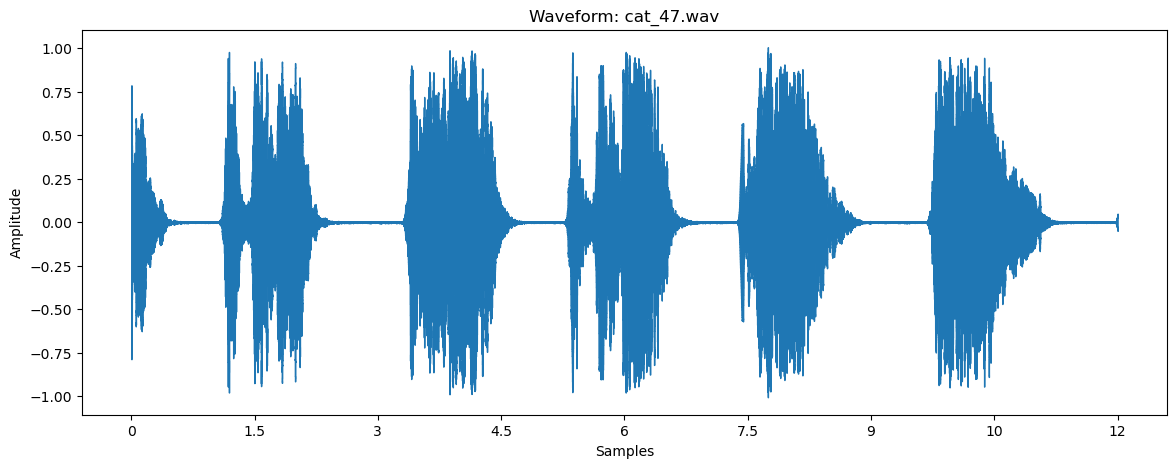

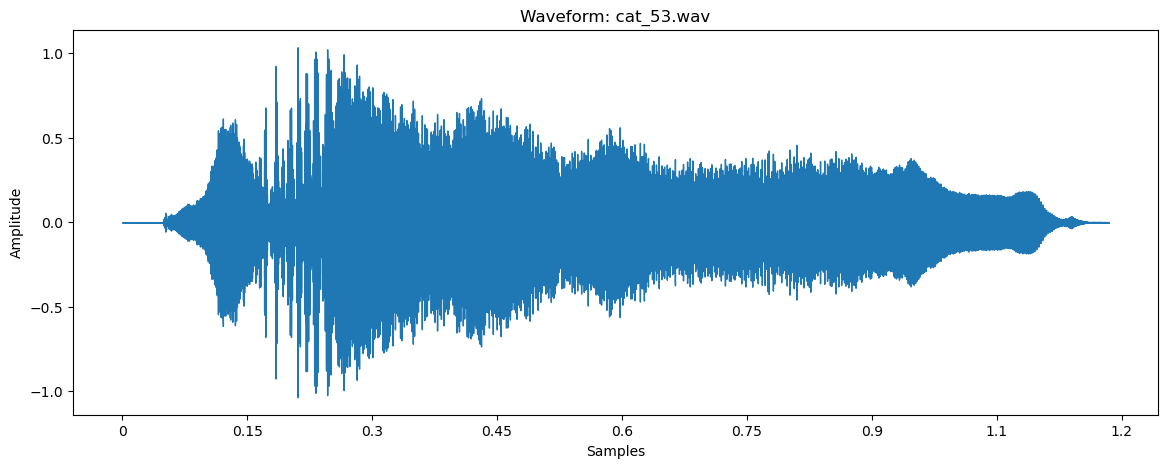

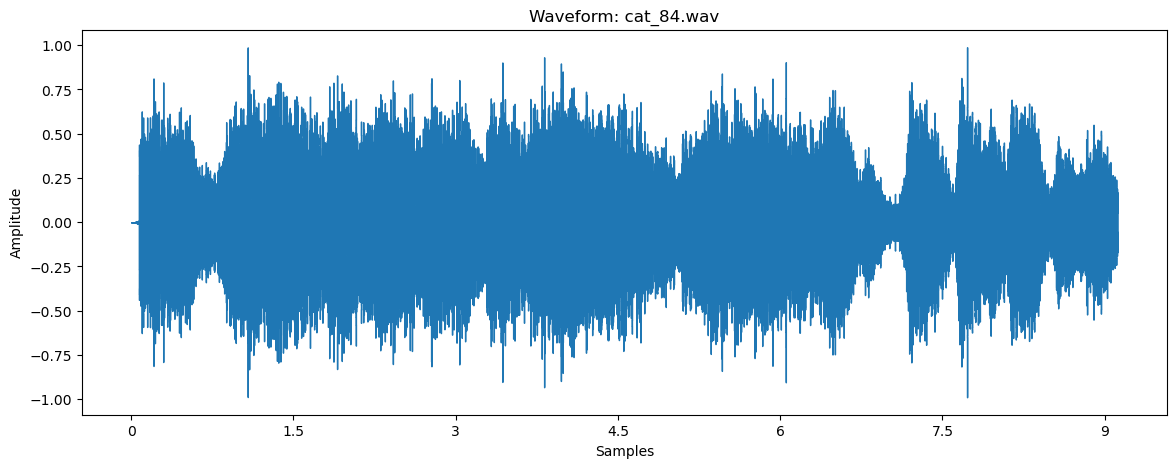

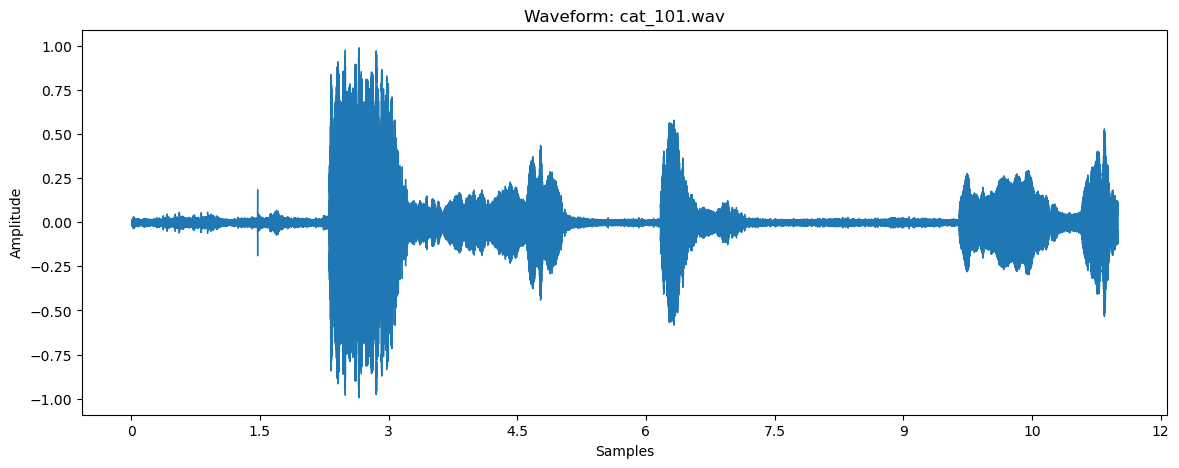

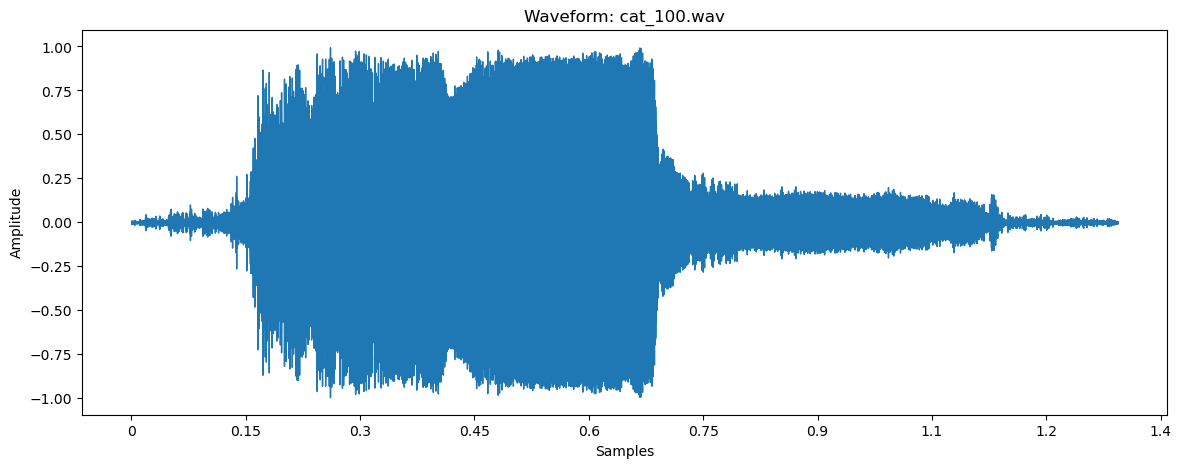

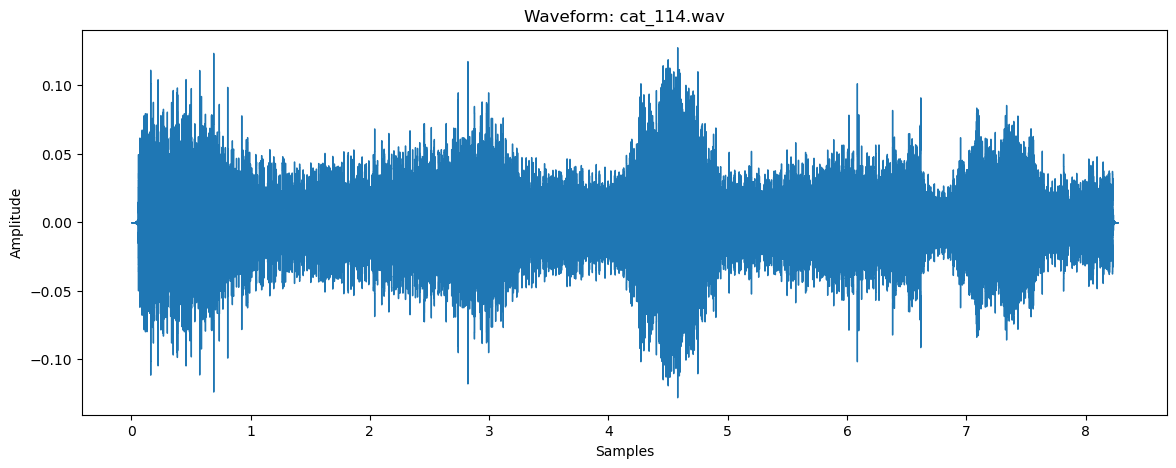

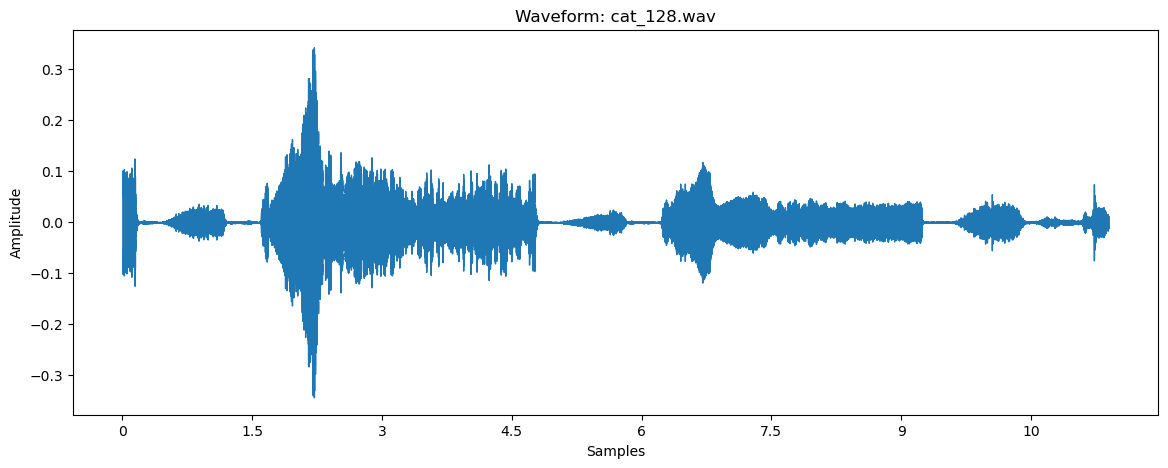

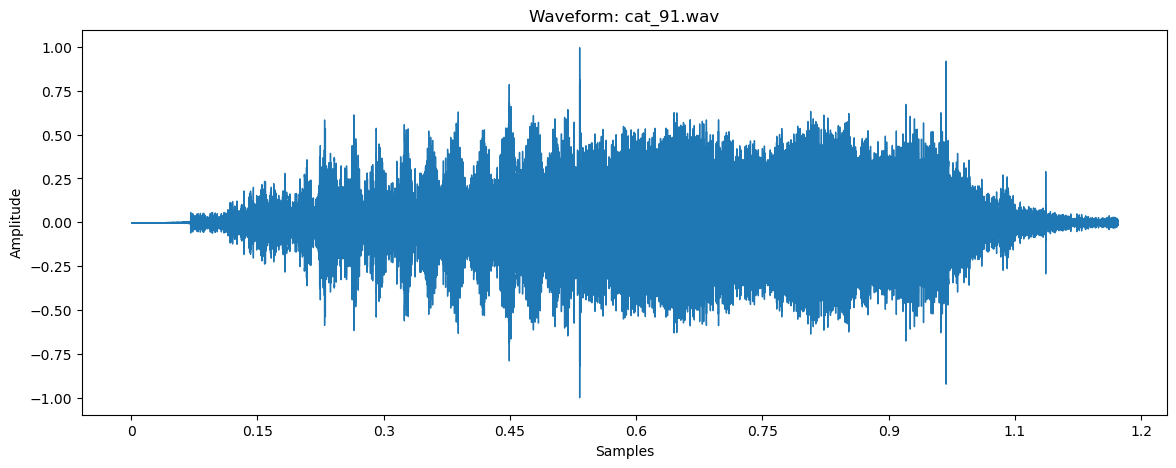

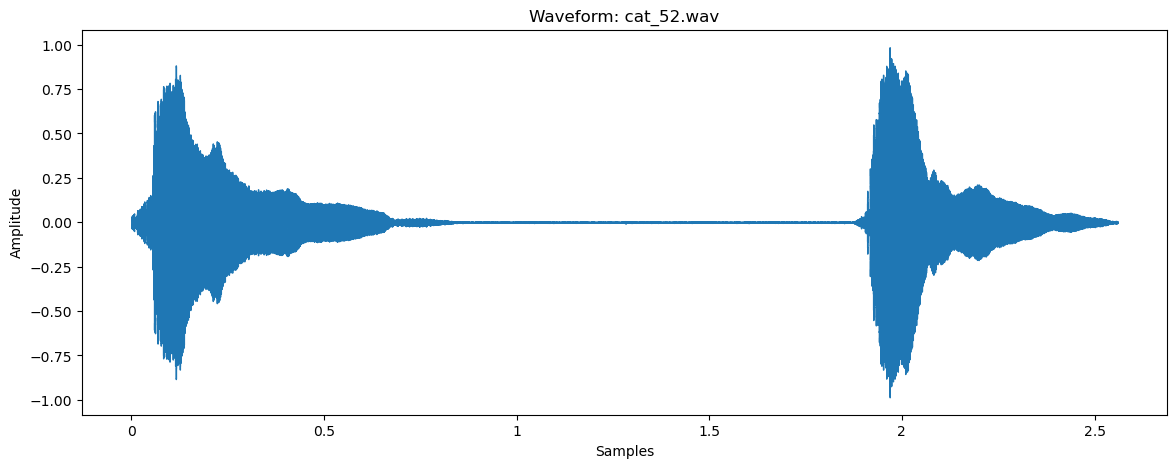

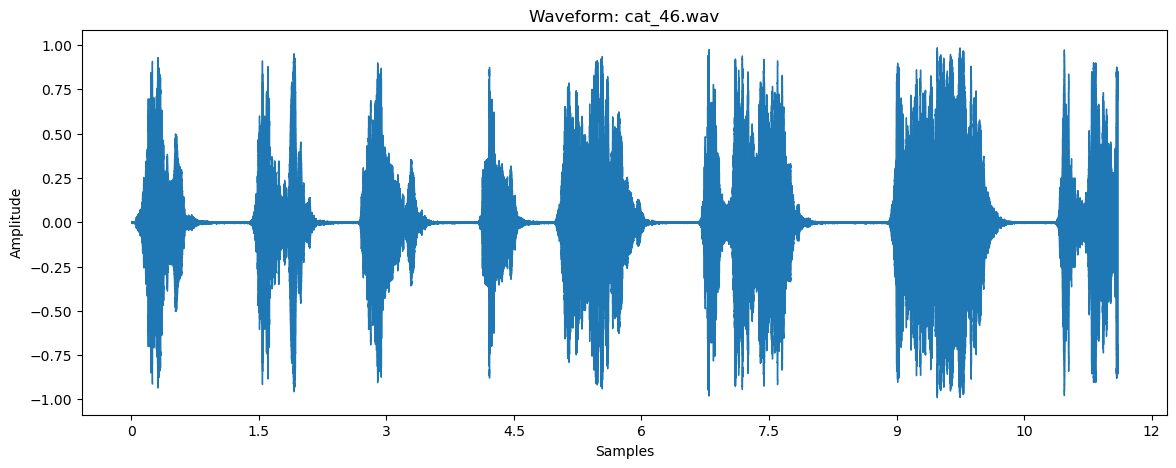

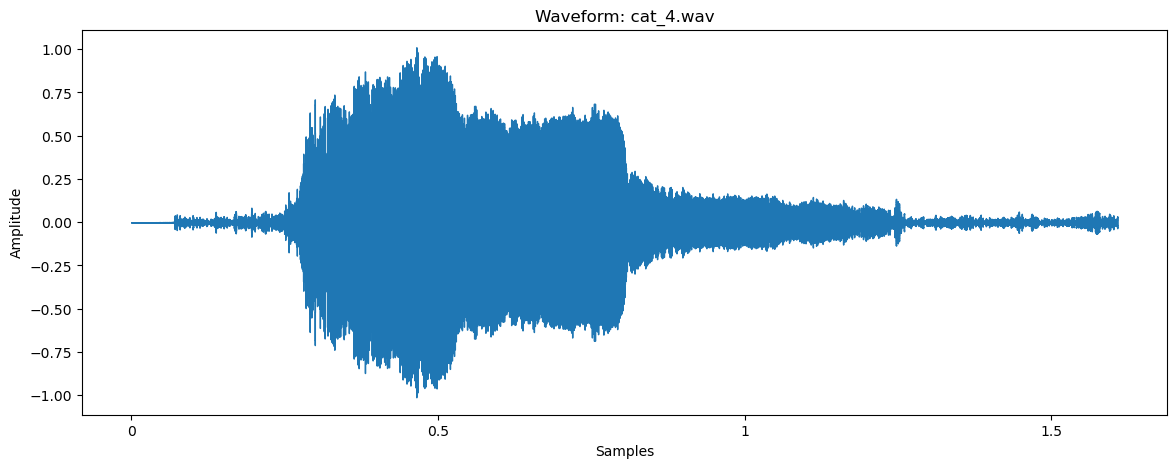

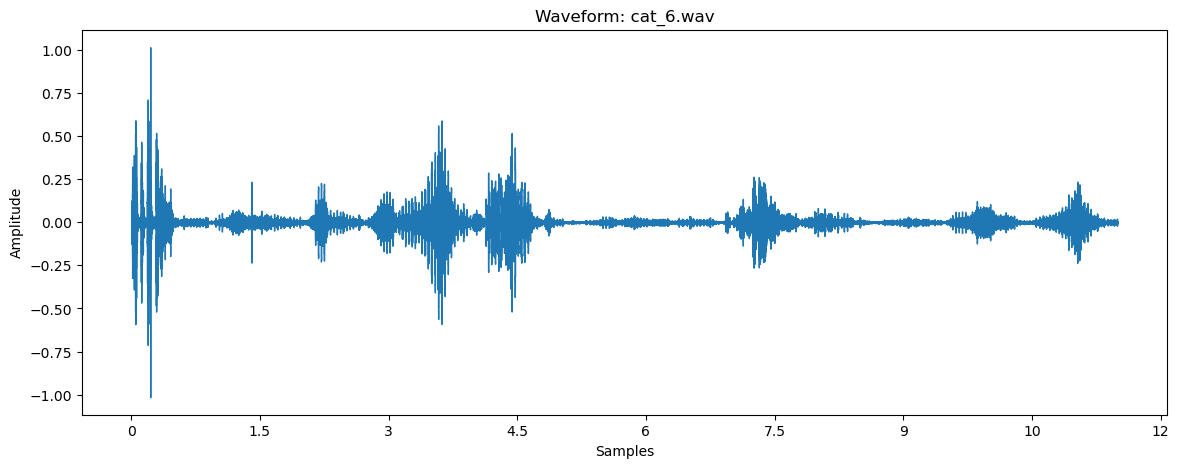

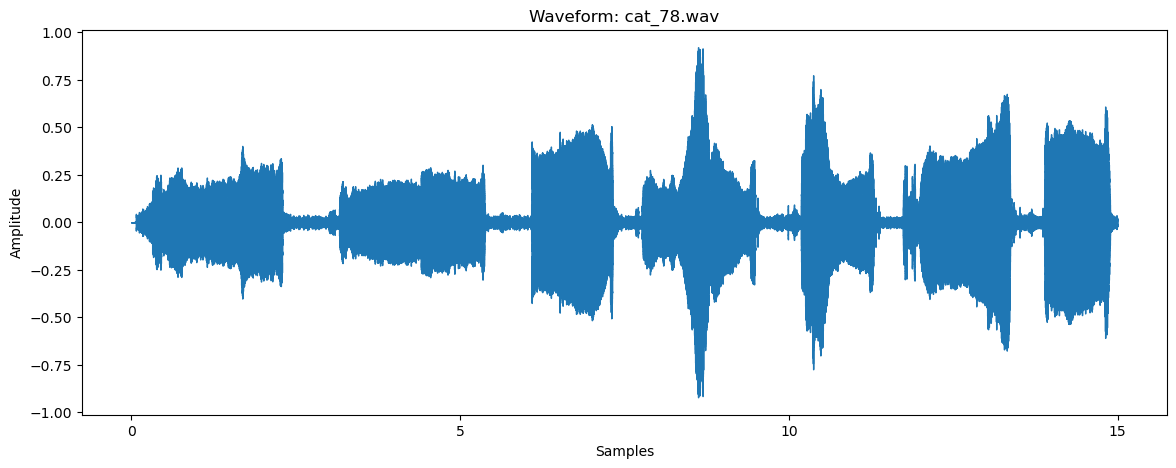

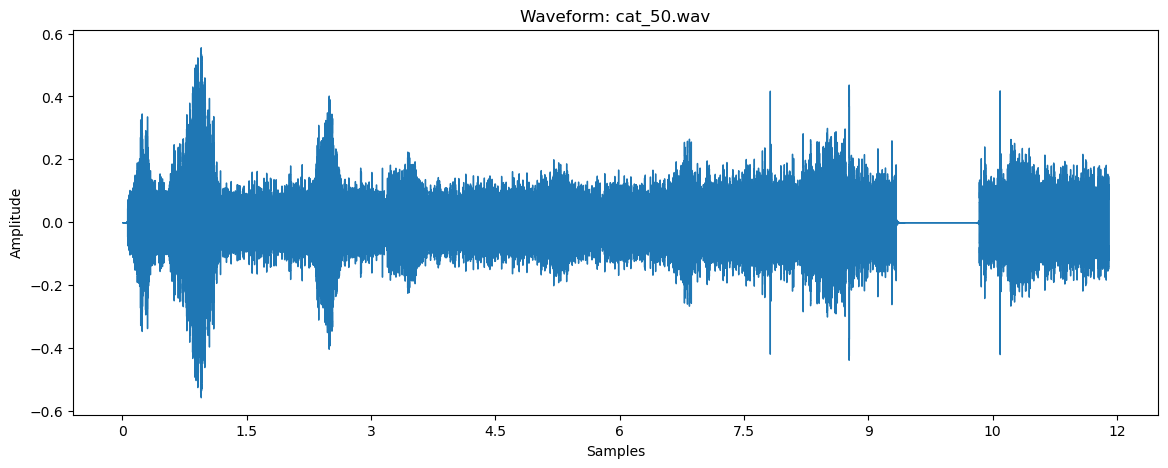

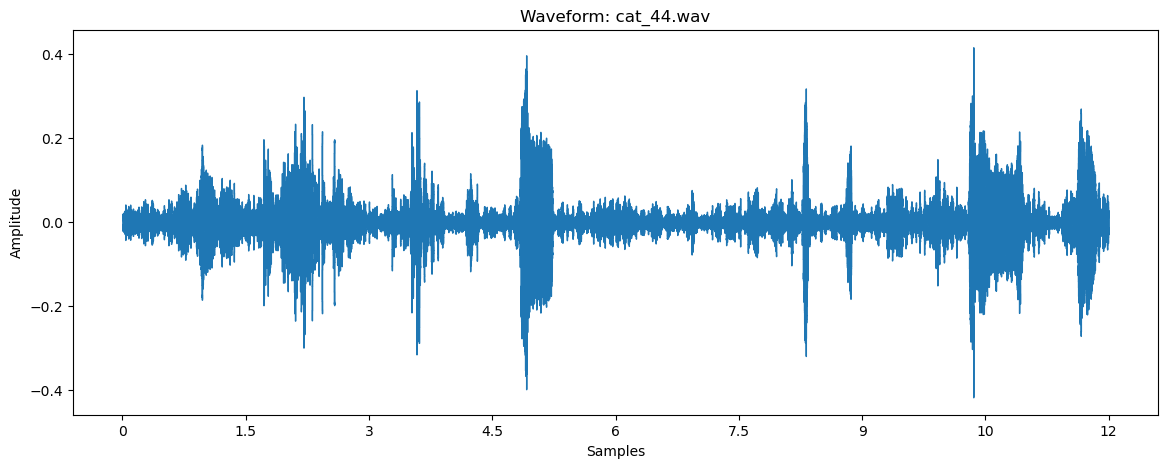

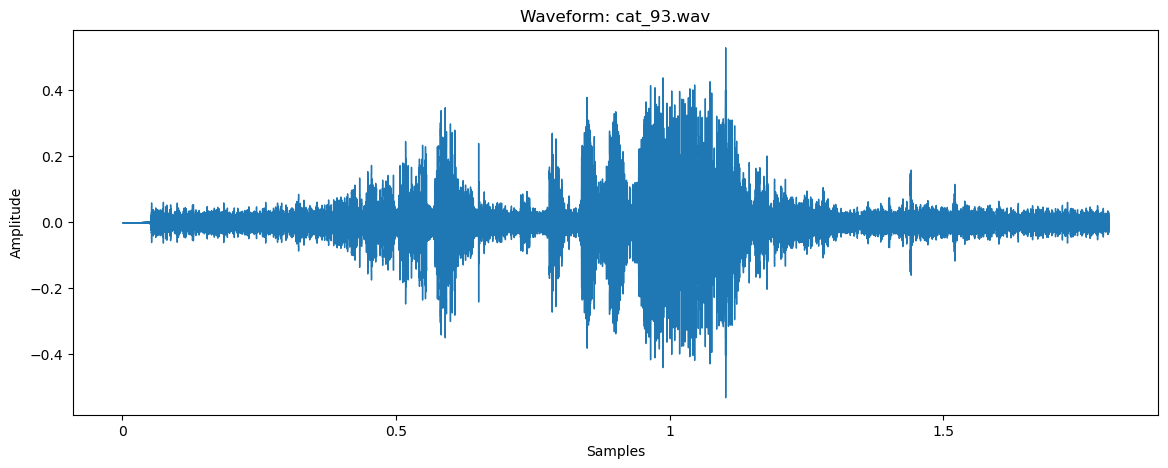

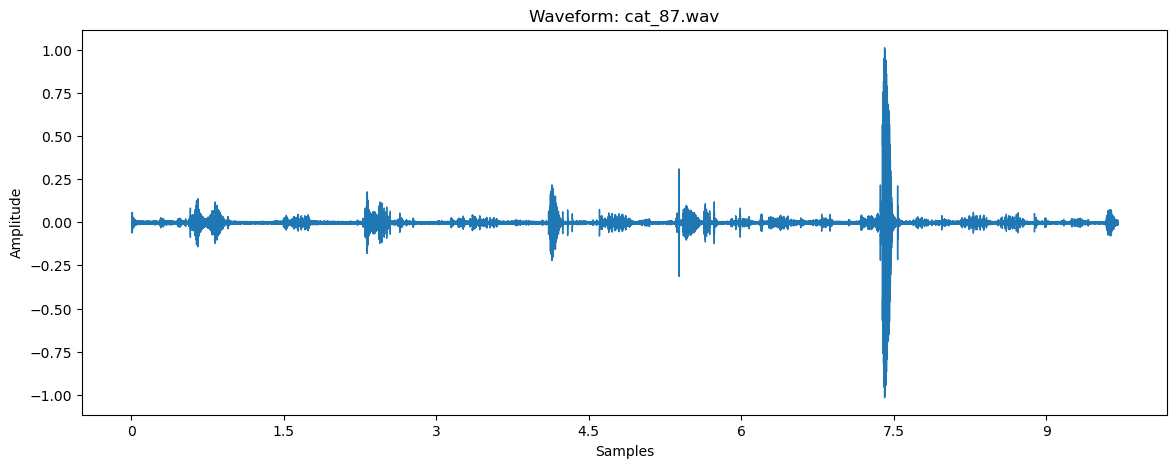

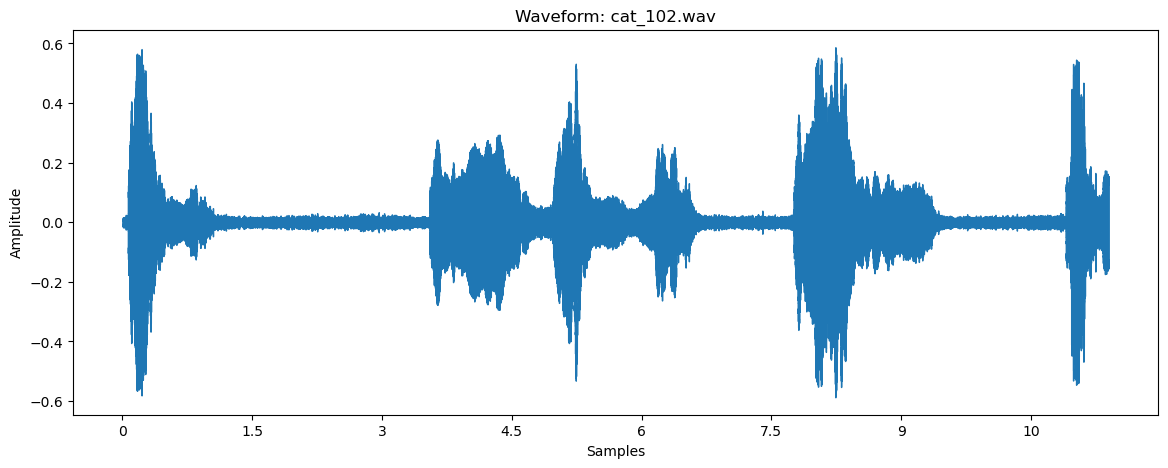

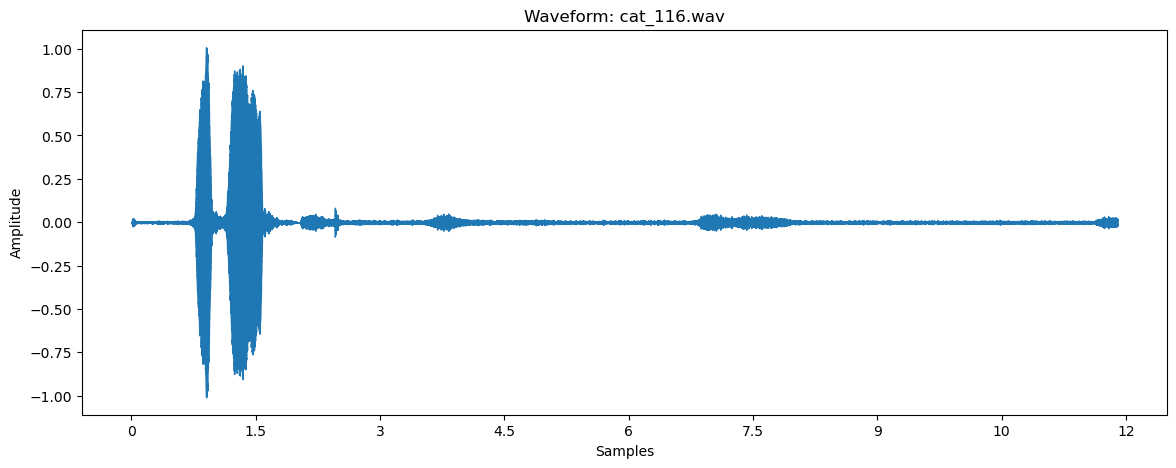

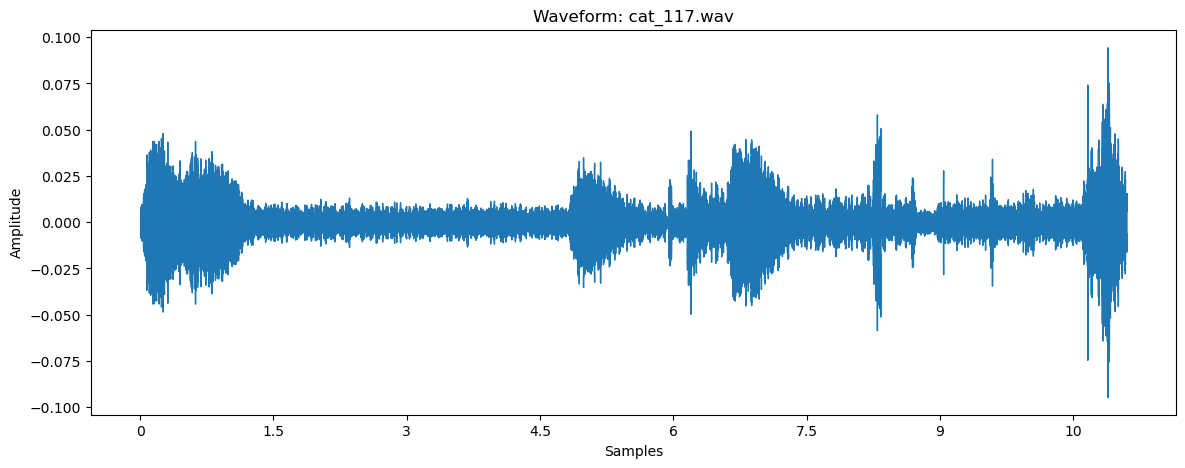

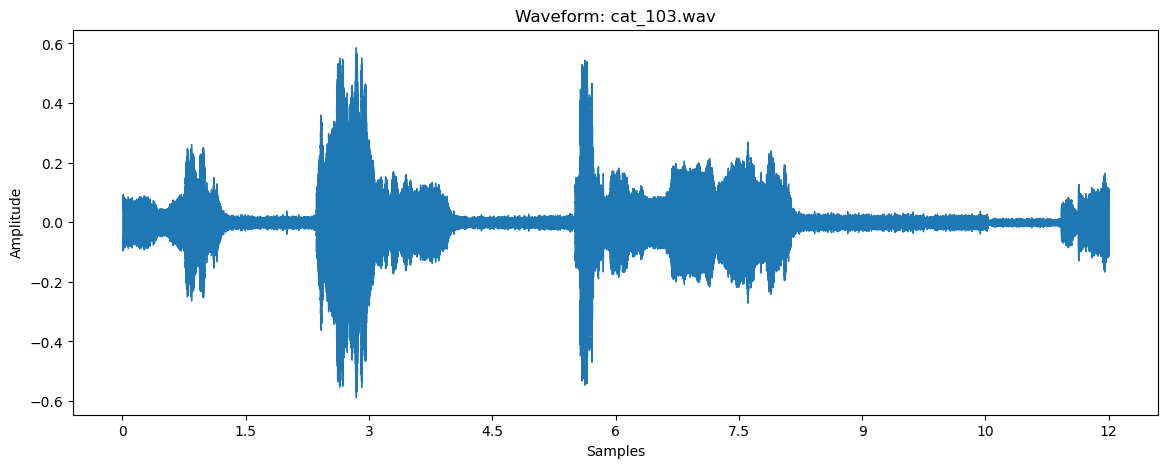

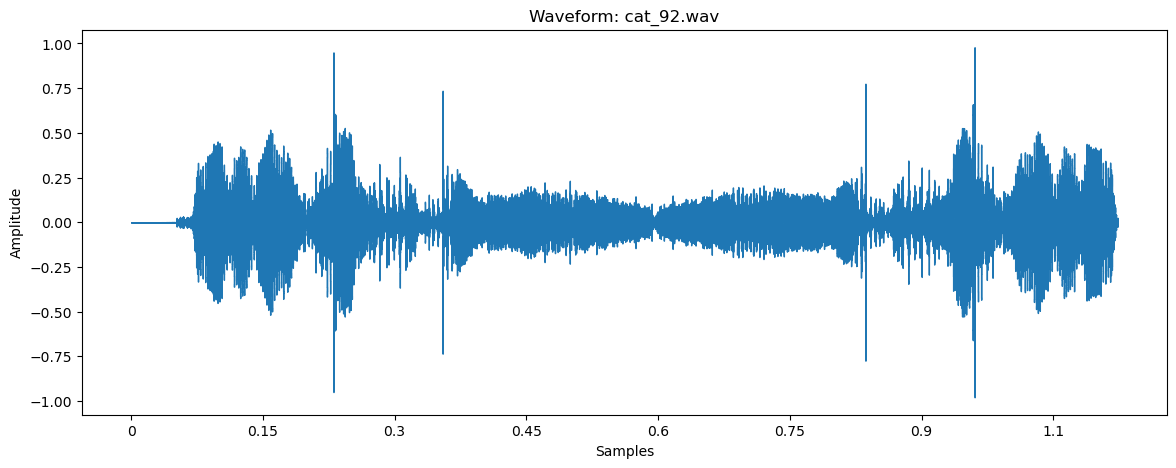

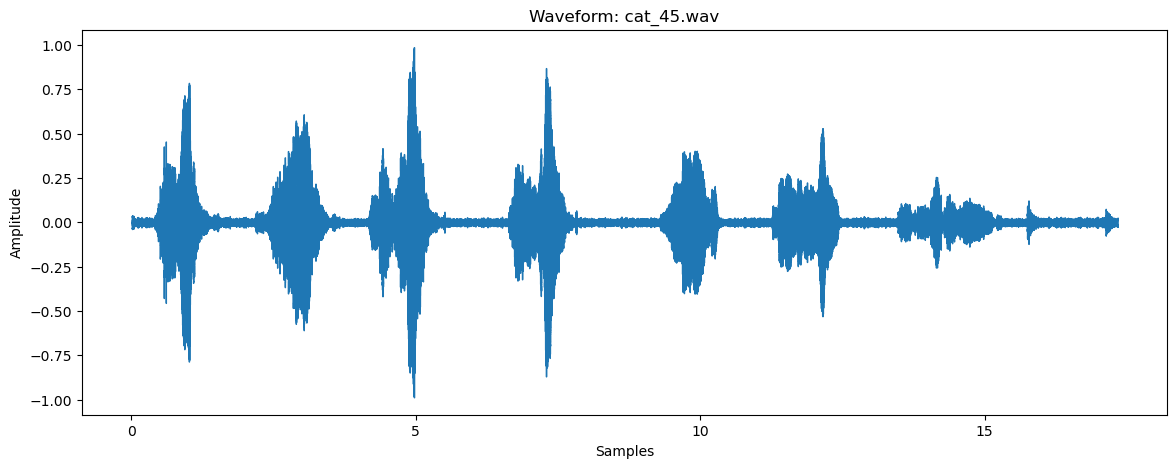

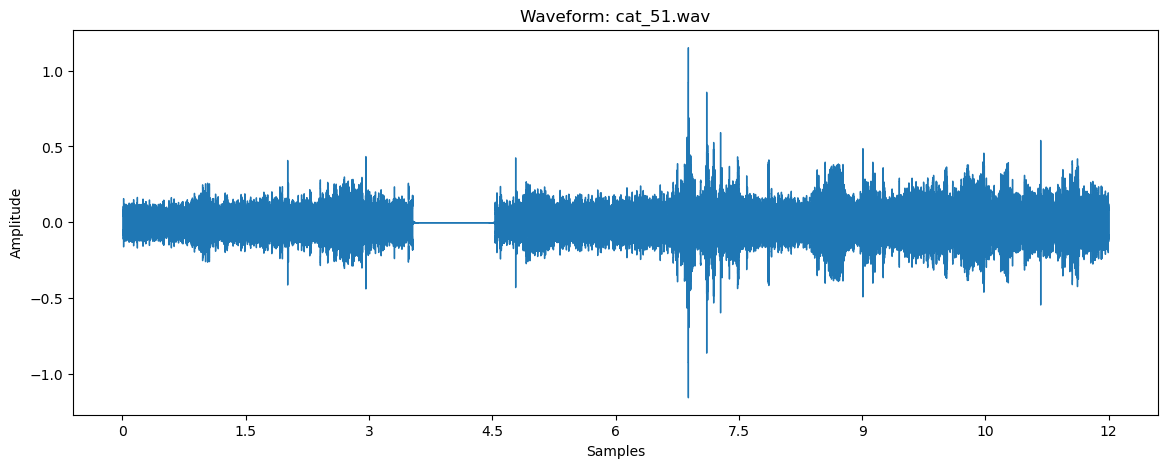

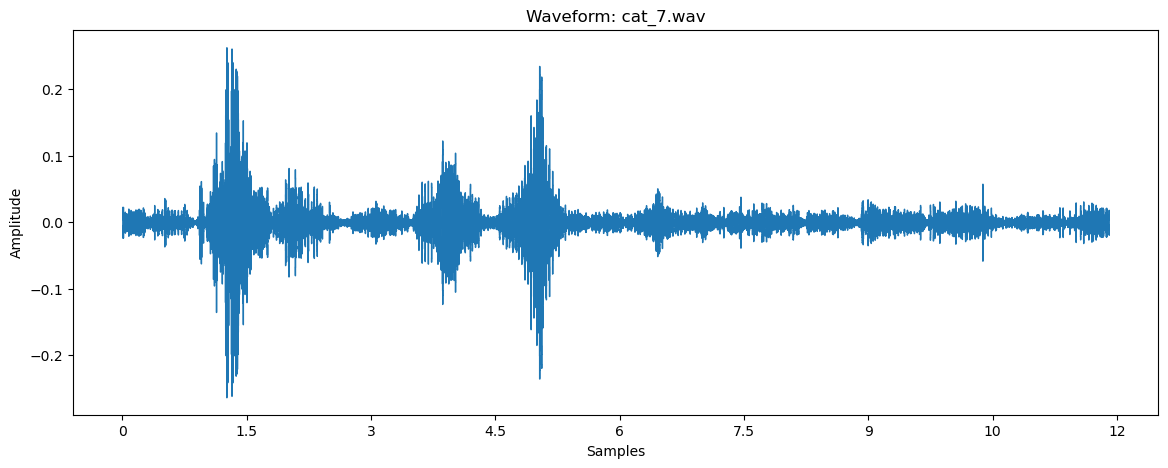

In [781]:
path_cats='/Users/zishanvisram/Documents/DATA608/Group_Project/cats_dogs/train/cat/'
for filename in os.listdir(path_cats):    
    audio_path_cats = os.path.join(path_cats, filename)
    x, sr = librosa.load(audio_path_cats)
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    plt.title(f'Waveform: {filename}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

In [782]:
audio_data2='/Users/zishanvisram/Documents/DATA608/Group_Project/cats_dogs/train/cat/cat_74.wav'

x , sr = librosa.load(audio_data2)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(136710,) 22050


In [783]:
librosa.load(audio_data, sr=22050)
import IPython.display as ipd
ipd.Audio(audio_data2)

---
### END

---


##### Other features we can explore
- Frequency, Period etc

In [784]:
amplitude = np.max(np.abs(x))

# Calculate period and frequency
period = 1 / sr * x.shape[0]
frequency = 1 / period

In [785]:
print(amplitude,period,frequency)

0.77114177 6.2 0.16129032258064516


---

### Creating functions to run the script for all the audio files for the train data for Dogs

In [786]:
#Importing necessary libraries
import csv
from scipy.io import wavfile
import numpy as np


In [787]:
import os
import csv
import librosa
import numpy as np

directory_path = '/Users/zishanvisram/Documents/DATA608/Group_Project/cats_dogs/train/dog/'
csv_file = '/Users/zishanvisram/Documents/DATA608/Group_Project/dog_train.csv'

def process_audio_files(directory_path):
    audio_data_list = []
    sample_rate_list = []
    X_list = []
    Xdb_list = []

    for filename in os.listdir(directory_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory_path, filename)

            # Read the audio file
            x, sr = librosa.load(file_path)

            # Compute Short-Time Fourier Transform (STFT)
            X = librosa.stft(x)
            Xdb = librosa.amplitude_to_db(abs(X))

            # Append the data to the lists
            audio_data_list.append(x)
            sample_rate_list.append(sr)
            X_list.append(X)
            Xdb_list.append(Xdb)

    return audio_data_list, sample_rate_list, X_list, Xdb_list

def create_csv_from_data(csv_file_path, audio_data, sample_rate, X, Xdb):
    # Open the CSV file in write mode
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Audio_Data', 'Sample_Rate', 'X', 'Xdb'])

        # Loop over the data and write each row to the CSV file
        for i in range(len(audio_data)):
            writer.writerow([audio_data[i], sample_rate[i], np.array2string(X[i]), np.array2string(Xdb[i])])

    print(f"CSV file '{csv_file_path}' created successfully.")

# Call the function to process the audio files and get the lists
audio_data_list, sample_rate_list, X_list, Xdb_list = process_audio_files(directory_path)

# Create the CSV file using the data from the lists
create_csv_from_data(csv_file, audio_data_list, sample_rate_list, X_list, Xdb_list)
print()


CSV file '/Users/zishanvisram/Documents/DATA608/Group_Project/dog_train.csv' created successfully.



In [788]:
df=pd.read_csv(csv_file)
df.dtypes

Audio_Data     object
Sample_Rate     int64
X              object
Xdb            object
dtype: object

In [789]:
df.head()

Audio_Data  Sample_Rate  \
0  [-8.7480879e-07 -1.9708292e-05 -5.4359229e-05 ...        22050   
1  [-1.9376983e-05 -3.2515894e-05 -1.4553998e-04 ...        22050   
2  [-4.7158796e-06 -1.8934237e-05 -4.1226725e-05 ...        22050   
3  [-2.6166399e-05 -8.3831274e-06 -5.1251623e-06 ...        22050   
4  [-2.4588617e-06 -2.9940798e-05 -1.3592803e-05 ...        22050   

                                                   X  \
0  [[-2.4526505e-01+0.0000000e+00j -2.7334437e-01...   
1  [[-6.16868734e-01+0.0000000e+00j -4.20381165e+...   
2  [[-1.37327105e-01+0.0000000e+00j -1.50571012e+...   
3  [[-3.2709506e-01+0.0000000e+00j -3.3056908e+00...   
4  [[-3.3524713e-01+0.0000000e+00j -2.9537201e+00...   

                                                 Xdb  
0  [[-12.207287   -11.265798   -16.966614   ...  ...  
1  [[ -4.1961446  12.472864   17.616909  ... -17....  
2  [[-17.244875     3.5548277   13.672882   ...  ...  
3  [[ -9.70652    10.385244   15.972062  ...   8....  
4  [[ -9.492699    9.407387   15.860746  ...  -5....

In [790]:
#This function is taking the numpy array generated from the audio files and coverting them into melspectogram

def convert_into_melspec(audio_data_list,sample_rate_list):
    melspec = []
    for x, sr in zip(audio_data_list, sample_rate_list):
        melspec.append(librosa.feature.melspectrogram(y=x, sr=sr))
    return melspec

melspec = convert_into_melspec(audio_data_list, sample_rate_list)


In [791]:
# This function is taking the numpy array from melspec and converting them into MFCC values


def convert_into_MFCC(melspec):
    mfcc = []
    for mel_spectogram in melspec:
        mfcc.append(librosa.feature.mfcc(S=librosa.power_to_db(mel_spectogram)))
    return mfcc

# Assuming you have melspec defined and it contains valid mel spectrograms
mfcc = convert_into_MFCC(melspec)
display(mfcc)

[array([[-439.08725  , -403.04947  , -381.6974   , ..., -337.92935  ,
         -338.55743  , -361.2715   ],
        [  84.735825 ,  117.86554  ,  127.39597  , ...,  126.156075 ,
          134.85324  ,  125.04798  ],
        [  53.24374  ,   59.11757  ,   52.544647 , ...,  -25.10403  ,
           -7.658882 ,    9.088362 ],
        ...,
        [ -13.165537 ,  -12.927906 ,   -9.103836 , ...,   12.275377 ,
           16.160732 ,   10.180981 ],
        [ -12.190731 ,  -17.936752 ,  -22.484207 , ...,    6.66271  ,
            8.255489 ,    4.5245643],
        [  -7.5104923,  -13.075199 ,  -18.959566 , ...,   11.525448 ,
            4.3725605,    2.1659458]], dtype=float32),
 array([[-236.66399  , -128.87619  ,  -73.35003  , ..., -320.14172  ,
         -353.12503  , -392.96393  ],
        [ 135.43665  ,  150.27383  ,  151.79906  , ...,  145.37515  ,
          126.356735 ,  101.08646  ],
        [ -69.495575 ,  -96.78221  , -109.06532  , ...,   20.288689 ,
           38.074055 ,   48.41677  ]

#### Statistics for MFCC

In [792]:
def mfcc_stats(mfcc):
    data_mfccs = {}
    for i, mfcc_coef in enumerate(mfcc):
        mfcc_mean = np.mean(mfcc_coef, axis=1)
        mfcc_variance = np.var(mfcc_coef, axis=1)
        mfcc_percentile_25 = np.percentile(mfcc_coef, 25, axis=1)
        mfcc_percentile_75 = np.percentile(mfcc_coef, 75, axis=1)

        data_mfccs[f'MFCC_Mean_{i+1}'] = mfcc_mean
        data_mfccs[f'MFCC_Variance_{i+1}'] = mfcc_variance
        data_mfccs[f'MFCC_Percentile_25_{i+1}'] = mfcc_percentile_25
        data_mfccs[f'MFCC_Percentile_75_{i+1}'] = mfcc_percentile_75

    df_mfcc_stats = pd.DataFrame(data_mfccs)
    return df_mfcc_stats

# Assuming you have mfcc as a list of arrays with shape (20, num_coefficients)
mfcc_stats_result = mfcc_stats(mfcc)




In [793]:
mfcc_stats_result=mfcc_stats_result.rename_axis('mfcc coef')

In [794]:
mfcc_stats_result.reset_index(inplace=True)

In [795]:
mfcc_stats_result

mfcc coef  MFCC_Mean_1  MFCC_Variance_1  MFCC_Percentile_25_1  \
0           0  -352.453949      3669.351562           -385.788284   
1           1    95.861717       807.095764             78.291676   
2           2   -27.758116       687.402344            -36.331272   
3           3   -24.624397       170.755875            -31.526836   
4           4   -16.302792       100.705177            -24.035234   
5           5   -21.029940        34.950352            -24.339119   
6           6   -14.354536        43.438522            -17.371498   
7           7    -4.857093        46.633640             -9.394043   
8           8    -4.724533       108.112892             -9.642845   
9           9     8.498775       155.584686              0.851327   
10         10     7.243243       138.103363              0.663609   
11         11     7.421973       270.463531             -2.214916   
12         12    -3.917628       456.305267            -18.456701   
13         13    10.464774       263.355713             -1.370784   
14         14    13.745323       164.312973              9.222245   
15         15   -29.337160       103.214844            -35.157974   
16         16   -22.341623       157.613937            -31.519864   
17         17     0.264904       133.432358             -9.407989   
18         18    -0.916747       278.385681            -15.392413   
19         19     5.313402       492.031921            -14.041426   

    MFCC_Percentile_75_1  MFCC_Mean_2  MFCC_Variance_2  MFCC_Percentile_25_2  \
0            -351.112686  -282.026794      6479.795410           -343.521019   
1             104.518913   135.318069       509.515686            117.588474   
2             -16.953230   -27.079821      1829.109375            -46.928082   
3             -18.098675   -34.388519       219.982666            -47.007440   
4              -9.279054   -14.602273       108.695076            -24.759589   
5             -16.953858   -14.500647       258.381378            -26.437638   
6              -9.679577   -15.754220       134.836853            -23.842014   
7               0.129363    -7.472414       292.022949            -19.063906   
8               1.468902   -13.806647       168.151764            -20.941133   
9              10.641772     2.681745       117.616264             -3.089267   
10              9.110816     7.951677        76.225868              2.024793   
11              9.966516    -3.038525        48.322300             -7.161101   
12              4.988891   -12.561716       210.205948            -25.965810   
13             15.434714    -3.098943        99.179459             -7.419891   
14             20.046913     8.052478       288.561096             -3.762216   
15            -23.916057    -4.911968        33.248978             -7.949404   
16            -12.443184   -10.635389       169.419785            -18.624158   
17              6.908472   -12.173916        40.893658            -16.067747   
18              8.745074    -5.792004       184.818237            -15.696270   
19             23.958312    -5.824952       147.947159            -15.819587   

    MFCC_Percentile_75_2  MFCC_Mean_3  ...  MFCC_Percentile_25_83  \
0            -264.832458  -233.220306  ...            -330.248566   
1             149.694794   178.710632  ...             106.148117   
2              -1.939805   -65.842369  ...             -56.626270   
3             -22.491692   -27.797035  ...             -42.669083   
4              -5.672317    -7.884960  ...             -77.089890   
5              -3.256213   -13.906724  ...              -2.884304   
6              -7.240511   -27.909788  ...             -39.176941   
7               1.471488     1.583530  ...               0.661792   
8              -6.845785   -36.102859  ...               5.466873   
9               5.225380     9.692238  ...              -3.530507   
10             15.307115     6.029252  ...              -2.559963   
11             -0.179443    -8.298835  ...   

In [796]:
%%time

#Functiom will compute the Chromograph values of the audio files

def convert_into_chroma(audio_data_list,sample_rate_list):
    chroma = []
    for x, sr in zip(audio_data_list, sample_rate_list):
        chroma.append(librosa.feature.chroma_cqt(y=x, sr=sr))
    return chroma

chroma = convert_into_chroma(audio_data_list, sample_rate_list)
print()


CPU times: user 32.7 s, sys: 12.5 s, total: 45.2 s
Wall time: 6.78 s


In [797]:
chroma

[array([[0.7890676 , 0.7008068 , 0.7107699 , ..., 0.06878631, 0.13469242,
         0.26548353],
        [0.8943019 , 0.88804907, 0.90671325, ..., 0.07036746, 0.12342749,
         0.23152842],
        [0.57032263, 0.5537716 , 0.48346755, ..., 0.23790772, 0.24307075,
         0.30891708],
        ...,
        [0.58608866, 0.56058663, 0.548668  , ..., 0.08357129, 0.21802993,
         0.22493806],
        [0.8488794 , 1.        , 1.        , ..., 0.09956174, 0.17691009,
         0.28685412],
        [1.        , 0.9320808 , 0.8801215 , ..., 0.16489016, 0.19054195,
         0.25977126]], dtype=float32),
 array([[0.33069086, 0.18954729, 0.12352424, ..., 0.8677143 , 0.6520969 ,
         0.77594954],
        [0.5563516 , 0.28160843, 0.2023006 , ..., 0.7093043 , 0.51072484,
         0.35851866],
        [0.4742482 , 0.2921261 , 0.3473069 , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [0.35115254, 0.3698975 , 0.27092314, ..., 0.4085349 , 0.27400196,
         0.26032048

#### Statistics for Chroma

In [798]:
def chroma_stats(chroma):
    data_chroma = {}
    for i, chroma_coef in enumerate(chroma):
        chroma_mean = np.mean(chroma_coef, axis=1)
        chroma_variance = np.var(chroma_coef, axis=1)
        chroma_percentile_25 = np.percentile(chroma_coef, 25, axis=1)
        chroma_percentile_75 = np.percentile(chroma_coef, 75, axis=1)

        data_chroma[f'chroma_Mean_{i+1}'] = chroma_mean
        data_chroma[f'chroma_Variance_{i+1}'] = chroma_variance
        data_chroma[f'chroma_Percentile_25_{i+1}'] = chroma_percentile_25
        data_chroma[f'chroma_Percentile_75_{i+1}'] = chroma_percentile_75

    df_chroma_stats = pd.DataFrame(data_chroma)
    return df_chroma_stats

# Assuming you have mfcc as a list of arrays with shape (20, num_coefficients)
chroma_stats_result = chroma_stats(chroma)

In [799]:
chroma_stats_result

chroma_Mean_1  chroma_Variance_1  chroma_Percentile_25_1  \
0        0.147271           0.046657                0.025521   
1        0.293624           0.129507                0.043625   
2        0.337199           0.121959                0.037321   
3        0.355585           0.168029                0.027200   
4        0.343629           0.143290                0.030389   
5        0.288943           0.120923                0.034654   
6        0.192951           0.096667                0.022148   
7        0.085759           0.018400                0.016428   
8        0.110018           0.028102                0.017039   
9        0.088808           0.012264                0.019677   
10       0.110057           0.030557                0.016818   
11       0.187296           0.066945                0.014108   

    chroma_Percentile_75_1  chroma_Mean_2  chroma_Variance_2  \
0                 0.173794       0.332919           0.080640   
1                 0.523133       0.450241           0.119862   
2                 0.573285       0.301270           0.067215   
3                 0.930895       0.361094           0.126690   
4                 0.551950       0.230713           0.054046   
5                 0.422484       0.338481           0.096516   
6                 0.178557       0.461635           0.076833   
7                 0.087337       0.441446           0.138791   
8                 0.112550       0.226345           0.059864   
9                 0.116444       0.221776           0.049599   
10                0.145591       0.251924           0.045821   
11                0.273804       0.289873           0.099137   

    chroma_Percentile_25_2  chroma_Percentile_75_2  chroma_Mean_3  \
0                 0.110626                0.477822       0.414879   
1                 0.151921                0.795393       0.606824   
2                 0.065528                0.490977       0.636955   
3                 0.061240                0.632020       0.775272   
4                 0.060020                0.351334       0.632229   
5                 0.093454                0.457645       0.524874   
6                 0.200303                0.695478       0.427866   
7                 0.123087                0.854922       0.423384   
8                 0.060862                0.306629       0.348627   
9                 0.049457                0.273232       0.381863   
10                0.069010                0.339486       0.353159   
11                0.049709                0.375288       0.486298   

    chroma_Variance_3  ...  chroma_Percentile_25_83  chroma_Percentile_75_83  \
0            0.047241  ...                 0.272810                 0.575406   
1            0.070800  ...                 0.330231                 0.588004   
2            0.046955  ...                 0.364906                 0.842827   
3            0.063852  ...                 0.344185                 0.639007   
4            0.079453  ...                 0.317530                 0.597177   
5            0.078474  ...                 0.321050                 0.674578   
6            0.054702  ...                 0.338417                 0.644881   
7            0.063726  ...                 0.424102                 0.777831   
8            0.045103  ...                 0.449034                 0.797831   
9            0.052116  ...                 0.443475                 0.944932   
10           0.039842  ...                 0.368343                 0.719955   
11           0.082566  ...                 0.427048                 1.000000   

    chroma_Mean_84  chroma_Variance_84  chroma_Percentile_25_84  \
0         0.332347            0.133814                 0.031007   
1         0.292474            0.117430                 0.042363   
2         0.382808            0.169866                 0.055654   
3         0.189193            0.026916                 0.054326   
4         0.099120            0.008375                 0.030929 

In [800]:
%%time

#Functiom will compute the Tonnetz values of the audio files

def convert_into_tonnetz(audio_data_list,sample_rate_list):
    tonnetz = []
    for x, sr in zip(audio_data_list, sample_rate_list):
        tonnetz.append(librosa.feature.tonnetz(y=x, sr=sr))
    return tonnetz

tonnetz = convert_into_tonnetz(audio_data_list, sample_rate_list)
print()


CPU times: user 33.6 s, sys: 10.6 s, total: 44.2 s
Wall time: 6.64 s


#### Statistics for Tonnetz

In [801]:
def tonnetz_stats(tonnetz):
    data_tonnetz = {}
    for i, tonnetz_coef in enumerate(tonnetz):
        tonnetz_mean = np.mean(tonnetz_coef, axis=1)
        tonnetz_variance = np.var(tonnetz_coef, axis=1)
        tonnetz_percentile_25 = np.percentile(tonnetz_coef, 25, axis=1)
        tonnetz_percentile_75 = np.percentile(tonnetz_coef, 75, axis=1)

        data_tonnetz[f'chroma_Mean_{i+1}'] = tonnetz_mean
        data_tonnetz[f'chroma_Variance_{i+1}'] = tonnetz_variance
        data_tonnetz[f'chroma_Percentile_25_{i+1}'] = tonnetz_percentile_25
        data_tonnetz[f'chroma_Percentile_75_{i+1}'] = tonnetz_percentile_75

    df_tonnetz_stats = pd.DataFrame(data_tonnetz)
    return df_tonnetz_stats

# Assuming you have mfcc as a list of arrays with shape (20, num_coefficients)
tonnetz_stats_result = tonnetz_stats(tonnetz)

In [802]:
tonnetz_stats_result

chroma_Mean_1  chroma_Variance_1  chroma_Percentile_25_1  \
0      -0.015878           0.067289               -0.166328   
1      -0.082041           0.086756               -0.341035   
2      -0.048243           0.149794               -0.352463   
3      -0.057966           0.132943               -0.332250   
4      -0.014229           0.012896               -0.092329   
5      -0.017777           0.024854               -0.158977   

   chroma_Percentile_75_1  chroma_Mean_2  chroma_Variance_2  \
0                0.096799      -0.048285           0.027602   
1                0.118340      -0.032354           0.064025   
2                0.322125       0.006064           0.091539   
3                0.262150      -0.075521           0.026830   
4                0.058853       0.037323           0.008113   
5                0.110000       0.016482           0.004685   

   chroma_Percentile_25_2  chroma_Percentile_75_2  chroma_Mean_3  \
0               -0.187298                0.054879      -0.000556   
1               -0.121687                0.097450      -0.022634   
2               -0.262751                0.203736       0.024226   
3               -0.168611                0.025391      -0.015690   
4               -0.039428                0.086524       0.002063   
5               -0.022907                0.064301      -0.003729   

   chroma_Variance_3  ...  chroma_Percentile_25_83  chroma_Percentile_75_83  \
0           0.005082  ...                 0.006647                 0.049750   
1           0.004255  ...                -0.042251                 0.017682   
2           0.011639  ...                -0.034766                 0.070137   
3           0.009048  ...                -0.075681                 0.016011   
4           0.001759  ...                -0.044498                 0.004596   
5           0.001473  ...                -0.031444                 0.007695   

   chroma_Mean_84  chroma_Variance_84  chroma_Percentile_25_84  \
0        0.040268            0.105110                -0.106126   
1        0.045049            0.048063                -0.153934   
2        0.024040            0.068505                -0.148274   
3        0.010018            0.181626                -0.426910   
4       -0.068101            0.019732                -0.206630   
5       -0.012872            0.009724                -0.070711   

   chroma_Percentile_75_84  chroma_Mean_85  chroma_Variance_85  \
0                 0.241415       -0.010083            0.051008   
1                 0.242792       -0.004301            0.030520   
2                 0.199506       -0.209509            0.076824   
3                 0.412343        0.164919            0.056787   
4                 0.049314        0.044654            0.006773   
5                 0.027530        0.025707            0.012136   

   chroma_Percentile_25_85  chroma_Percentile_75_85  
0                -0.135289                 0.042533  
1                -0.116513                 0.077814  
2                -0.446686                 0.049810  
3                -0.040731                 0.378809  
4                -0.015322                 0.119607  
5                -0.051578                 0.110518  

[6 rows x 340 columns]

In [803]:
t

NameError: name 't' is not defined

In [ ]:
%%time

#Function to compute the Tempo and beat time


def compute_tempo(audio_data_list,sample_rate_list):
    tempos=[]
    frames=[]
    for x, sr in zip(audio_data_list, sample_rate_list):
        tempo, frame=librosa.beat.beat_track(y=x, sr=sr)
        tempos.append(tempo)
        frames.append(frame)
    return tempos,frames

tempo,frames= compute_tempo(audio_data_list, sample_rate_list)
print()



In [ ]:
tempo_df=pd.DataFrame(tempo)
tempo_df.rename_axis('audio_file')
tempo_df.rename(columns={0: 'Tempo'}, inplace=True)


In [ ]:
tempo_df[tempo_df['Tempo']==67.99958881578948]


In [ ]:
%%time

#function to calculate the beat times


def compute_beat_times(frames,sample_rate_list):
    beat_times=[]
    for frame,sr in zip(frames,sample_rate_list):
        beat_times.append(librosa.frames_to_time(frame,sr=sr))
    return beat_times
beat_times = compute_beat_times(frames, sample_rate_list)
print()

In [ ]:
beat_times

In [ ]:
beattime_df=pd.DataFrame(beat_times)
beattime_df